---
# Capstone Project 

### Data Science Consultant Brief
- DATA SCIENCE IN FINANCE

- Client: Lending Club*
- Project: Data Cleaning, Exploratory Data Analysis, and Predictive Modeling on Loan Application Dataset

---
## Project Overview

Lending Club is seeking the expertise of a data science consultant
to perform comprehensive data cleaning, exploratory data
analysis (EDA), and predictive modeling on their loan application
dataset. The project will also explore the potential for deploying
a real-time scoring application. The primary objective is to prepare
the dataset for accurate analysis and modeling, understand the
key variables influencing loan approval, and recommend a
predictive model for classifying loan applications.

## Business Understanding:

The Lending Club specialize is lending loans, and would like help in making decisions to approve or reject loan applications based on applicant's profile, and minimise the risk of financial losses e.g., losing money via loans that don't get payed back, hence the below bullet points.

- If a applicant is likely to repay the loan, 
    - **Not approving the loan =** Loss of business to the company
    - **Approving =** Company generates revenue i.e., financial gain !

- If a applicant is NOT likely to repay the loan, i.e., likely to a loan default
    - **Approving =** Company leads to financial losses
    - **Not approving =** Company has reduced the risk of potential financial losses

---

## Dataset Description

The dataset consists of loan application records stored in

a CSV file at the following path: data/1-raw/lending-
club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv

The dataset contains various attributes such as applicant
information, loan details, financial metrics, and application
status

A data dictionary is provided at the following path: data/1-raw/
lending-club-2007-2020Q3/LCDataDictionary.xlsx


## Objective
- Since the dataset does NOT have Loan *Accepted* or *Rejected*, we can utilise the `loan_status` field and determine which loans are most likely going to **DEFAULT**.
  
    ---
    - **Defaulted Loan:** A loan is considered in default when the borrower fails to make the required payments as agreed in the loan contract. Default typically occurs after missing several payments (usually 90 to 180 days, depending on the type of loan and lender policies).*
    - **A loan is charged off** when the lender writes off the loan as a bad debt on their financial statements, recognizing it as a loss. This typically happens after the loan has been in default for a significant period, often around 180 days.*

    ---

- We will explore **Loan_Default** criteria in section **1a**

---

### **Notebook Structure:**
0. Import/Ingest Lending Club Data

1. Data Preparation & Cleaning
    - 1a. Data Preparation *(selecting features)*
    - 1b. Feature Creation / Engineering
    - 1c. Data Cleaning

2. Exploratory Data Analysis (EDA)

3. Build Predictive Model for Loan Applications Approvals
    - 3a. Data Preparation for ML models
    - 3b. Base Model
    - 3c. Challenger Model
        - Feature Selection via Recursive Feature Elimination (RFE)
        - GridSearchCV to find best parameters
        - Finetune parameters of model to not overfit

4. Model Evaluations & Comparisons

5. Save Models for Deployment

**Insights & Conclusions**


---
# Import Standard Libraries

In [15]:
# Standard
import pandas as pd
import numpy as np
import os

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Setting display settings
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)

# Jupyter Notebook and error handling Libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

# Working locally on Jupyter Notebook, parent folder is one folder up
path_python_material = ".."

---

0\. Import/Ingest Lending Club Data
----------------------------------------

In [16]:
# path to file within project environment directory
loan_applications_file = r'data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv'

# Getting current-working-directory; working locally on Jupyter Notebook
cwd = os.getcwd()

# Read Loan Applications record data
df = pd.read_csv(os.path.join(cwd , loan_applications_file))

# print shape of dataFrame
(print(f"shape of df = {df.shape}"))

df.head()

shape of df = (100000, 143)


Unnamed: 0.1  Unnamed: 0         id  loan_amnt  funded_amnt  \
0       1746494       25450  167338079     4000.0       4000.0   
1       2370717       81861   71016917    24000.0      24000.0   
2       2264870      397109   39589826     5000.0       5000.0   
3        595422       15492  134798709    24000.0      24000.0   
4        562657       90591  127097355    14000.0      14000.0   

   funded_amnt_inv        term int_rate  installment grade sub_grade  \
0           4000.0   36 months   13.08%       134.93     B        B5   
1          24000.0   60 months    9.16%       500.07     B        B2   
2           5000.0   36 months   10.49%       162.49     B        B3   
3          24000.0   60 months   11.05%       522.42     B        B4   
4          14000.0   60 months   13.59%       322.79     C        C2   

        emp_title emp_length home_ownership  annual_inc verification_status  \
0         cashier  10+ years       MORTGAGE     48000.0     Source Verified   
1             ABM    6 years           RENT     57000.0     Source Verified   
2          driver  10+ years       MORTGAGE     55000.0        Not Verified   
3             NaN        NaN       MORTGAGE     43500.0        Not Verified   
4  Shipping Clerk  10+ years       MORTGAGE     48000.0     Source Verified   

    issue_d loan_status pymnt_plan  \
0  Mar-2020     Current          n   
1  Feb-2016     Current          n   
2  Jan-2015  Fully Paid          n   
3  Jun-2018     Current          n   
4  Jan-2018  Fully Paid          n   

                                                                  url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=167338079   
1   https://lendingclub.com/browse/loanDetail.action?loan_id=71016917   
2   https://lendingclub.com/browse/loanDetail.action?loan_id=39589826   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=134798709   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=127097355   

              purpose                    title zip_code addr_state    dti  \
0    home_improvement         Home improvement    115xx         NY  20.25   
1         credit_card  Credit card refinancing    708xx         LA  25.33   
2         credit_card  Credit card refinancing    347xx         FL   7.22   
3  debt_consolidation       Debt consolidation    443xx         OH  24.55   
4  debt_consolidation       Debt consolidation    681xx         NE  24.30   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          1.0         Dec-2004           665.0            669.0   
1          0.0         Jan-2004           680.0            684.0   
2          0.0         Apr-2010           665.0            669.0   
3          0.0         Oct-2005           750.0            754.0   
4          0.0         Apr-2008           735.0            739.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             0.0                    19.0                   110.0       4.0   
1             0.0                     NaN                     NaN      10.0   
2             0.0                     NaN                    61.0       7.0   
3             0.0                     NaN                     NaN      15.0   
4             1.0                     NaN                     NaN      16.0   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      1.0     1988.0      82.8%       12.0                   w    3816.34   
1      0.0    22697.0      64.5%       24.0                   w    4333.29   
2      1.0     6001.0      52.6%        9.0                   f       0.00   
3      0.0     6573.0      12.1%       23.0                   w   16317.69   
4      0.0    11894.0      27.1%       23.0                   w       0.00   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        3816.34    266.950000           266.95           183.66   
1        4333.29  25496.160000         25496.16         19666.71   
2         

---

# 1\. Data Preparation & Cleaning

---------------------------------------


--- 

## 1a\. Data Preparation *(selecting features)*

### Observation:
- There are these fields  [`Unnamed: 0.1`, `Unnamed: 0`, `id`, `url` ] which bring no value, so we can drop these

- There are two similar fields ['title' , 'purpose'], based on the Data Dictionary, they are described as;
    - **purpose:**	A category provided by the borrower for the loan request. 
    - **title:**	The loan title provided by the borrower. 

It is clear that **purpose** will have less categorical groups compared to **title**, as the values are provided/categorised by the borrower, hence, we can drop the field `title`


In [17]:
## Proof of categorical uniqueness between purpose and title

# Even though, we should use 'purpose', based on the Data Dictionary, we can use the code below to ensure this is correct
is_one_to_one = df.drop_duplicates(subset=["purpose", "title"]).shape[0] == df["purpose"].nunique() == df["title"].nunique()
print(f"Is there a one_to_one relationship ? = {is_one_to_one}")

# since the one_to_one relationship is False, we shall see which field has the least amount of unique values/categories
print(f"Num. of unique 'purpose' categories {len(df['purpose'].unique())}")
print(f"Num. of unique 'title' categories {len(df['title'].unique())}")

# proof to use 'purpose' field
print("")
print("proof to use 'purpose' field .. uses less unique categorical values")
display(df[["purpose", "title"]].drop_duplicates().sort_values(by=['purpose']))

Is there a one_to_one relationship ? = False
Num. of unique 'purpose' categories 14
Num. of unique 'title' categories 3456

proof to use 'purpose' field .. uses less unique categorical values


purpose                 title
73731      car           Heavy Chevy
30998      car              van loan
19157      car              Car Loan
69678      car  Triumph Bike Project
31535      car                myauto
...        ...                   ...
41555  wedding           Wedding2013
5296   wedding             Ryan Loan
72911  wedding         Wedding Plans
48962  wedding         Personal loan
65121  wedding             TheBigDay

[3832 rows x 2 columns]

In [18]:
fields_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'id', 'url', 'title' ]

df_dropped = df.drop(fields_to_drop , axis=1)

# print shape of dataFrame
(print(f"shape of df_dropped = {df_dropped.shape}"))

df_dropped.head()

shape of df_dropped = (100000, 138)


loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0     4000.0       4000.0           4000.0   36 months   13.08%       134.93   
1    24000.0      24000.0          24000.0   60 months    9.16%       500.07   
2     5000.0       5000.0           5000.0   36 months   10.49%       162.49   
3    24000.0      24000.0          24000.0   60 months   11.05%       522.42   
4    14000.0      14000.0          14000.0   60 months   13.59%       322.79   

  grade sub_grade       emp_title emp_length home_ownership  annual_inc  \
0     B        B5         cashier  10+ years       MORTGAGE     48000.0   
1     B        B2             ABM    6 years           RENT     57000.0   
2     B        B3          driver  10+ years       MORTGAGE     55000.0   
3     B        B4             NaN        NaN       MORTGAGE     43500.0   
4     C        C2  Shipping Clerk  10+ years       MORTGAGE     48000.0   

  verification_status   issue_d loan_status pymnt_plan             purpose  \
0     Source Verified  Mar-2020     Current          n    home_improvement   
1     Source Verified  Feb-2016     Current          n         credit_card   
2        Not Verified  Jan-2015  Fully Paid          n         credit_card   
3        Not Verified  Jun-2018     Current          n  debt_consolidation   
4     Source Verified  Jan-2018  Fully Paid          n  debt_consolidation   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  fico_range_low  \
0    115xx         NY  20.25          1.0         Dec-2004           665.0   
1    708xx         LA  25.33          0.0         Jan-2004           680.0   
2    347xx         FL   7.22          0.0         Apr-2010           665.0   
3    443xx         OH  24.55          0.0         Oct-2005           750.0   
4    681xx         NE  24.30          0.0         Apr-2008           735.0   

   fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0            669.0             0.0                    19.0   
1            684.0             0.0                     NaN   
2            669.0             0.0                     NaN   
3            754.0             0.0                     NaN   
4            739.0             1.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                   110.0       4.0      1.0     1988.0      82.8%       12.0   
1                     NaN      10.0      0.0    22697.0      64.5%       24.0   
2                    61.0       7.0      1.0     6001.0      52.6%        9.0   
3                     NaN      15.0      0.0     6573.0      12.1%       23.0   
4                     NaN      16.0      0.0    11894.0      27.1%       23.0   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   w    3816.34        3816.34    266.950000   
1                   w    4333.29        4333.29  25496.160000   
2                   f       0.00           0.00   5846.672836   
3                   w   16317.69       16317.69  12000.930000   
4                   w       0.00           0.00  16605.680000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0           266.95           183.66          83.29                 0.0   
1         25496.16         19666.71        5829.45                 0.0   
2          5846.67          5000.00         846.67                 0.0   
3         12000.93          7682.31        4318.62                 0.0   
4         16605.68         14000.00        2605.68                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0     May-2020           134.93   
1         0.0                      0.0     May-2020           500.07   
2         0.0                      0.0     Jan-2018           162.43   
3         0.0                      0.0     May-2020           522.42   
4         0.0                      0.0     Jul-2019         11128.82   

  ne

### Observation
- Now that we have dropped some fields, we have a clearer picture view of the dataset itself, so we can begin the select the potential features that are going to influence our predictive model to classify whether a loan gets approved or not.

---
- We will begin by a inspecting the numerical fields

In [19]:
df_dropped.describe()

loan_amnt    funded_amnt  funded_amnt_inv    installment  \
count  100000.000000  100000.000000    100000.000000  100000.000000   
mean    15332.373000   15328.216250     15313.244829     451.708510   
std      9468.189883    9467.415275      9470.918891     273.022605   
min       700.000000     700.000000         0.000000      22.510000   
25%      8000.000000    8000.000000      8000.000000     253.060000   
50%     13000.000000   13000.000000     13000.000000     380.810000   
75%     20000.000000   20000.000000     20000.000000     602.300000   
max     40000.000000   40000.000000     40000.000000    1719.830000   

         annual_inc           dti   delinq_2yrs  fico_range_low  \
count  1.000000e+05  99898.000000  100000.00000   100000.000000   
mean   8.002918e+04     19.332252       0.28473      700.639200   
std    8.722434e+04     17.278045       0.82352       33.800996   
min    0.000000e+00     -1.000000       0.00000      640.000000   
25%    4.716050e+04     12.060000       0.00000      675.000000   
50%    6.600000e+04     18.100000       0.00000      695.000000   
75%    9.500000e+04     24.870000       0.00000      720.000000   
max    1.099920e+07    999.000000      18.00000      845.000000   

       fico_range_high  inq_last_6mths  mths_since_last_delinq  \
count    100000.000000   100000.000000            47186.000000   
mean        704.639440        0.554310               35.034269   
std          33.802025        0.862704               21.915370   
min         644.000000        0.000000                0.000000   
25%         679.000000        0.000000               17.000000   
50%         699.000000        0.000000               32.000000   
75%         724.000000        1.000000               51.000000   
max         850.000000       25.000000              226.000000   

       mths_since_last_record       open_acc       pub_rec     revol_bal  \
count            14630.000000  100000.000000  100000.00000  1.000000e+05   
mean                74.945113      11.688690       0.17770  1.689349e+04   
std                 26.560238       5.754573       0.55075  2.239829e+04   
min                  0.000000       0.000000       0.00000  0.000000e+00   
25%                 57.000000       8.000000       0.00000  5.973750e+03   
50%                 77.000000      11.000000       0.00000  1.146500e+04   
75%                 96.000000      15.000000       0.00000  2.056625e+04   
max                124.000000      86.000000      52.00000  1.107809e+06   

           total_acc      out_prncp  out_prncp_inv    total_pymnt  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       24.040390    4032.024853    4031.436341   12559.494957   
std        12.055591    7465.243079    7464.709160   10337.364917   
min         1.000000       0.000000       0.000000       0.000000   
25%        15.000000       0.000000       0.000000    4744.560000   
50%        22.000000       0.000000       0.000000    9767.650000   
75%        31.000000    5315.210000    5314.927500   17567.367502   
max       115.000000   40000.000000   40000.000000   66775.524270   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count    100000.000000    100000.000000  100000.000000       100000.000000   
mean      12544.530188      9911.414064    2479.307829            1.750509   
std       10333.630505      8669.887647    2766.019201           13.416653   
min           0.000000         0.000000       0.000000            0.000000   
25%        4732.010000      3113.807500     724.002500            0.000000   
50%        9751.745000      7415.485000    1537.715000            0.000000   
75%       17540.212500     14500.000000    3175.680000            0.000000   
max       66775.520000     40000.000000   31714.370000          819.200000   

          recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  100000.000000            100000.000000    100000.000000   
mean      167.022522          

### Observation
- We have the fields ['loan_amnt', 'funded_amnt', 'funded_amnt_inv'] which look very similar. based on the DataDictionary **'loan_amnt'** tends to be the most updated between the 3 fields, as it will show the latest approved loan amount, even when reduced by the credit department. Also, it is the field relevant to our objective of predicted loan approvals.

    **funded_amnt**	The total amount committed to that loan at that point in time.

    **funded_amnt_inv**	The total amount committed by investors for that loan at that point in time.

    **loan_amnt**	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

-  Other features that may influence our predictive model are;
    - **installment**  The monthly payment owed by the borrower if the loan originates.
    - **annual_inc** The self-reported annual income provided by the borrower during registration.
    - **dti** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
    - **fico_range_low** The lower boundary range the borrower’s FICO at loan origination belongs to.
    - **fico_range_high** The upper boundary range the borrower’s FICO at loan origination belongs to.
    - **total_acc** The total number of credit lines currently in the borrower's credit file
    - **total_bc_limit** Total bankcard high credit/credit limit

---

- Next we will look at the categorical fields, which may need to be transformed into numerical or to be selected

In [20]:
display(df_dropped.select_dtypes(include=['object']).head(10))
df_dropped.select_dtypes(include=['object']).info()

term int_rate grade sub_grade       emp_title emp_length  \
0   36 months   13.08%     B        B5         cashier  10+ years   
1   60 months    9.16%     B        B2             ABM    6 years   
2   36 months   10.49%     B        B3          driver  10+ years   
3   60 months   11.05%     B        B4             NaN        NaN   
4   60 months   13.59%     C        C2  Shipping Clerk  10+ years   
5   36 months   11.49%     B        B5             CSR  10+ years   
6   36 months   13.98%     C        C1         CDC lll    6 years   
7   36 months   17.27%     D        D2   Snr Scientist    2 years   
8   36 months   11.71%     B        B3             NaN        NaN   
9   60 months    8.19%     A        A4      Pharmacist    4 years   

  home_ownership verification_status   issue_d  loan_status pymnt_plan  \
0       MORTGAGE     Source Verified  Mar-2020      Current          n   
1           RENT     Source Verified  Feb-2016      Current          n   
2       MORTGAGE        Not Verified  Jan-2015   Fully Paid          n   
3       MORTGAGE        Not Verified  Jun-2018      Current          n   
4       MORTGAGE     Source Verified  Jan-2018   Fully Paid          n   
5           RENT            Verified  Nov-2015  Charged Off          n   
6       MORTGAGE        Not Verified  Jan-2014   Fully Paid          n   
7           RENT        Not Verified  Mar-2016   Fully Paid          n   
8       MORTGAGE            Verified  Mar-2020       Issued          n   
9           RENT        Not Verified  May-2019      Current          n   

              purpose zip_code addr_state earliest_cr_line revol_util  \
0    home_improvement    115xx         NY         Dec-2004      82.8%   
1         credit_card    708xx         LA         Jan-2004      64.5%   
2         credit_card    347xx         FL         Apr-2010      52.6%   
3  debt_consolidation    443xx         OH         Oct-2005      12.1%   
4  debt_consolidation    681xx         NE         Apr-2008      27.1%   
5              moving    940xx         CA         Jul-2004      38.7%   
6    home_improvement    142xx         NY         May-2001        22%   
7  debt_consolidation    761xx         TX         Jun-1995      82.5%   
8  debt_consolidation    335xx         FL         Jan-2001      12.1%   
9  debt_consolidation    109xx         NY         Mar-2007      16.4%   

  initial_list_status last_pymnt_d next_pymnt_d last_credit_pull_d  \
0                   w     May-2020     Jun-2020           May-2020   
1                   w     May-2020     Jun-2020           May-2020   
2                   f     Jan-2018          NaN           May-2020   
3                   w     May-2020     Jun-2020           May-2020   
4                   w     Jul-2019          NaN           Feb-2020   
5                   w     Apr-2018          NaN           Oct-2018   
6                   f     Jul-2015          NaN           May-2019   
7                   w     Oct-2018          NaN           Dec-2018   
8                   w     May-2020     Jul-2020           May-2020   
9                   w     May-2020     Jun-2020           May-2020   

  application_type verification_status_joint sec_app_earliest_cr_line  \
0       Individual                       NaN                      NaN   
1       Individual                       NaN                      NaN   
2       Individual                       NaN                      NaN   
3       Individual                       NaN                      NaN   
4       Individual                       NaN                      NaN   
5       Individual                       NaN                      NaN   
6       Individual                       NaN                      NaN   
7       Individual                       NaN                      NaN   
8       Individual                       NaN                      NaN   
9       Individual                       NaN                      NaN   

  hardship_flag hardship_type hardship_reason hardship_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   term                       100000 non-null  object
 1   int_rate                   100000 non-null  object
 2   grade                      100000 non-null  object
 3   sub_grade                  100000 non-null  object
 4   emp_title                  91046 non-null   object
 5   emp_length                 93050 non-null   object
 6   home_ownership             100000 non-null  object
 7   verification_status        100000 non-null  object
 8   issue_d                    100000 non-null  object
 9   loan_status                100000 non-null  object
 10  pymnt_plan                 100000 non-null  object
 11  purpose                    100000 non-null  object
 12  zip_code                   100000 non-null  object
 13  addr_state                 100000 non-null  o

### Observation
- Fields like 'int_rate' can be converted to a numerical field

- interesting categorical fields to consider are;
    - **term** The number of payments on the loan. Values are in months and can be either 36 or 60.
    - **grade** LC assigned loan grade
    - **emp_length** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
    - **home_ownership** The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
    - **loan_status** Current status of the loan
    - **purpose** A category provided by the borrower for the loan request. 
    - **application_type** Indicates whether the loan is an individual application or a joint application with two co-borrowers

- We seelcted the above as they may provide some influence to or objective, also they are heavily populated.

---

- Next, fix the 'int_rate' to be a numerical field, e.g., 13.08% = 0.1308
- Explore the unique categorical values 

In [21]:
# converting interest rate to numerical value
df_dropped['int_rate_num'] = (df_dropped['int_rate'].str.replace(r"%", "", regex=True).astype(float))/ 100.0

df_dropped.head(10)

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0     4000.0       4000.0           4000.0   36 months   13.08%       134.93   
1    24000.0      24000.0          24000.0   60 months    9.16%       500.07   
2     5000.0       5000.0           5000.0   36 months   10.49%       162.49   
3    24000.0      24000.0          24000.0   60 months   11.05%       522.42   
4    14000.0      14000.0          14000.0   60 months   13.59%       322.79   
5     4000.0       4000.0           4000.0   36 months   11.49%       131.89   
6     7200.0       7200.0           7200.0   36 months   13.98%       246.01   
7    19500.0      19500.0          19500.0   36 months   17.27%       697.86   
8     8925.0       8925.0           8925.0   36 months   11.71%       295.21   
9    38275.0      38275.0          38275.0   60 months    8.19%       779.57   

  grade sub_grade       emp_title emp_length home_ownership  annual_inc  \
0     B        B5         cashier  10+ years       MORTGAGE     48000.0   
1     B        B2             ABM    6 years           RENT     57000.0   
2     B        B3          driver  10+ years       MORTGAGE     55000.0   
3     B        B4             NaN        NaN       MORTGAGE     43500.0   
4     C        C2  Shipping Clerk  10+ years       MORTGAGE     48000.0   
5     B        B5             CSR  10+ years           RENT     46000.0   
6     C        C1         CDC lll    6 years       MORTGAGE     33000.0   
7     D        D2   Snr Scientist    2 years           RENT     99000.0   
8     B        B3             NaN        NaN       MORTGAGE     30026.0   
9     A        A4      Pharmacist    4 years           RENT    129514.0   

  verification_status   issue_d  loan_status pymnt_plan             purpose  \
0     Source Verified  Mar-2020      Current          n    home_improvement   
1     Source Verified  Feb-2016      Current          n         credit_card   
2        Not Verified  Jan-2015   Fully Paid          n         credit_card   
3        Not Verified  Jun-2018      Current          n  debt_consolidation   
4     Source Verified  Jan-2018   Fully Paid          n  debt_consolidation   
5            Verified  Nov-2015  Charged Off          n              moving   
6        Not Verified  Jan-2014   Fully Paid          n    home_improvement   
7        Not Verified  Mar-2016   Fully Paid          n  debt_consolidation   
8            Verified  Mar-2020       Issued          n  debt_consolidation   
9        Not Verified  May-2019      Current          n  debt_consolidation   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  fico_range_low  \
0    115xx         NY  20.25          1.0         Dec-2004           665.0   
1    708xx         LA  25.33          0.0         Jan-2004           680.0   
2    347xx         FL   7.22          0.0         Apr-2010           665.0   
3    443xx         OH  24.55          0.0         Oct-2005           750.0   
4    681xx         NE  24.30          0.0         Apr-2008           735.0   
5    940xx         CA  11.56          0.0         Jul-2004           700.0   
6    142xx         NY  10.58          0.0         May-2001           680.0   
7    761xx         TX  16.12          0.0         Jun-1995           665.0   
8    335xx         FL  14.03          0.0         Jan-2001           790.0   
9    109xx         NY  27.80          0.0         Mar-2007           760.0   

   fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0            669.0             0.0                    19.0   
1            684.0             0.0                     NaN   
2            669.0             0.0                     NaN   
3            754.0             0.0                     NaN   
4            739.0             1.0                     NaN   
5            704.0             0.0                     NaN   
6            684.0             1.0                     NaN   
7            669.0             1.0                    79.0   
8        

In [22]:
# Selected categorical fields

sel_cat = [
    'term',
    'grade',
    'emp_length',
    'home_ownership',
    'loan_status',
    'purpose',
    'application_type'
]

# dispplay info of categorical feature
display(df_dropped[sel_cat].info())

print(f"\n# -Unique values per categorical feature ")
for col in sel_cat:
    display(df_dropped[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   term              100000 non-null  object
 1   grade             100000 non-null  object
 2   emp_length        93050 non-null   object
 3   home_ownership    100000 non-null  object
 4   loan_status       100000 non-null  object
 5   purpose           100000 non-null  object
 6   application_type  100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


None


# -Unique values per categorical feature 


term
36 months    70384
60 months    29616
Name: count, dtype: int64

grade
B    29216
C    27400
A    22457
D    14212
E     4872
F     1423
G      420
Name: count, dtype: int64

emp_length
10+ years    32207
< 1 year      9306
2 years       9014
3 years       7862
1 year        6714
5 years       6158
4 years       6009
6 years       4496
7 years       4051
8 years       3919
9 years       3314
Name: count, dtype: int64

home_ownership
MORTGAGE    49149
RENT        39472
OWN         11238
ANY           125
OTHER          12
NONE            4
Name: count, dtype: int64

loan_status
Fully Paid                                             51189
Current                                                35294
Charged Off                                            12384
Late (31-120 days)                                       535
In Grace Period                                          329
Late (16-30 days)                                         90
Does not meet the credit policy. Status:Fully Paid        69
Issued                                                    63
Does not meet the credit policy. Status:Charged Off       33
Default                                                   14
Name: count, dtype: int64

purpose
debt_consolidation    55647
credit_card           23954
home_improvement       6673
other                  6096
major_purchase         2223
medical                1177
small_business         1061
car                     987
house                   697
vacation                686
moving                  641
wedding                  87
renewable_energy         54
educational              17
Name: count, dtype: int64

application_type
Individual    92834
Joint App      7166
Name: count, dtype: int64

### Observation
- We can see the majority of the categorical fields do not contain that many categories, and employment length `emp_length` ~93% in populated. Also, there are special characters, which we will replace as they will affect our modelling later on.

- The interesting field `loan_status` gives insight on the status of the loans issued. Since our objective is to predict classification of loan approvals,

---

## Business Understanding (Recap):
- If a applicant is likely to repay the loan, 
    - **Not approving the loan =** Loss of business to the company
    - **Approving =** Company generates revenue i.e., financial gain !

- If a applicant is NOT likely to repay the loan, i.e., likely to a loan default
    - **Approving =** Company leads to financial losses
    - **Not approving =** Company has reduced the risk of potential financial losses

## Objective (Recap)
- Since the dataset does NOT have Loan *Accepted* or *Rejected*, we can utilise the `loan_status` field and determine which loans are most likely going to **DEFAULT**,.
  
    ---

    - **Defaulted Loan:** A loan is considered in default when the borrower fails to make the required payments as agreed in the loan contract. Default typically occurs after missing several payments (usually 90 to 180 days, depending on the type of loan and lender policies).*
    - **A loan is charged off** when the lender writes off the loan as a bad debt on their financial statements, recognizing it as a loss. This typically happens after the loan has been in default for a significant period, often around 180 days.*

    ---

Using the following criteria to create our target variable `loan_default`

- **Loans default = False** (i.e., likely to repay a loan):
    - Fully Paid                                         
    - Current                      
    - In Grace Period                                    
    - Late (16-30 days)                                  
    - Does not meet the credit policy. Status:Fully Paid 
    - Issued                                             


- **Loans default = True** (i.e., likely to NOT repay a loan):  
    - Charged Off   
    - Does not meet the credit policy. Status:Charged Off
    - Default  
    - Late (31-120 days)                                         

In [28]:
print("Current values for emp_length")
df_dropped['emp_length'].unique()

df_dropped['emp_length'] = df_dropped['emp_length'].replace(r'10+ years',r'10plus years').replace(r'< 1 year','0 year')

# Replaces spaces with '_' underscores
df_dropped['emp_length'] = df_dropped['emp_length'].str.replace(r" ",r"_")
df_dropped['term'] = df_dropped['term'].str.replace(r" ",r"_")
df_dropped['application_type'] = df_dropped['application_type'].str.replace(r" ",r"_")


print("Updated values for emp_length")
df_dropped['emp_length'].unique()

Current values for emp_length


array(['10plus_years', '6_years', nan, '2_years', '4_years', '7_years',
       '9_years', '5_years', '1_year', '8_years', '0_year', '3_years'],
      dtype=object)

Updated values for emp_length


array(['10plus_years', '6_years', nan, '2_years', '4_years', '7_years',
       '9_years', '5_years', '1_year', '8_years', '0_year', '3_years'],
      dtype=object)

In [29]:
# Creating Target variable

defaults = [
    'Charged Off',   
    'Does not meet the credit policy. Status:Charged Off,',
    'Default',
    'Late (31-120 days)'
]

non_defaults = [
    'Fully Paid',                                        
    'Current',                     
    'In Grace Period',                                 
    'Late (16-30 days)',                                 
    'Does not meet the credit policy. Status:Fully Paid',
    'Issued',
]

# Specifying conditions
conditions = [
    df_dropped['loan_status'].isin(defaults),
    df_dropped['loan_status'].isin(non_defaults)
]

# Specifying options
options = [True , False]

# Creating new target feature
df_dropped['loan_default'] = np.select(conditions , options, default=np.nan)

# Creating new target feature as boolean
df_dropped['loan_default'] = df_dropped['loan_default'].astype(bool)

# Inspecting distribution
df_dropped['loan_default'].value_counts()

loan_default
False    87034
True     12966
Name: count, dtype: int64

### Observation
- Based on the conditions that we have set, we can see ~13% or loans are defaults, hence a lot of financial losses. However, The criteria set is flexible and can be changed based on business/stakeholder decisions.

---

- Next, we will organise and list our selected features we believe that have influnce on our obhectives.

In [30]:
# Selected Numerical Features
num_features = [
    'loan_amnt',
    'installment',
    'annual_inc',
    'dti',
    'fico_range_low',
    'fico_range_high',
    'total_acc',
    'total_bc_limit',
    'int_rate_num'
]

# Selected Categorical Features
cat_features = [
    'term',
    'grade',
    'emp_length',
    'home_ownership',
    'purpose',
    'application_type'
]

# Newly Created Target Feature
tartget_feature = [ 'loan_default' ]

# New selected features Dataframe 

df_feat_sel = df_dropped[num_features + cat_features + tartget_feature] 

df_feat_sel

loan_amnt  installment  annual_inc    dti  fico_range_low  \
0         4000.0       134.93     48000.0  20.25           665.0   
1        24000.0       500.07     57000.0  25.33           680.0   
2         5000.0       162.49     55000.0   7.22           665.0   
3        24000.0       522.42     43500.0  24.55           750.0   
4        14000.0       322.79     48000.0  24.30           735.0   
...          ...          ...         ...    ...             ...   
99995     3300.0       108.81     60000.0  17.98           670.0   
99996     6000.0       193.05    150000.0  13.13           715.0   
99997    10000.0       264.89     48000.0  27.79           660.0   
99998    10625.0       336.94     90000.0  27.58           765.0   
99999    15000.0       471.37     45000.0  22.27           715.0   

       fico_range_high  total_acc  total_bc_limit  int_rate_num        term  \
0                669.0       12.0             0.0        0.1308  _36_months   
1                684.0       24.0         13000.0        0.0916  _60_months   
2                669.0        9.0         10000.0        0.1049  _36_months   
3                754.0       23.0         49000.0        0.1105  _60_months   
4                739.0       23.0         28800.0        0.1359  _60_months   
...                ...        ...             ...           ...         ...   
99995            674.0       14.0         32800.0        0.1149  _36_months   
99996            719.0       34.0         35800.0        0.0980  _36_months   
99997            664.0       27.0          9400.0        0.1999  _60_months   
99998            769.0       49.0         53400.0        0.0881  _36_months   
99999            719.0       13.0         17000.0        0.0819  _36_months   

      grade    emp_length home_ownership             purpose application_type  \
0         B  10plus_years       MORTGAGE    home_improvement       Individual   
1         B       6_years           RENT         credit_card       Individual   
2         B  10plus_years       MORTGAGE         credit_card       Individual   
3         B           NaN       MORTGAGE  debt_consolidation       Individual   
4         C  10plus_years       MORTGAGE  debt_consolidation       Individual   
...     ...           ...            ...                 ...              ...   
99995     B        1_year       MORTGAGE               other       Individual   
99996     B       2_years           RENT      major_purchase       Individual   
99997     D  10plus_years           RENT  debt_consolidation       Individual   
99998     A  10plus_years       MORTGAGE  debt_consolidation       Individual   
99999     A           NaN       MORTGAGE         credit_card        Joint_App   

       loan_default  
0             False  
1             False  
2             False  
3             False  
4             False  
...             ...  
99995         False  
99996         False  
99997          True  
99998         False  
99999          True  

[100000 rows x 16 columns]

--- 

## 1b\. Feature Creation / Engineering

In [31]:
# Create new Features using the numerical fields

# convert term to numeric
df_feat_sel['term_num'] = df_feat_sel['term'].str.replace(r"\D", "", regex=True).astype(float)

# # Compute Total Payment and Interest Paid
df_feat_sel['total_payment'] = df_feat_sel['installment'] * df_feat_sel['term_num']

# Compute Total Interest Paid
df_feat_sel['total_interest'] = df_feat_sel['total_payment'] - df_feat_sel['loan_amnt']

# Compute debt_to_income_ratio
# Feature Engineering -  debt_to_income = round(loan_amnt / annual_inc, 4) - 4 s.f.
# 4 s.f. for those requesting/receiving a very small loan (~>1%) relative to their annual_income
df_feat_sel['debt_to_income_ratio'] = round(df_feat_sel['loan_amnt'] / df_feat_sel['annual_inc'], 4)


display(df_feat_sel.select_dtypes(exclude=['object']).head(10))
df_feat_sel.select_dtypes(exclude=['object']).info()

loan_amnt  installment  annual_inc    dti  fico_range_low  fico_range_high  \
0     4000.0       134.93     48000.0  20.25           665.0            669.0   
1    24000.0       500.07     57000.0  25.33           680.0            684.0   
2     5000.0       162.49     55000.0   7.22           665.0            669.0   
3    24000.0       522.42     43500.0  24.55           750.0            754.0   
4    14000.0       322.79     48000.0  24.30           735.0            739.0   
5     4000.0       131.89     46000.0  11.56           700.0            704.0   
6     7200.0       246.01     33000.0  10.58           680.0            684.0   
7    19500.0       697.86     99000.0  16.12           665.0            669.0   
8     8925.0       295.21     30026.0  14.03           790.0            794.0   
9    38275.0       779.57    129514.0  27.80           760.0            764.0   

   total_acc  total_bc_limit  int_rate_num  loan_default  term_num  \
0       12.0             0.0        0.1308         False      36.0   
1       24.0         13000.0        0.0916         False      60.0   
2        9.0         10000.0        0.1049         False      36.0   
3       23.0         49000.0        0.1105         False      60.0   
4       23.0         28800.0        0.1359         False      60.0   
5        7.0          7700.0        0.1149          True      36.0   
6       35.0          6500.0        0.1398         False      36.0   
7       19.0          4800.0        0.1727         False      36.0   
8       21.0         21500.0        0.1171         False      36.0   
9       45.0         72400.0        0.0819         False      60.0   

   total_payment  total_interest  debt_to_income_ratio  
0        4857.48          857.48                0.0833  
1       30004.20         6004.20                0.4211  
2        5849.64          849.64                0.0909  
3       31345.20         7345.20                0.5517  
4       19367.40         5367.40                0.2917  
5        4748.04          748.04                0.0870  
6        8856.36         1656.36                0.2182  
7       25122.96         5622.96                0.1970  
8       10627.56         1702.56                0.2972  
9       46774.20         8499.20                0.2955

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             100000 non-null  float64
 1   installment           100000 non-null  float64
 2   annual_inc            100000 non-null  float64
 3   dti                   99898 non-null   float64
 4   fico_range_low        100000 non-null  float64
 5   fico_range_high       100000 non-null  float64
 6   total_acc             100000 non-null  float64
 7   total_bc_limit        98222 non-null   float64
 8   int_rate_num          100000 non-null  float64
 9   loan_default          100000 non-null  bool   
 10  term_num              100000 non-null  float64
 11  total_payment         100000 non-null  float64
 12  total_interest        100000 non-null  float64
 13  debt_to_income_ratio  100000 non-null  float64
dtypes: bool(1), float64(13)
memory usage: 10.0 MB


--- 

## 1c\. Data Cleaning

In [32]:
# Remove records that have NaN, NULL values
df_feat_sel_dropna = df_feat_sel.dropna()

df_feat_sel_dropna

loan_amnt  installment  annual_inc    dti  fico_range_low  \
0         4000.0       134.93     48000.0  20.25           665.0   
1        24000.0       500.07     57000.0  25.33           680.0   
2         5000.0       162.49     55000.0   7.22           665.0   
4        14000.0       322.79     48000.0  24.30           735.0   
5         4000.0       131.89     46000.0  11.56           700.0   
...          ...          ...         ...    ...             ...   
99993     2000.0        64.47     50000.0  26.55           705.0   
99995     3300.0       108.81     60000.0  17.98           670.0   
99996     6000.0       193.05    150000.0  13.13           715.0   
99997    10000.0       264.89     48000.0  27.79           660.0   
99998    10625.0       336.94     90000.0  27.58           765.0   

       fico_range_high  total_acc  total_bc_limit  int_rate_num        term  \
0                669.0       12.0             0.0        0.1308  _36_months   
1                684.0       24.0         13000.0        0.0916  _60_months   
2                669.0        9.0         10000.0        0.1049  _36_months   
4                739.0       23.0         28800.0        0.1359  _60_months   
5                704.0        7.0          7700.0        0.1149  _36_months   
...                ...        ...             ...           ...         ...   
99993            709.0       15.0          4300.0        0.0993  _36_months   
99995            674.0       14.0         32800.0        0.1149  _36_months   
99996            719.0       34.0         35800.0        0.0980  _36_months   
99997            664.0       27.0          9400.0        0.1999  _60_months   
99998            769.0       49.0         53400.0        0.0881  _36_months   

      grade    emp_length home_ownership             purpose application_type  \
0         B  10plus_years       MORTGAGE    home_improvement       Individual   
1         B       6_years           RENT         credit_card       Individual   
2         B  10plus_years       MORTGAGE         credit_card       Individual   
4         C  10plus_years       MORTGAGE  debt_consolidation       Individual   
5         B  10plus_years           RENT              moving       Individual   
...     ...           ...            ...                 ...              ...   
99993     B  10plus_years            OWN      major_purchase       Individual   
99995     B        1_year       MORTGAGE               other       Individual   
99996     B       2_years           RENT      major_purchase       Individual   
99997     D  10plus_years           RENT  debt_consolidation       Individual   
99998     A  10plus_years       MORTGAGE  debt_consolidation       Individual   

       loan_default  term_num  total_payment  total_interest  \
0             False      36.0        4857.48          857.48   
1             False      60.0       30004.20         6004.20   
2             False      36.0        5849.64          849.64   
4             False      60.0       19367.40         5367.40   
5              True      36.0        4748.04          748.04   
...             ...       ...            ...             ...   
99993         False      36.0        2320.92          320.92   
99995         False      36.0        3917.16          617.16   
99996         False      36.0        6949.80          949.80   
99997          True      60.0       15893.40         5893.40   
99998         False      36.0       12129.84         1504.84   

       debt_to_income_ratio  
0                    0.0833  
1                    0.4211  
2                    0.0909  
4                    0.2917  
5                    0.0870  
...                     ...  
99993                0.0400  
99995                0.0550  
99996                0.0400  
99997                0.2083  
99998                0.1181  

[91306 rows x 20 columns]

### Observation
- We have reduced the dataset by ~ 9%

---

- Next, we are going to remove any outliers that may occur within our numerical fields

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='loan_amnt'>

Text(0.5, 1.0, 'Box plot of loan_amnt')

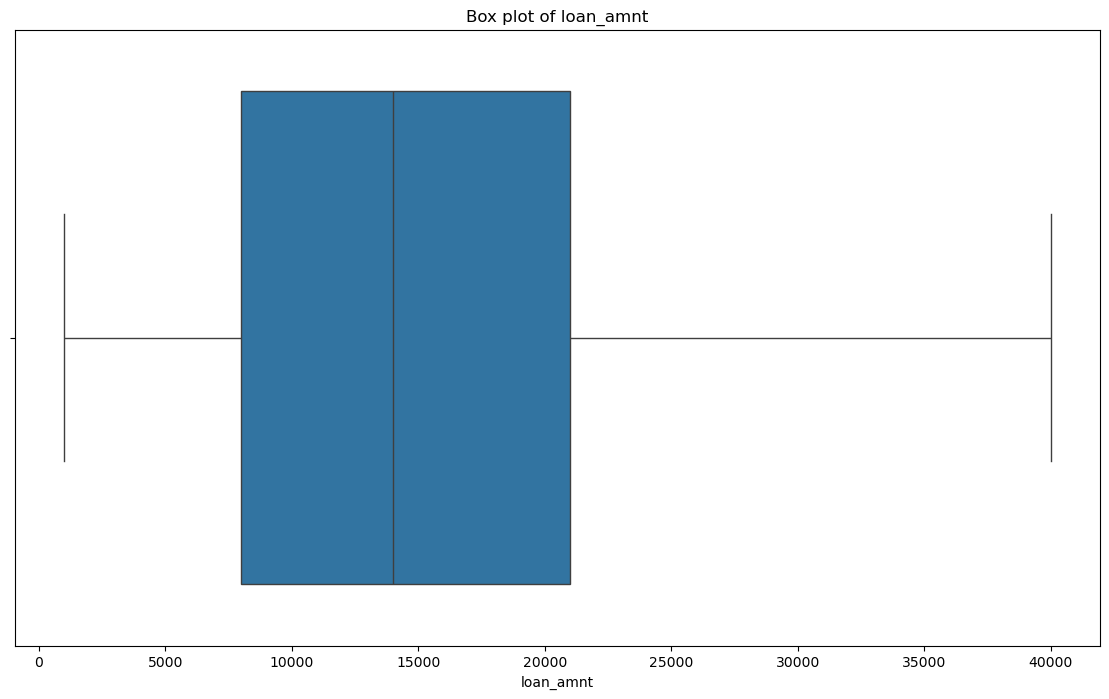

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='installment'>

Text(0.5, 1.0, 'Box plot of installment')

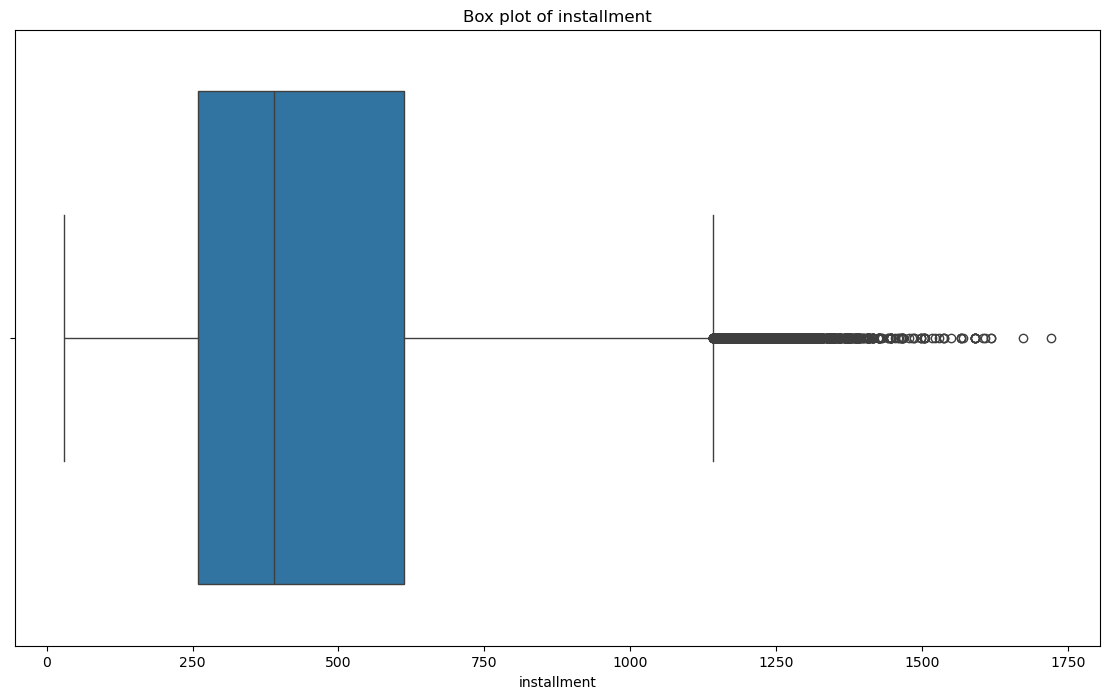

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='annual_inc'>

Text(0.5, 1.0, 'Box plot of annual_inc')

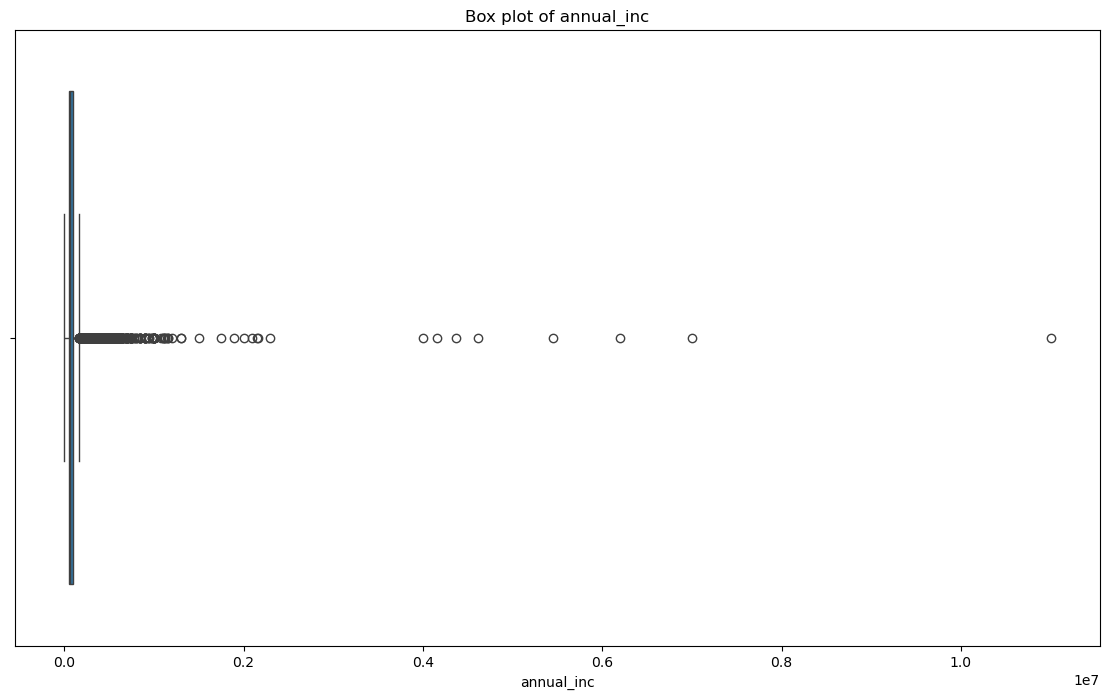

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='dti'>

Text(0.5, 1.0, 'Box plot of dti')

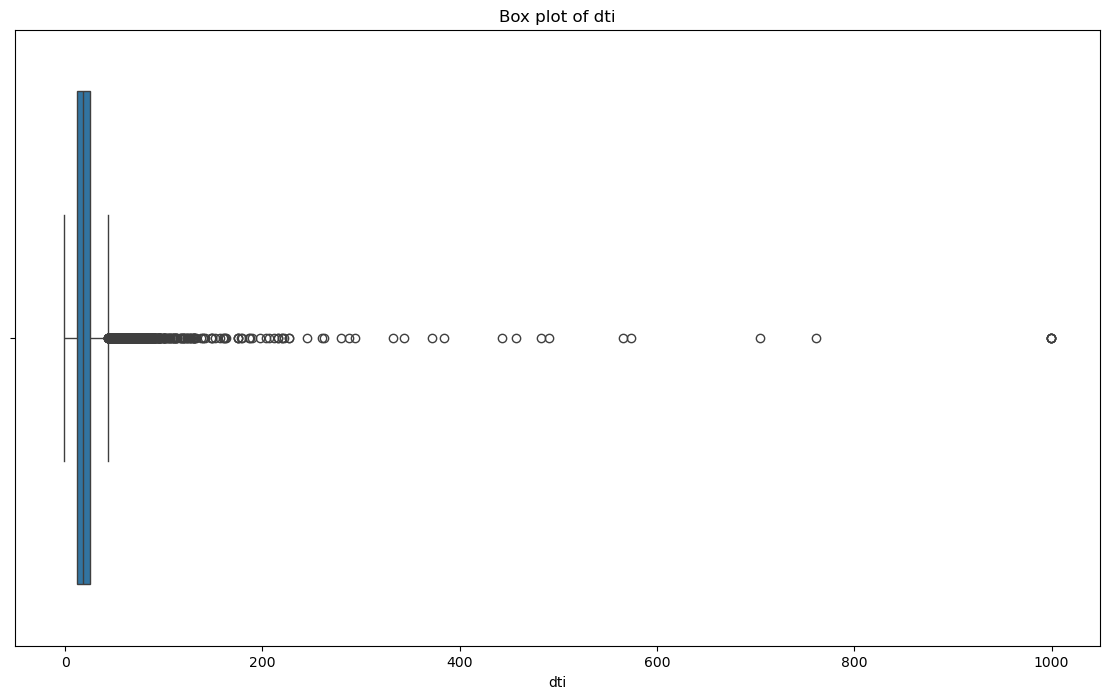

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='fico_range_low'>

Text(0.5, 1.0, 'Box plot of fico_range_low')

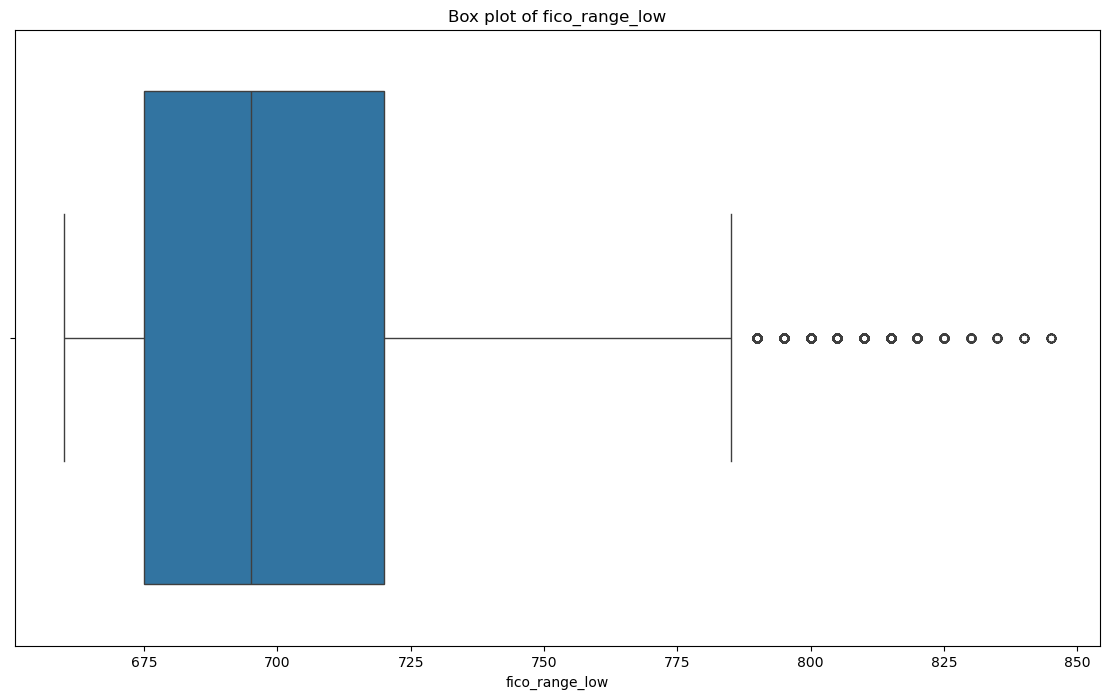

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='fico_range_high'>

Text(0.5, 1.0, 'Box plot of fico_range_high')

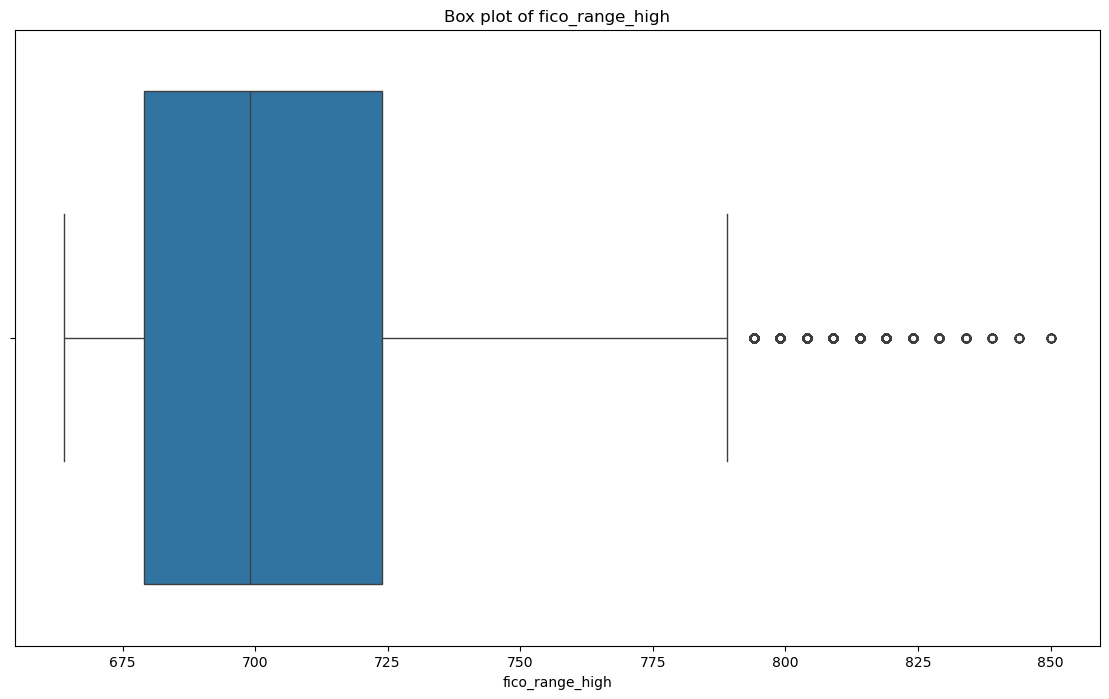

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='total_acc'>

Text(0.5, 1.0, 'Box plot of total_acc')

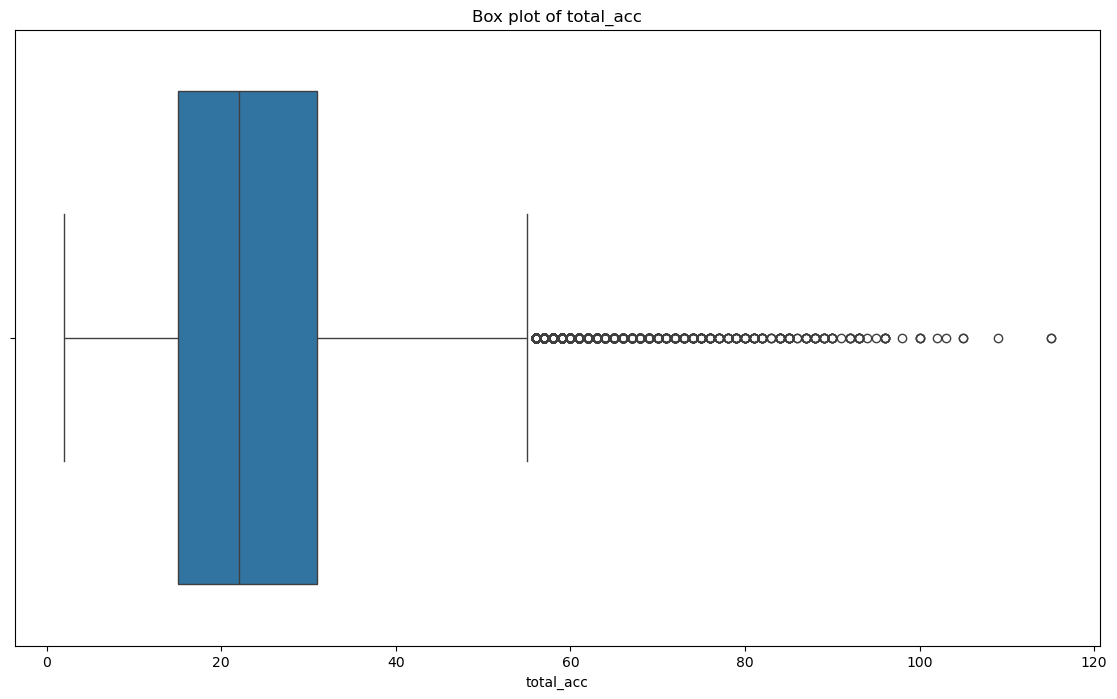

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='total_bc_limit'>

Text(0.5, 1.0, 'Box plot of total_bc_limit')

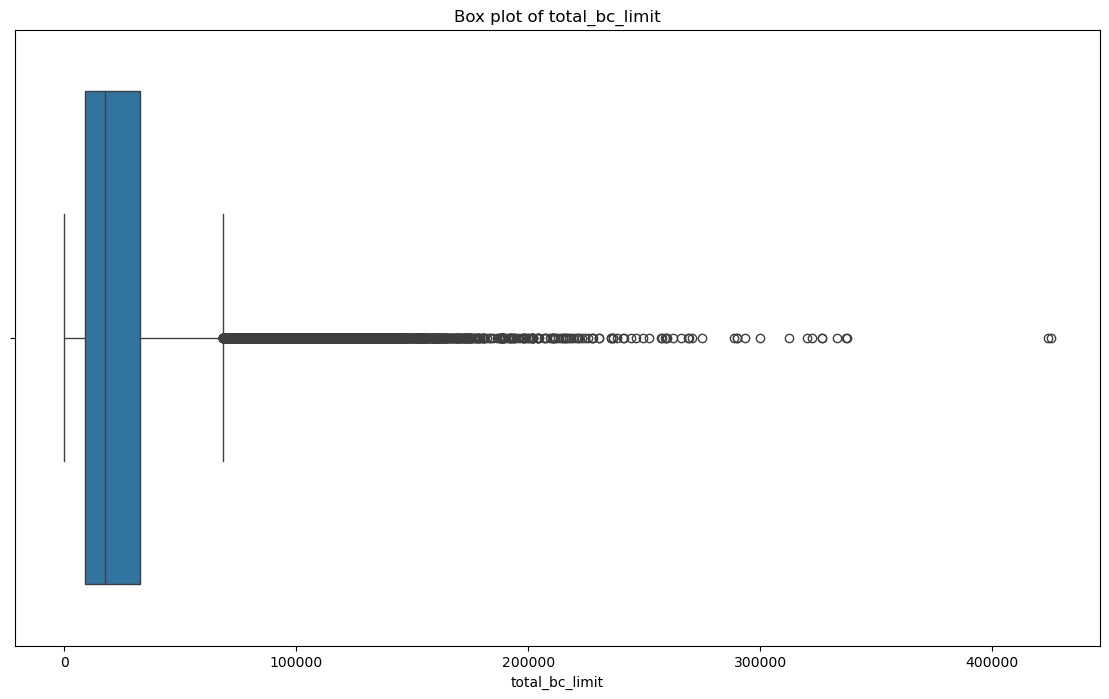

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='int_rate_num'>

Text(0.5, 1.0, 'Box plot of int_rate_num')

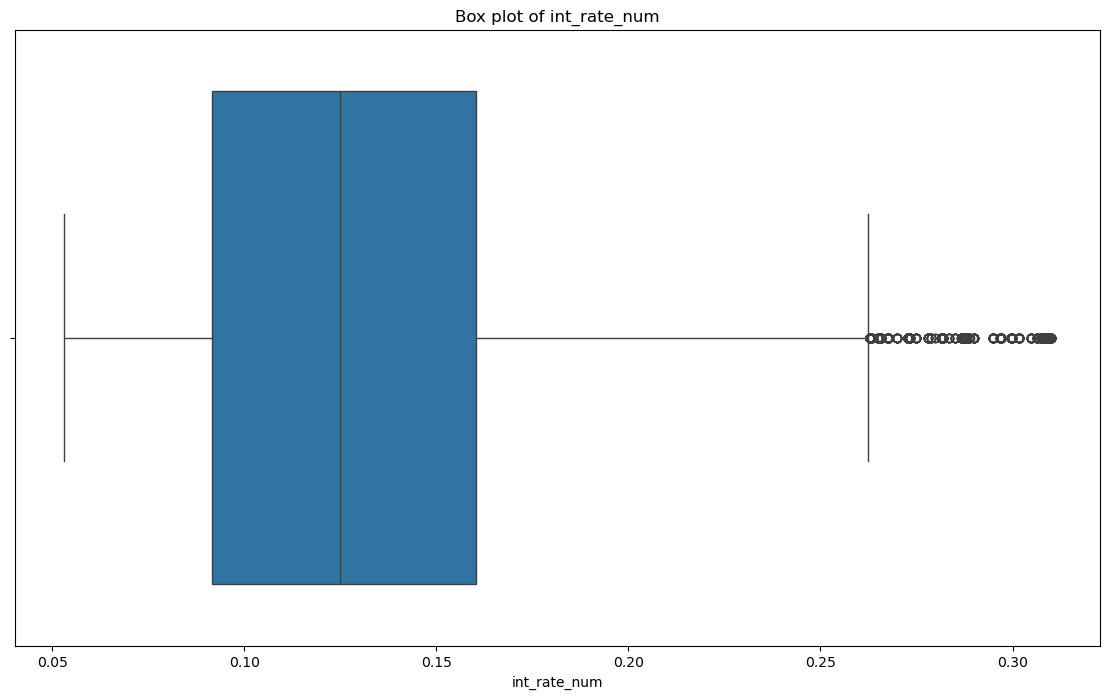

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='total_payment'>

Text(0.5, 1.0, 'Box plot of total_payment')

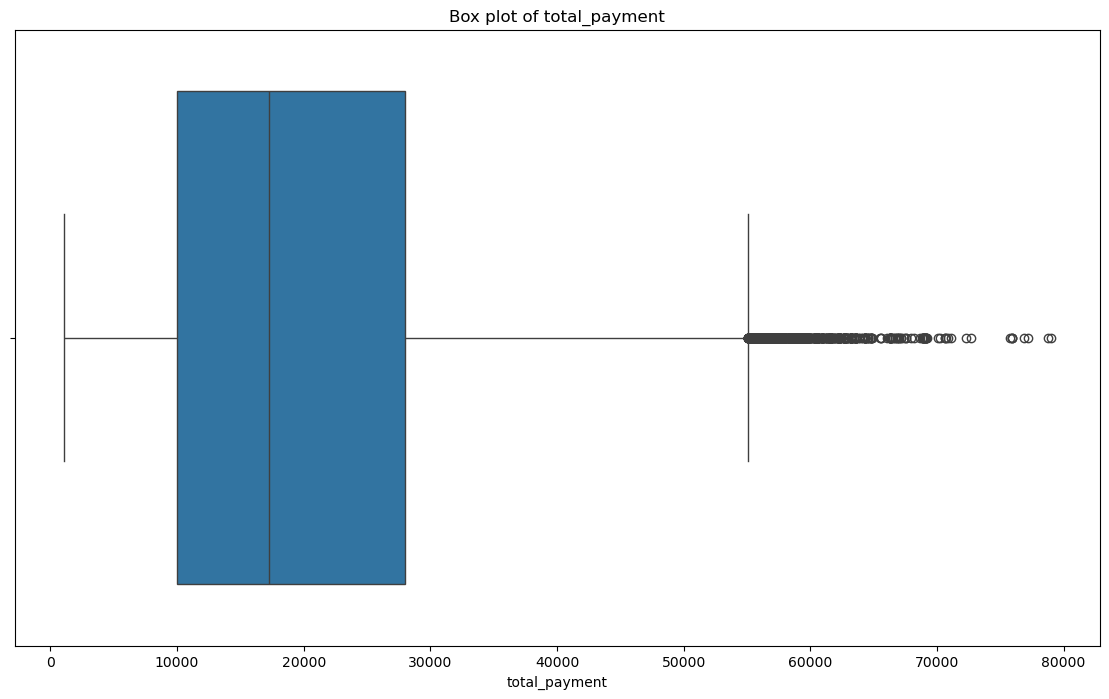

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='total_interest'>

Text(0.5, 1.0, 'Box plot of total_interest')

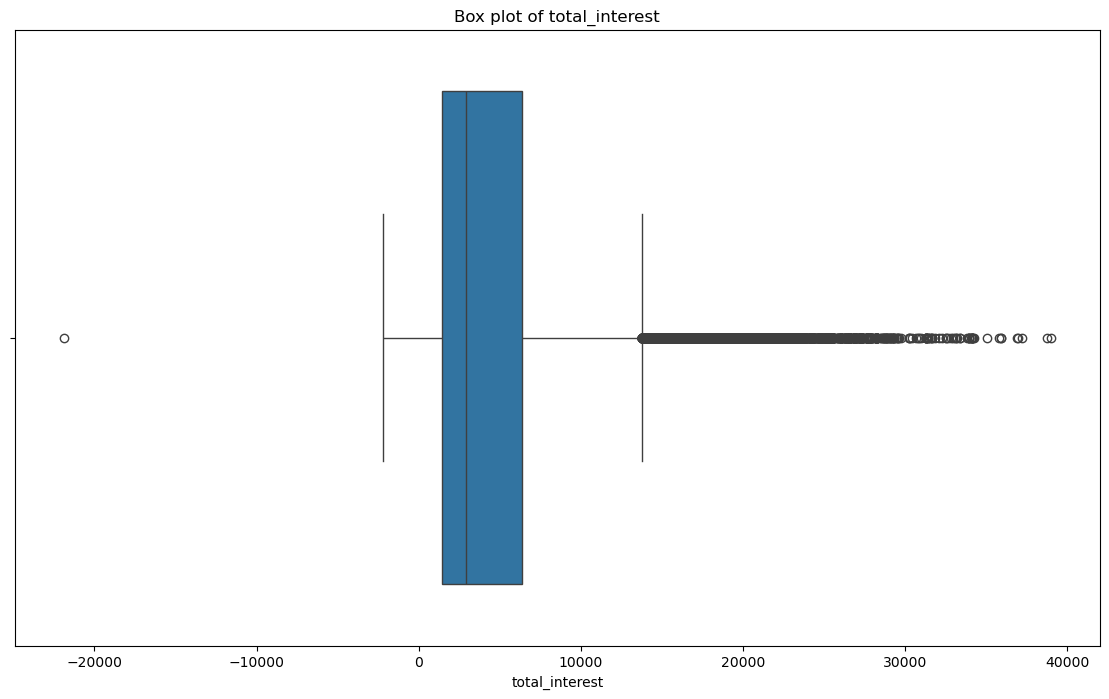

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='debt_to_income_ratio'>

Text(0.5, 1.0, 'Box plot of debt_to_income_ratio')

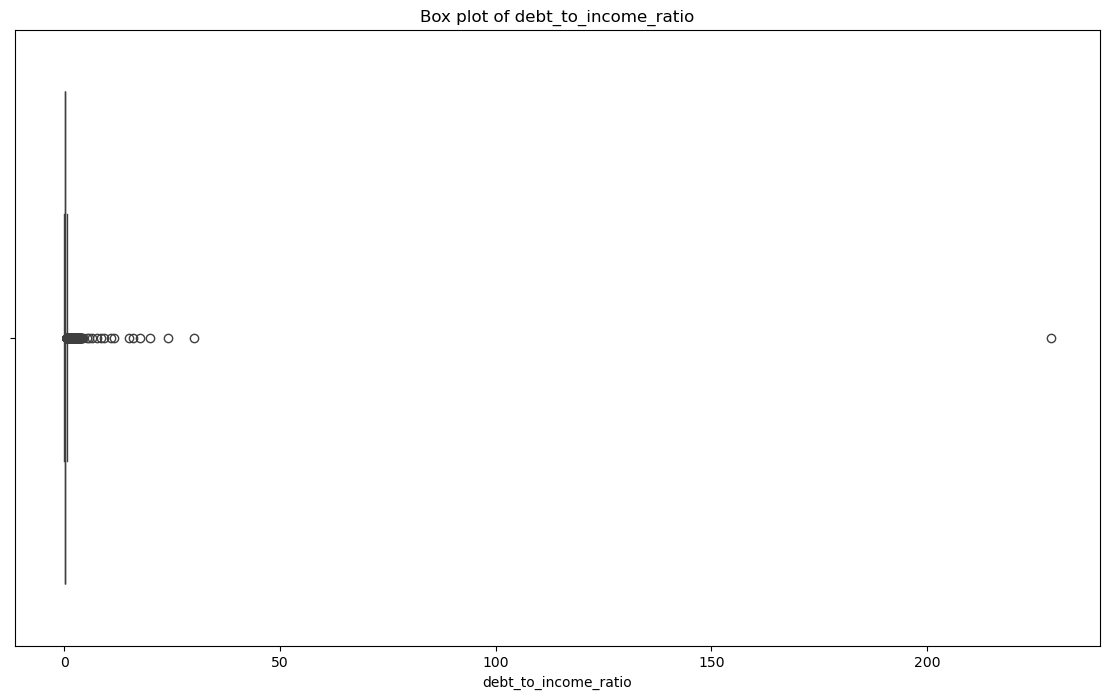


#- Stats table of new numerical features


loan_amnt   installment    annual_inc           dti  fico_range_low  \
count  91306.000000  91306.000000  9.130600e+04  91306.000000    91306.000000   
mean   15626.925120    459.738879  8.229786e+04     19.123159      700.141886   
std     9513.714659    274.441745  8.283865e+04     13.907649       33.346989   
min     1000.000000     30.120000  0.000000e+00     -1.000000      660.000000   
10%     5000.000000    163.490000  3.600000e+04      7.410000      665.000000   
20%     7100.000000    230.800000  4.500000e+04     10.740000      670.000000   
25%     8000.000000    260.150000  5.000000e+04     12.110000      675.000000   
50%    14000.000000    389.070000  6.960000e+04     18.070000      695.000000   
75%    21000.000000    612.620000  9.800000e+04     24.810000      720.000000   
90%    30000.000000    855.875000  1.380000e+05     31.000000      745.000000   
95%    35000.000000   1014.770000  1.750000e+05     34.440000      770.000000   
max    40000.000000   1719.830000  1.099920e+07    999.000000      845.000000   

       fico_range_high     total_acc  total_bc_limit  int_rate_num  \
count     91306.000000  91306.000000    91306.000000  91306.000000   
mean        704.142083     24.213600    25057.515004      0.130604   
std          33.347848     12.082141    24502.218659      0.048867   
min         664.000000      2.000000        0.000000      0.053100   
10%         669.000000     11.000000     4500.000000      0.072400   
20%         674.000000     14.000000     7500.000000      0.082400   
25%         679.000000     15.000000     9000.000000      0.091700   
50%         699.000000     22.000000    17700.000000      0.124900   
75%         724.000000     31.000000    32800.000000      0.160200   
90%         749.000000     40.000000    54600.000000      0.199200   
95%         774.000000     47.000000    72500.000000      0.223900   
max         850.000000    115.000000   425150.000000      0.309900   

       total_payment  total_interest  debt_to_income_ratio  
count   91306.000000    91306.000000           91306.00000  
mean    20263.817907     4636.892787                   inf  
std     13144.126994     4557.796142                   NaN  
min      1084.320000   -21866.800000               0.00030  
10%      5892.120000      841.400000               0.07270  
20%      8606.880000     1244.200000               0.10670  
25%      9986.760000     1454.880000               0.12220  
50%     17282.880000     2934.920000               0.19930  
75%     28020.600000     6378.000000               0.29400  
90%     40405.200000    10856.400000               0.39595  
95%     46304.700000    14075.250000               0.45000  
max     78965.400000    38965.400000                   inf

In [33]:
# Selected New Numerical Features
new_num_features = [
    'loan_amnt',
    'installment',
    'annual_inc',
    'dti',
    'fico_range_low',
    'fico_range_high',
    'total_acc',
    'total_bc_limit',
    'int_rate_num',
    'total_payment',
    'total_interest',
    'debt_to_income_ratio'
]

# Creating Box plots to visualize potential outliers
for num_col in new_num_features:
    # Boxplots
    plt.figure(figsize=(14,8))
    sns.boxplot(df_feat_sel_dropna[num_col] , orient='h')
    plt.title(f'Box plot of {num_col}')
    plt.show()

# Dispay stats of numerical features
print("\n#- Stats table of new numerical features")
display(df_feat_sel_dropna[new_num_features].describe([.1, .20, .25, .50, .75, .90, .95]))

### Observation 
 
- There are some noticable large outliers, e.g., especially for 
    - debt_to_income_ratio (this incorparates loan_amnt and annual_income)
    - total_interest
    - dti

- Just from theses fields, we are going to chop the dataset at the top-end 95-percentile value, and ensure values are greater than zero.
- Then, investigate further via Z-score method

In [34]:

# dropping debt_to_income records with values greater than the 95th percentile
debt_to_income_95 = df_feat_sel_dropna['debt_to_income_ratio'].quantile(0.95)
df_feat_sel_filtered = df_feat_sel_dropna[df_feat_sel_dropna['debt_to_income_ratio'] <= debt_to_income_95]

# removing records where 
dti_95 = df_feat_sel_dropna['dti'].quantile(0.95)
df_feat_sel_filtered = df_feat_sel_filtered[ (df_feat_sel_filtered['dti'] <= dti_95)]

# Removing dti records less than zero
df_feat_sel_filtered = df_feat_sel_filtered[ (df_feat_sel_filtered['dti'] > 0.)]

# Removing total_interest records less than zero
df_feat_sel_filtered = df_feat_sel_filtered[ (df_feat_sel_filtered['total_interest'] > 0.)]

df_feat_sel_filtered


loan_amnt  installment  annual_inc    dti  fico_range_low  \
0         4000.0       134.93     48000.0  20.25           665.0   
1        24000.0       500.07     57000.0  25.33           680.0   
2         5000.0       162.49     55000.0   7.22           665.0   
4        14000.0       322.79     48000.0  24.30           735.0   
5         4000.0       131.89     46000.0  11.56           700.0   
...          ...          ...         ...    ...             ...   
99993     2000.0        64.47     50000.0  26.55           705.0   
99995     3300.0       108.81     60000.0  17.98           670.0   
99996     6000.0       193.05    150000.0  13.13           715.0   
99997    10000.0       264.89     48000.0  27.79           660.0   
99998    10625.0       336.94     90000.0  27.58           765.0   

       fico_range_high  total_acc  total_bc_limit  int_rate_num        term  \
0                669.0       12.0             0.0        0.1308  _36_months   
1                684.0       24.0         13000.0        0.0916  _60_months   
2                669.0        9.0         10000.0        0.1049  _36_months   
4                739.0       23.0         28800.0        0.1359  _60_months   
5                704.0        7.0          7700.0        0.1149  _36_months   
...                ...        ...             ...           ...         ...   
99993            709.0       15.0          4300.0        0.0993  _36_months   
99995            674.0       14.0         32800.0        0.1149  _36_months   
99996            719.0       34.0         35800.0        0.0980  _36_months   
99997            664.0       27.0          9400.0        0.1999  _60_months   
99998            769.0       49.0         53400.0        0.0881  _36_months   

      grade    emp_length home_ownership             purpose application_type  \
0         B  10plus_years       MORTGAGE    home_improvement       Individual   
1         B       6_years           RENT         credit_card       Individual   
2         B  10plus_years       MORTGAGE         credit_card       Individual   
4         C  10plus_years       MORTGAGE  debt_consolidation       Individual   
5         B  10plus_years           RENT              moving       Individual   
...     ...           ...            ...                 ...              ...   
99993     B  10plus_years            OWN      major_purchase       Individual   
99995     B        1_year       MORTGAGE               other       Individual   
99996     B       2_years           RENT      major_purchase       Individual   
99997     D  10plus_years           RENT  debt_consolidation       Individual   
99998     A  10plus_years       MORTGAGE  debt_consolidation       Individual   

       loan_default  term_num  total_payment  total_interest  \
0             False      36.0        4857.48          857.48   
1             False      60.0       30004.20         6004.20   
2             False      36.0        5849.64          849.64   
4             False      60.0       19367.40         5367.40   
5              True      36.0        4748.04          748.04   
...             ...       ...            ...             ...   
99993         False      36.0        2320.92          320.92   
99995         False      36.0        3917.16          617.16   
99996         False      36.0        6949.80          949.80   
99997          True      60.0       15893.40         5893.40   
99998         False      36.0       12129.84         1504.84   

       debt_to_income_ratio  
0                    0.0833  
1                    0.4211  
2                    0.0909  
4                    0.2917  
5                    0.0870  
...                     ...  
99993                0.0400  
99995                0.0550  
99996                0.0400  
99997                0.2083  
99998                0.1181  

[83208 rows x 20 columns]

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='loan_amnt'>

Text(0.5, 1.0, 'Box plot of loan_amnt')

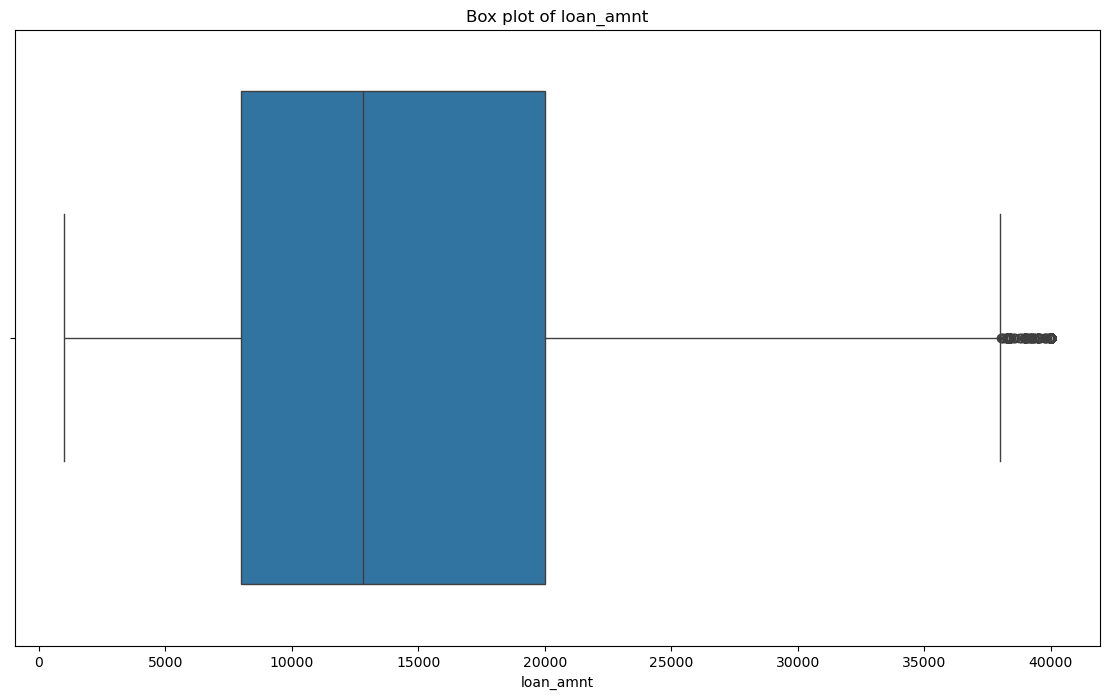

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='installment'>

Text(0.5, 1.0, 'Box plot of installment')

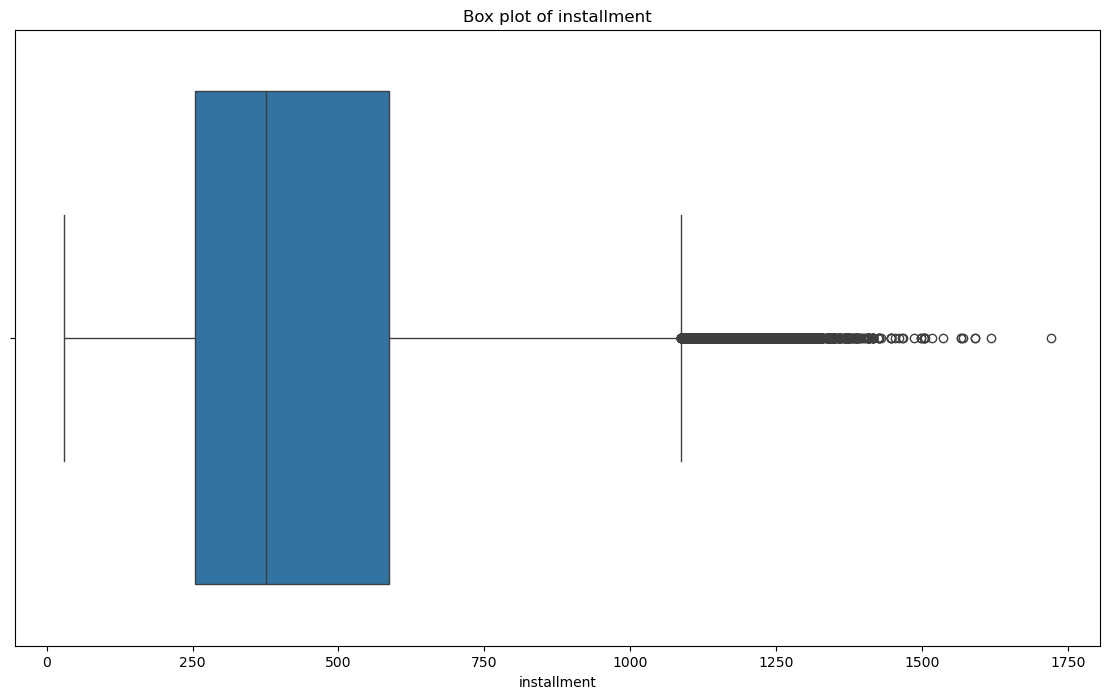

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='annual_inc'>

Text(0.5, 1.0, 'Box plot of annual_inc')

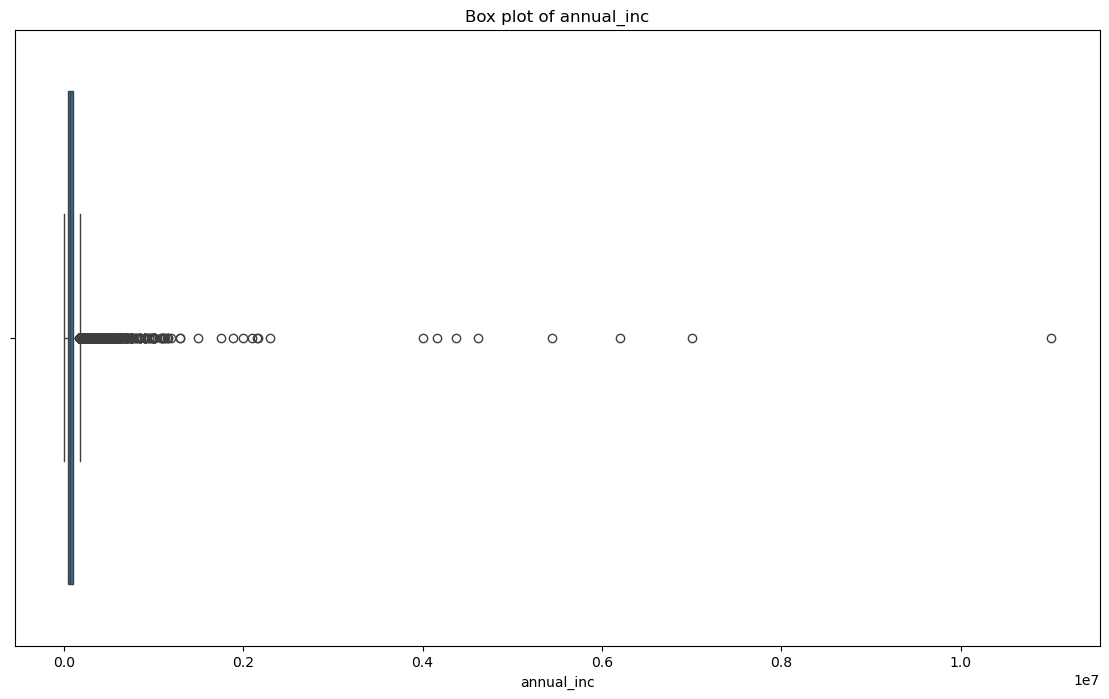

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='dti'>

Text(0.5, 1.0, 'Box plot of dti')

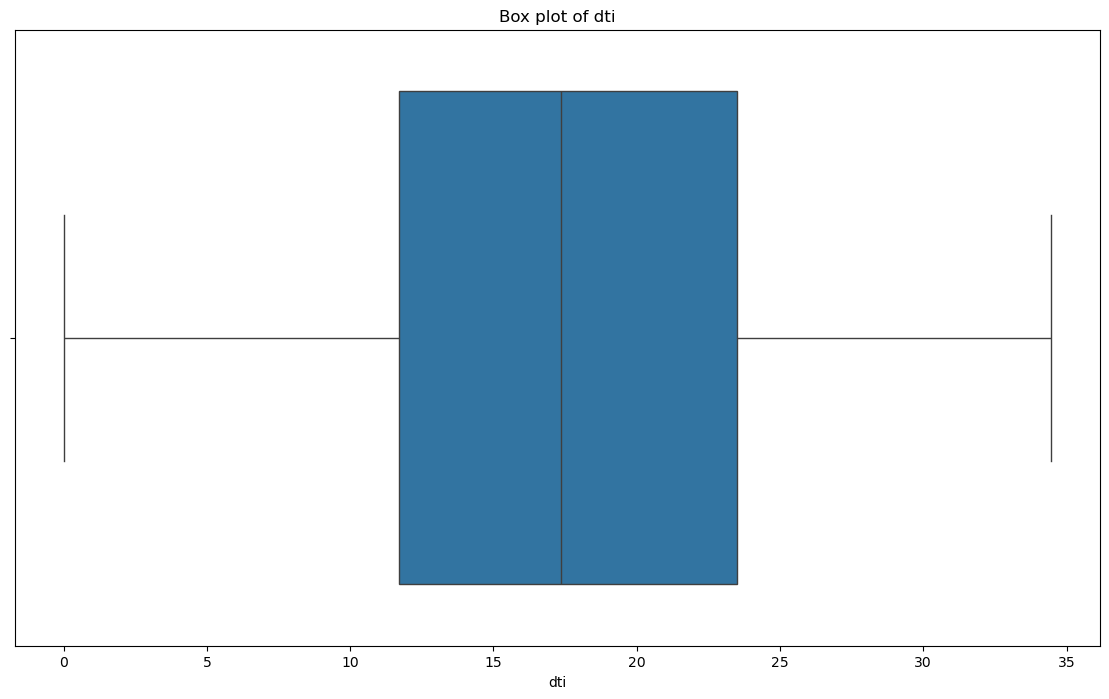

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='fico_range_low'>

Text(0.5, 1.0, 'Box plot of fico_range_low')

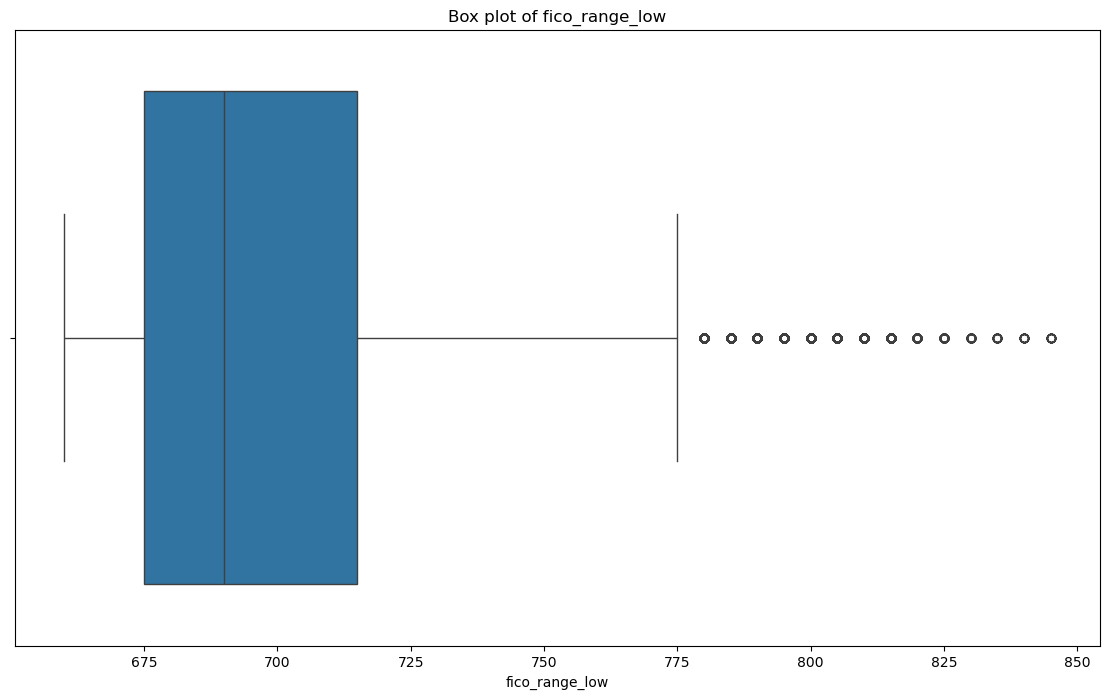

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='fico_range_high'>

Text(0.5, 1.0, 'Box plot of fico_range_high')

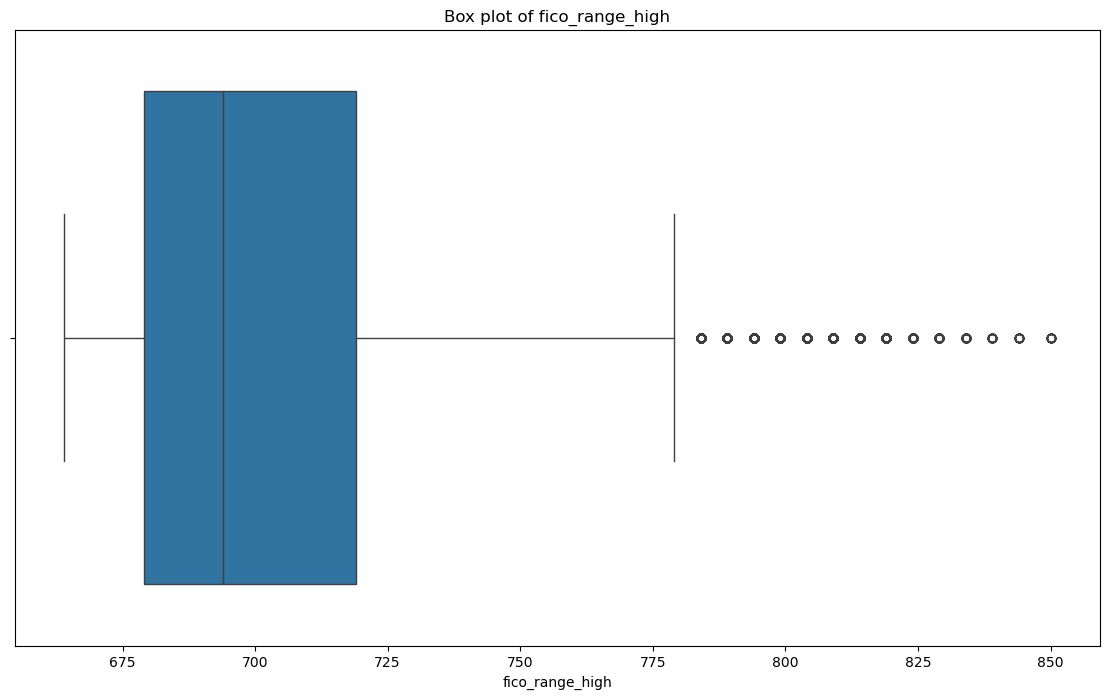

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='total_acc'>

Text(0.5, 1.0, 'Box plot of total_acc')

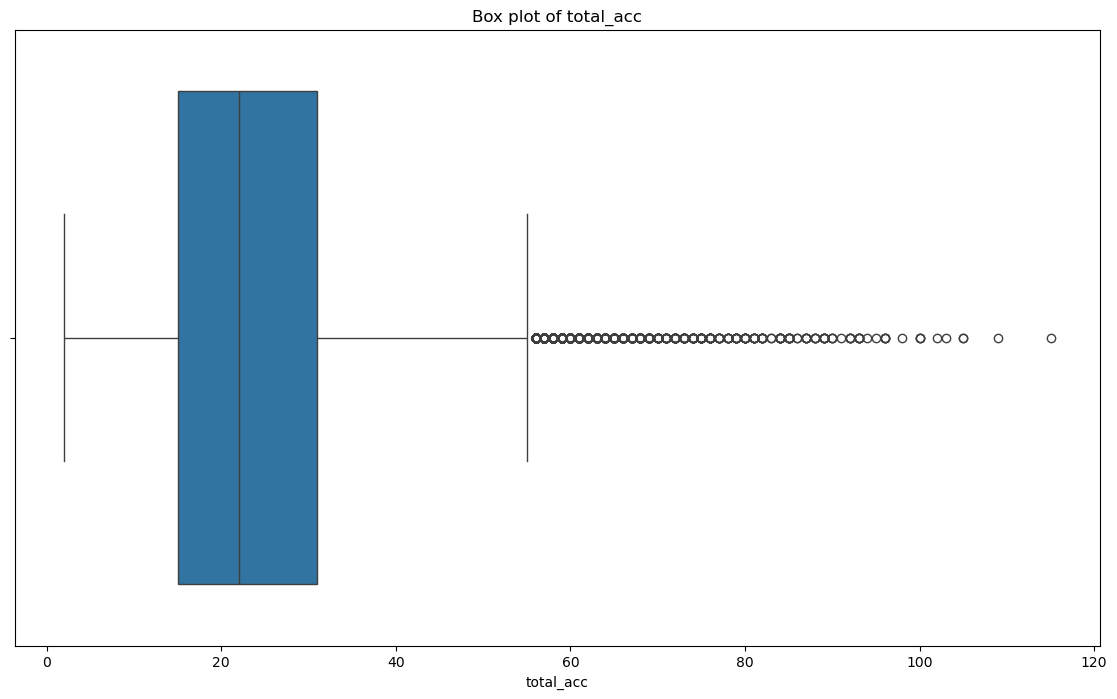

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='total_bc_limit'>

Text(0.5, 1.0, 'Box plot of total_bc_limit')

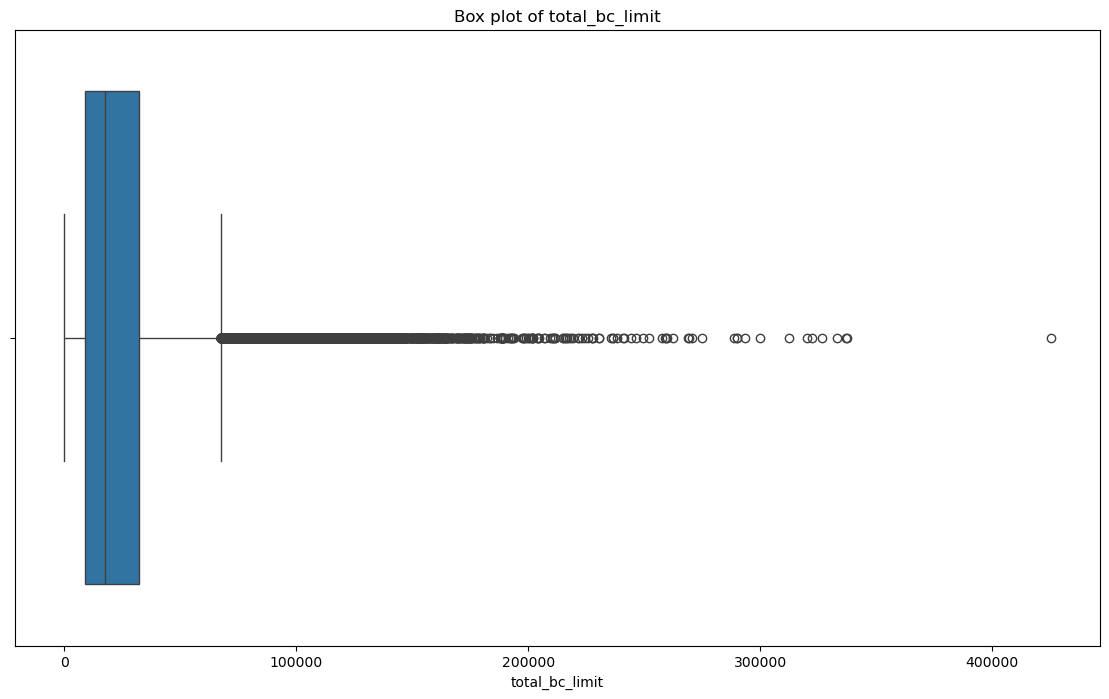

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='int_rate_num'>

Text(0.5, 1.0, 'Box plot of int_rate_num')

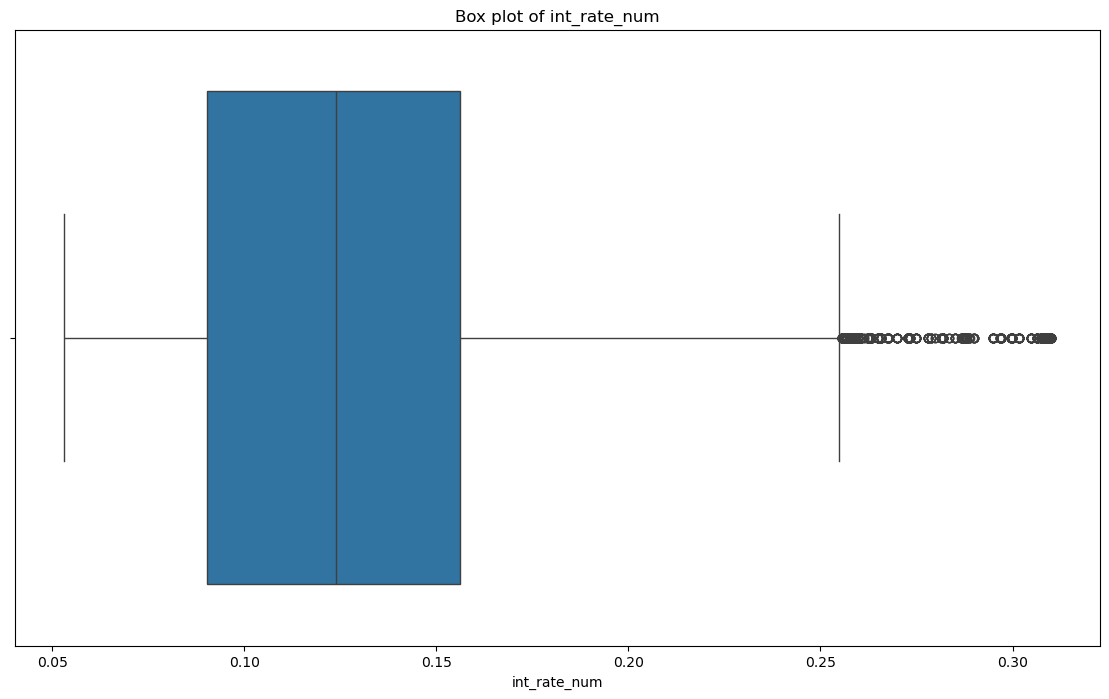

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='total_payment'>

Text(0.5, 1.0, 'Box plot of total_payment')

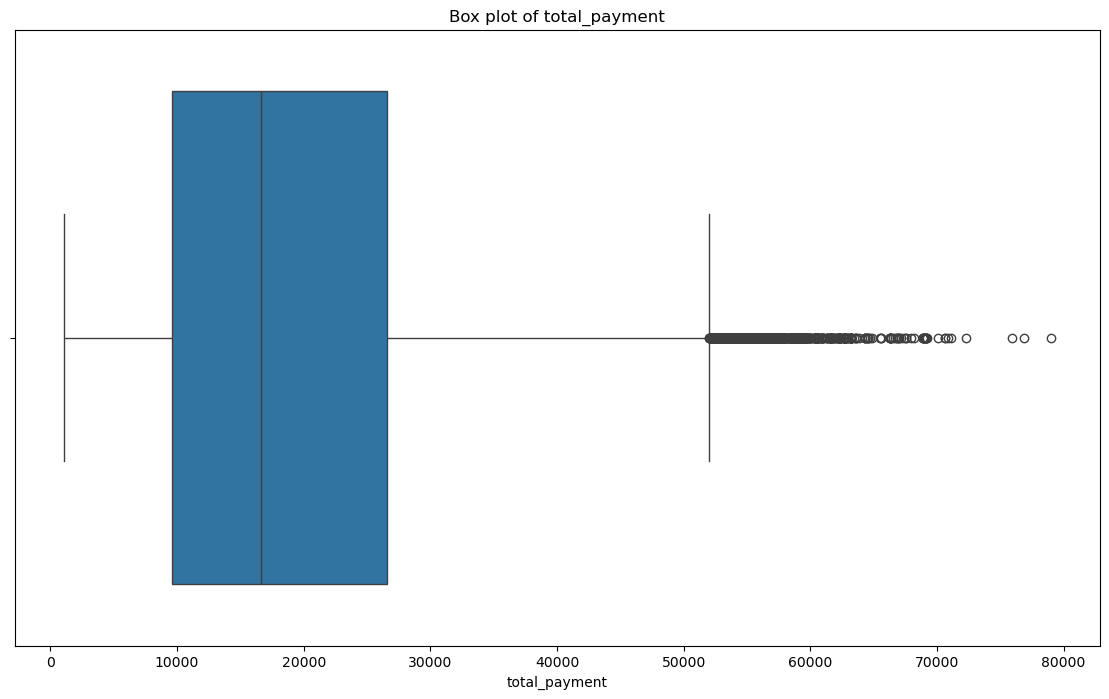

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='total_interest'>

Text(0.5, 1.0, 'Box plot of total_interest')

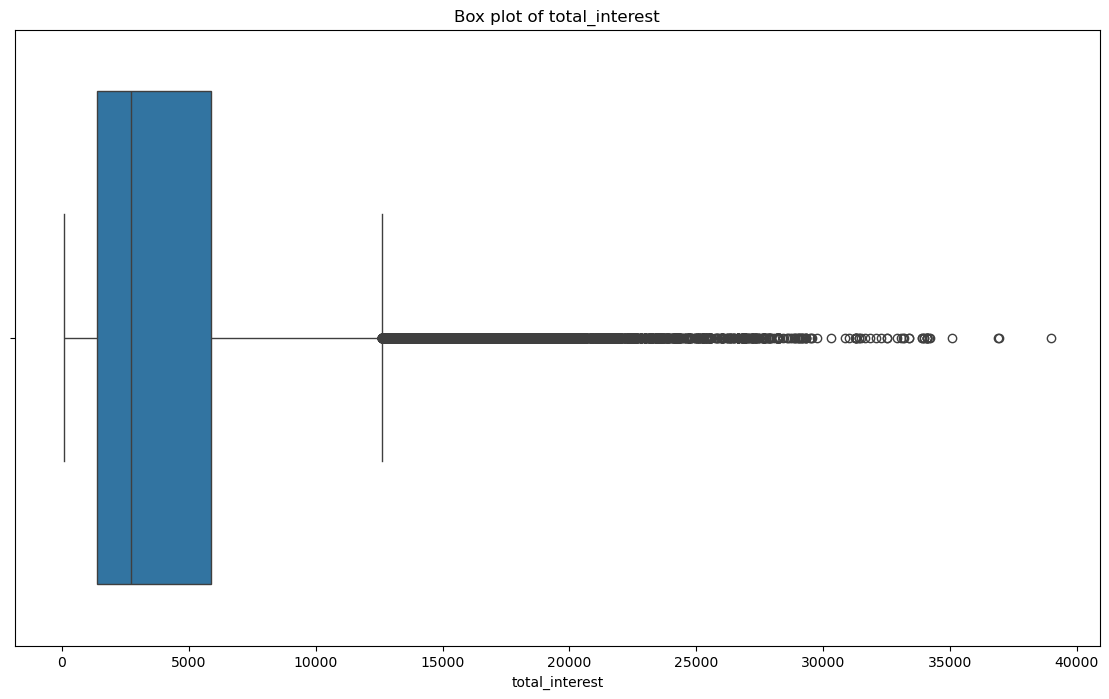

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='debt_to_income_ratio'>

Text(0.5, 1.0, 'Box plot of debt_to_income_ratio')

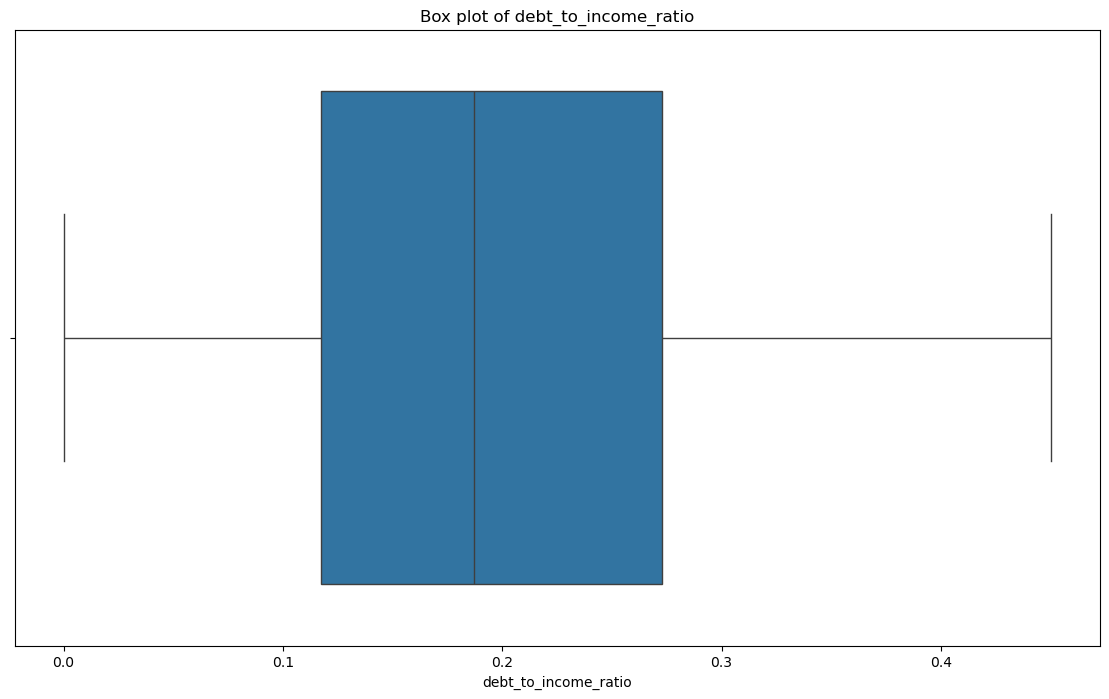


#- Stats table of new numerical features


loan_amnt   installment    annual_inc           dti  fico_range_low  \
count  83208.000000  83208.000000  8.320800e+04  83208.000000    83208.000000   
mean   15053.692253    444.465184  8.500536e+04     17.633763      699.429021   
std     9206.940746    266.249191  8.591762e+04      7.854999       33.205581   
min     1000.000000     30.120000  4.200000e+03      0.020000      660.000000   
10%     5000.000000    160.750000  3.800000e+04      7.220000      665.000000   
20%     7000.000000    224.480000  4.660000e+04     10.400000      670.000000   
25%     8000.000000    253.500000  5.000000e+04     11.710000      675.000000   
50%    12800.000000    375.880000  7.000000e+04     17.370000      690.000000   
75%    20000.000000    586.780000  1.000000e+05     23.510000      715.000000   
90%    30000.000000    823.109000  1.400000e+05     28.530000      745.000000   
95%    35000.000000    983.060000  1.800000e+05     31.040000      765.000000   
max    40000.000000   1719.830000  1.099920e+07     34.440000      845.000000   

       fico_range_high     total_acc  total_bc_limit  int_rate_num  \
count     83208.000000  83208.000000    83208.000000  83208.000000   
mean        703.429226     24.148676    24773.849630      0.128776   
std          33.206480     12.035165    24387.166111      0.048267   
min         664.000000      2.000000        0.000000      0.053100   
10%         669.000000     10.000000     4400.000000      0.072100   
20%         674.000000     14.000000     7500.000000      0.081900   
25%         679.000000     15.000000     8900.000000      0.090200   
50%         694.000000     22.000000    17400.000000      0.123900   
75%         719.000000     31.000000    32300.000000      0.156100   
90%         749.000000     40.000000    54200.000000      0.192400   
95%         769.000000     47.000000    72200.000000      0.219900   
max         850.000000    115.000000   425150.000000      0.309900   

       total_payment  total_interest  debt_to_income_ratio  
count   83208.000000    83208.000000          83208.000000  
mean    19402.895590     4349.203337              0.199683  
std     12637.590562     4330.844795              0.104225  
min      1084.320000       84.320000              0.000300  
10%      5802.480000      811.200000              0.070200  
20%      8271.936000     1194.560000              0.102000  
25%      9633.600000     1390.560000              0.117600  
50%     16630.800000     2727.640000              0.187200  
75%     26582.220000     5874.700000              0.272700  
90%     38744.280000    10158.600000              0.352100  
95%     44832.960000    13263.170000              0.396800  
max     78965.400000    38965.400000              0.450000

In [35]:
# Creating Box plots to visualize potential outliers
for num_col in new_num_features:
    # Boxplots
    plt.figure(figsize=(14,8))
    sns.boxplot(df_feat_sel_filtered[num_col] , orient='h')
    plt.title(f'Box plot of {num_col}')
    plt.show()

# Dispay stats of numerical features
print("\n#- Stats table of new numerical features")
display(df_feat_sel_filtered[new_num_features].describe([.1, .20, .25, .50, .75, .90, .95]))

### Observation
- We have reduced the dataset now by ~17%

---

- Next, we are going to analyse their Z-score, and remove any outliers that are beyond the 3*Standard Deviation limit.
- The Z-score method identifies outliers by measuring how many standard deviations a data point is from the mean.
- Up to 3xStandard_deviation is a good benchmark set my modern science.

From [investopedia](https://www.investopedia.com/terms/z/zscore.asp#:~:text=Understanding%20Z%2DScore,-Z%2Dscore%20is&text=It%20indicates%20how%20many%20standard,standard%20deviation%20from%20the%20mean.):
> Z-score is a statistical measure that quantifies the distance between a data point and the mean of a dataset. It's expressed in terms of standard deviations. It indicates how many standard deviations a data point is from the mean of the distribution.

> If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.



In [36]:
from scipy import stats
from scipy.stats import skew, zscore

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df_feat_sel_filtered[new_num_features]))

# Define a threshold for identifying outliers
thresh = 3.

print(f"Threshold == {thresh} * Standard Deviation")

# How many outliers identified for each numerical columns?
gt_thresh = z_scores > thresh
outlier_volume = pd.DataFrame(gt_thresh.sum(), columns=["num_outliers"])
outlier_volume.sort_values(by = "num_outliers"
                        , ascending= False)

display(outlier_volume)

Threshold == 3.0 * Standard Deviation


num_outliers
total_interest                1706
total_bc_limit                1645
fico_range_low                1097
fico_range_high               1097
total_acc                      823
installment                    801
int_rate_num                   687
annual_inc                     547
total_payment                  438
loan_amnt                        0
dti                              0
debt_to_income_ratio             0

num_outliers
loan_amnt                        0
installment                    801
annual_inc                     547
dti                              0
fico_range_low                1097
fico_range_high               1097
total_acc                      823
total_bc_limit                1645
int_rate_num                   687
total_payment                  438
total_interest                1706
debt_to_income_ratio             0

### Observation
- We can see we have a few outliers beyond the 3*Standard Deviation limit
- We are going to visualizse the distributions of these outliers.

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='loan_amnt', ylabel='Count'>

<Axes: xlabel='loan_amnt', ylabel='Count'>

Text(0.5, 1.0, 'loan_amnt Historgram with Outliers')

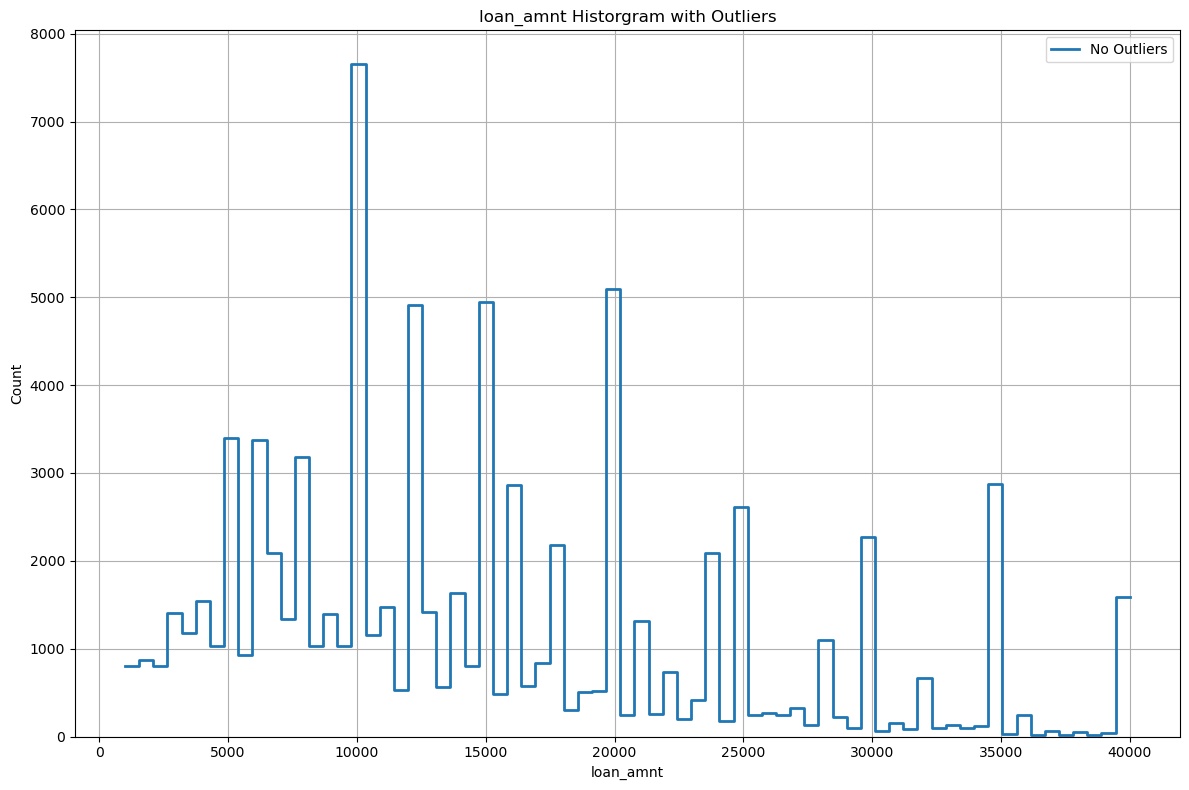

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='installment', ylabel='Count'>

<Axes: xlabel='installment', ylabel='Count'>

Text(0.5, 1.0, 'installment Historgram with Outliers')

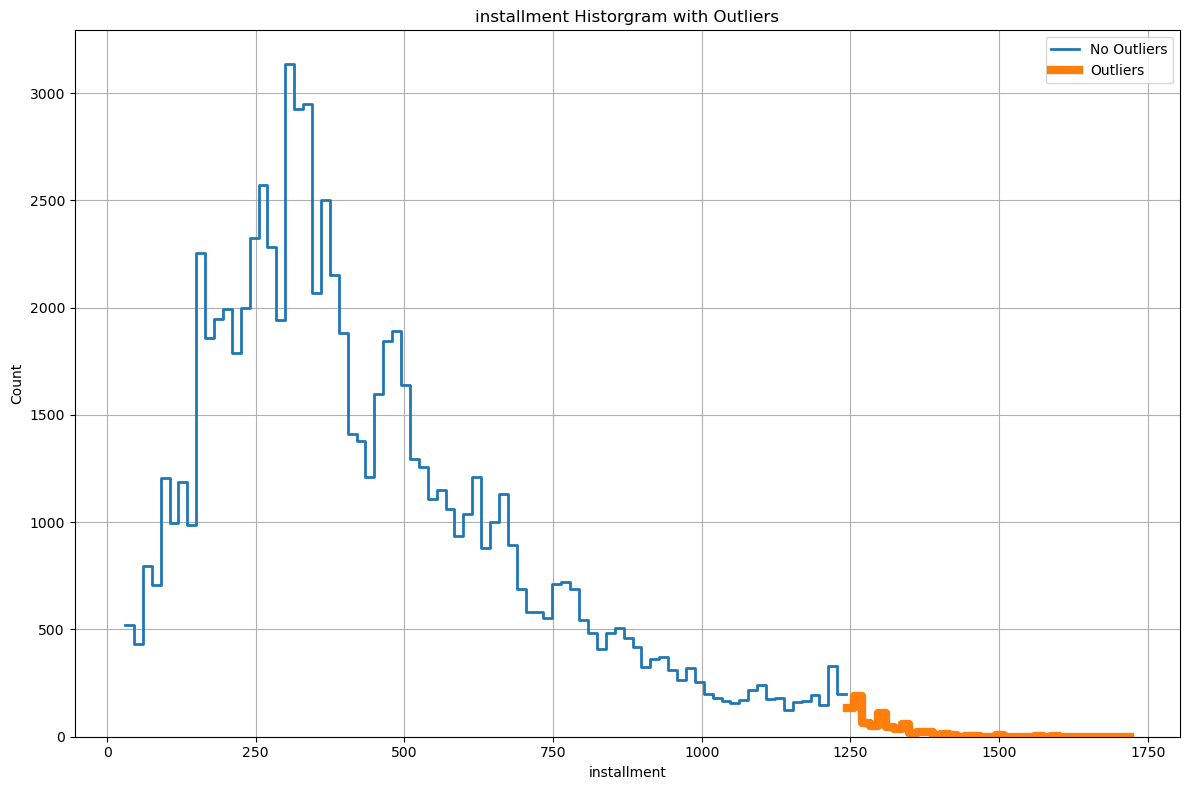

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='annual_inc', ylabel='Count'>

<Axes: xlabel='annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'annual_inc Historgram with Outliers')

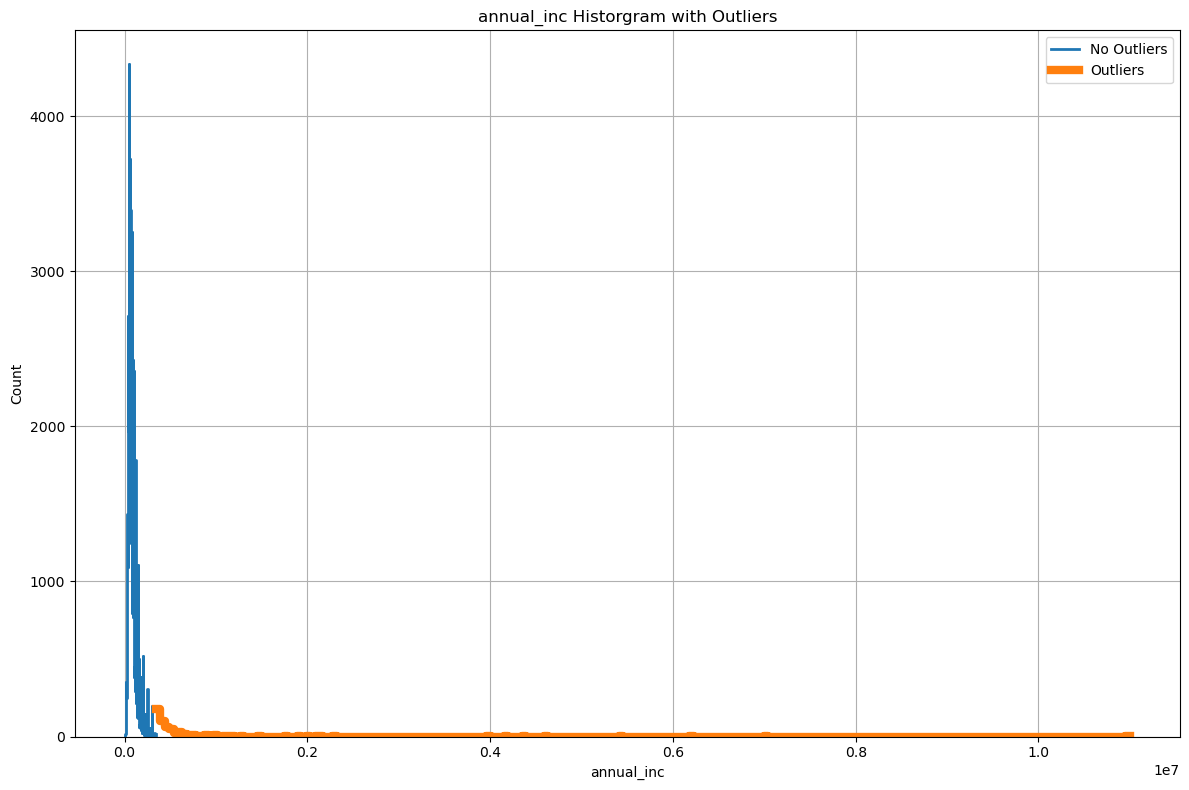

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='dti', ylabel='Count'>

<Axes: xlabel='dti', ylabel='Count'>

Text(0.5, 1.0, 'dti Historgram with Outliers')

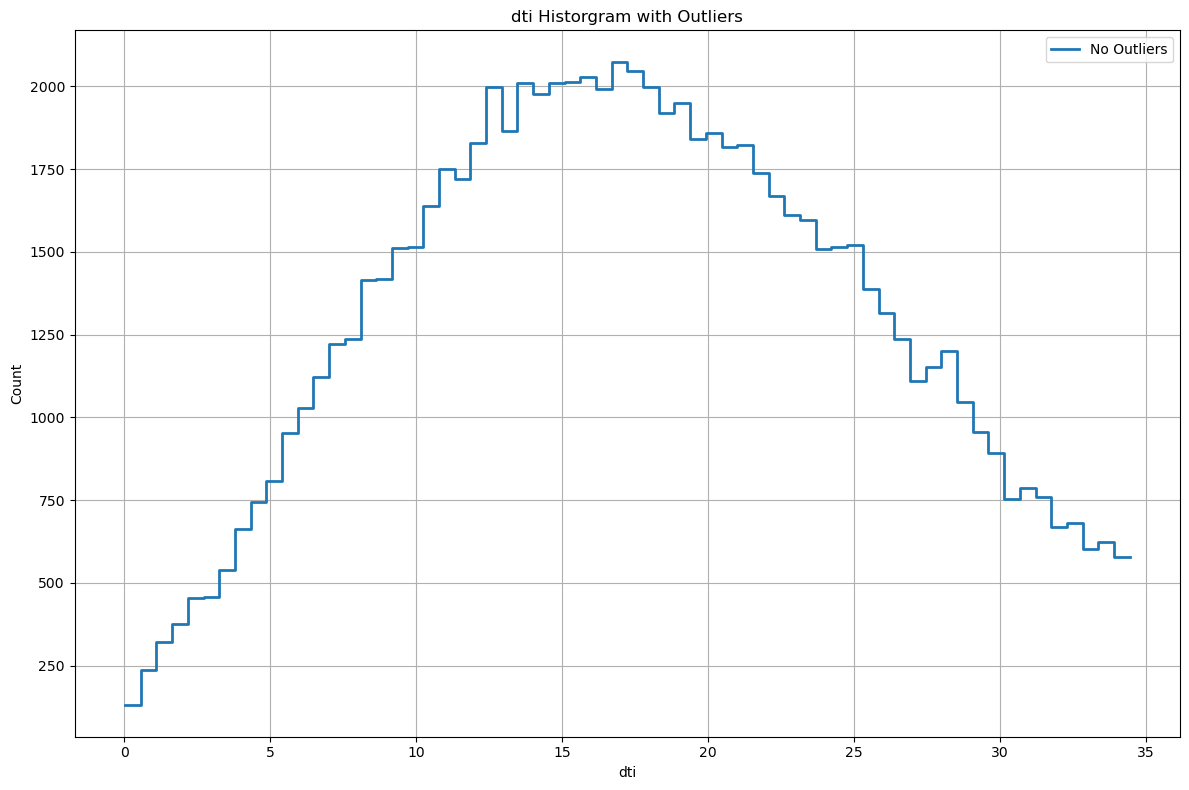

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='fico_range_low', ylabel='Count'>

<Axes: xlabel='fico_range_low', ylabel='Count'>

Text(0.5, 1.0, 'fico_range_low Historgram with Outliers')

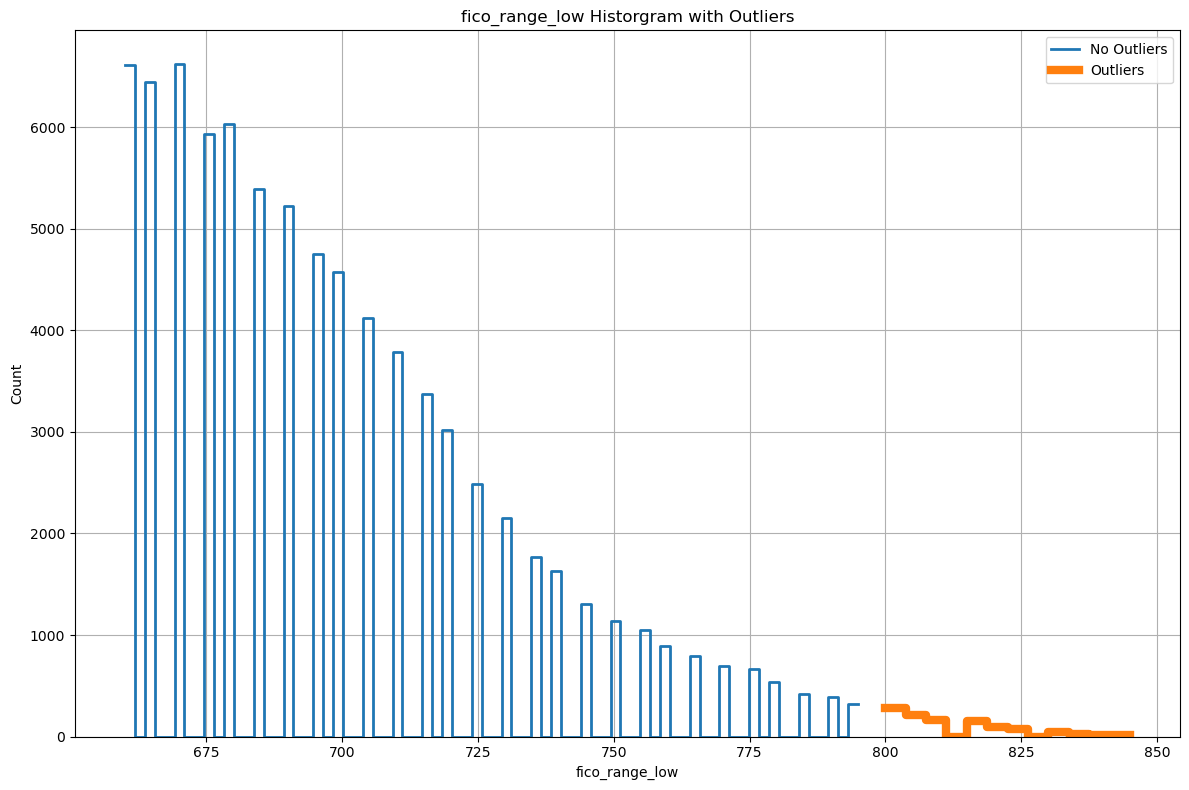

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='fico_range_high', ylabel='Count'>

<Axes: xlabel='fico_range_high', ylabel='Count'>

Text(0.5, 1.0, 'fico_range_high Historgram with Outliers')

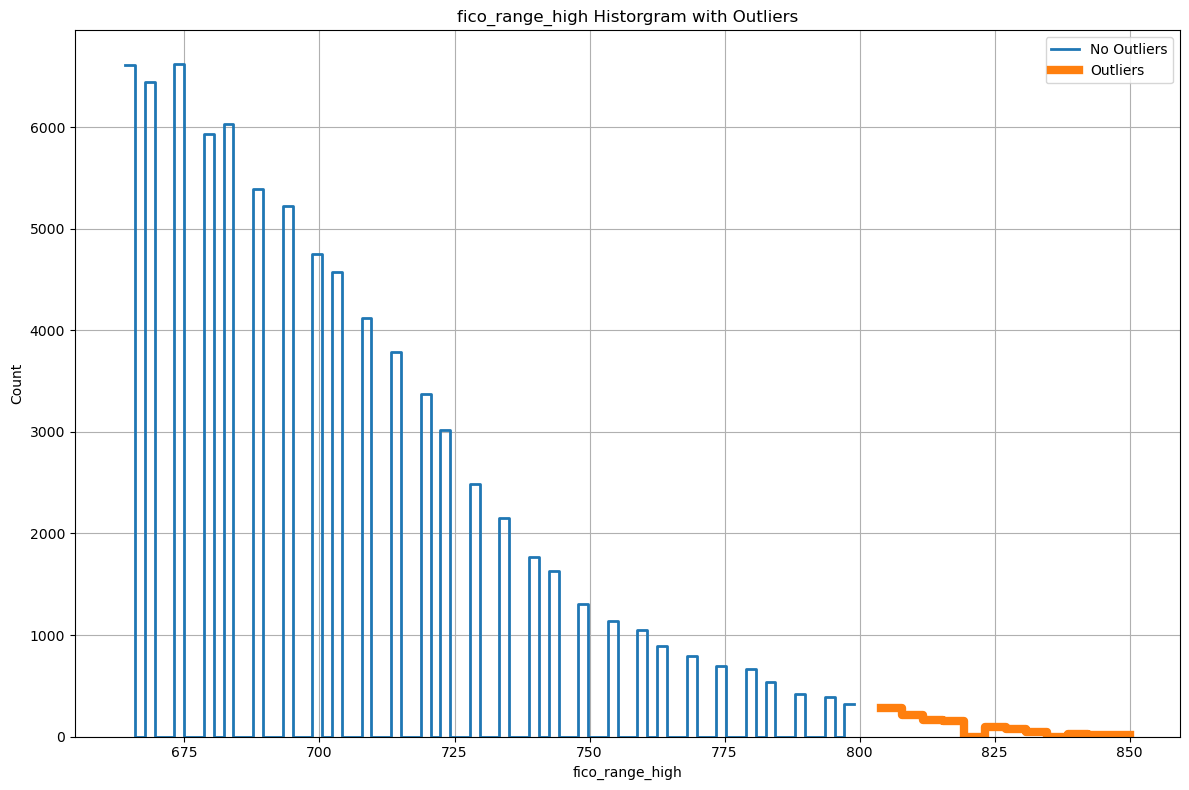

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='total_acc', ylabel='Count'>

<Axes: xlabel='total_acc', ylabel='Count'>

Text(0.5, 1.0, 'total_acc Historgram with Outliers')

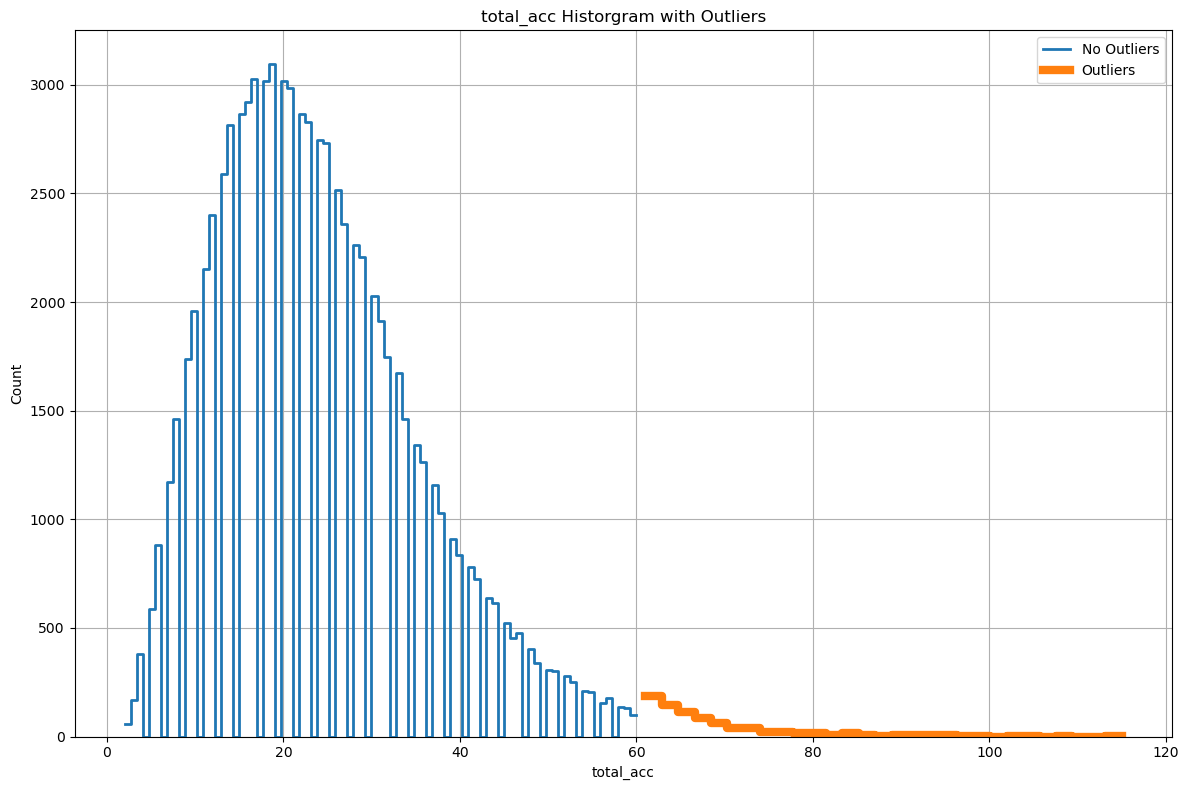

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='total_bc_limit', ylabel='Count'>

<Axes: xlabel='total_bc_limit', ylabel='Count'>

Text(0.5, 1.0, 'total_bc_limit Historgram with Outliers')

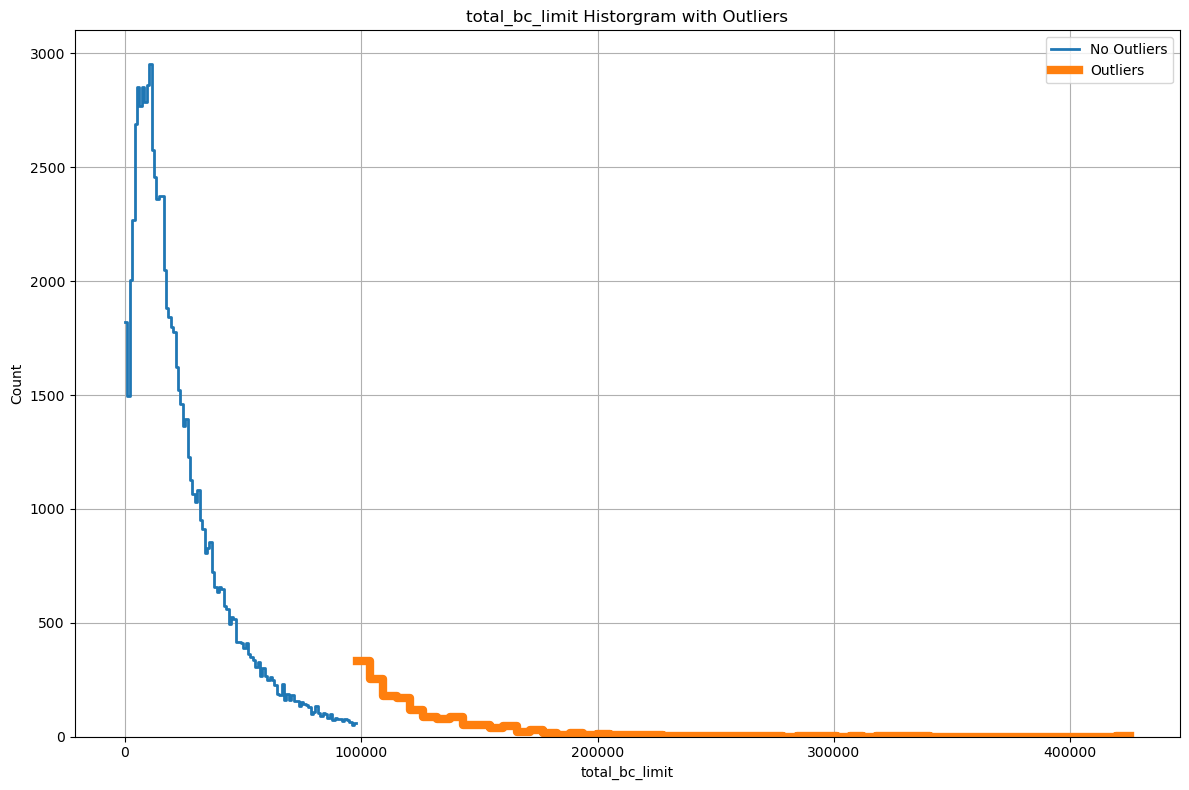

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='int_rate_num', ylabel='Count'>

<Axes: xlabel='int_rate_num', ylabel='Count'>

Text(0.5, 1.0, 'int_rate_num Historgram with Outliers')

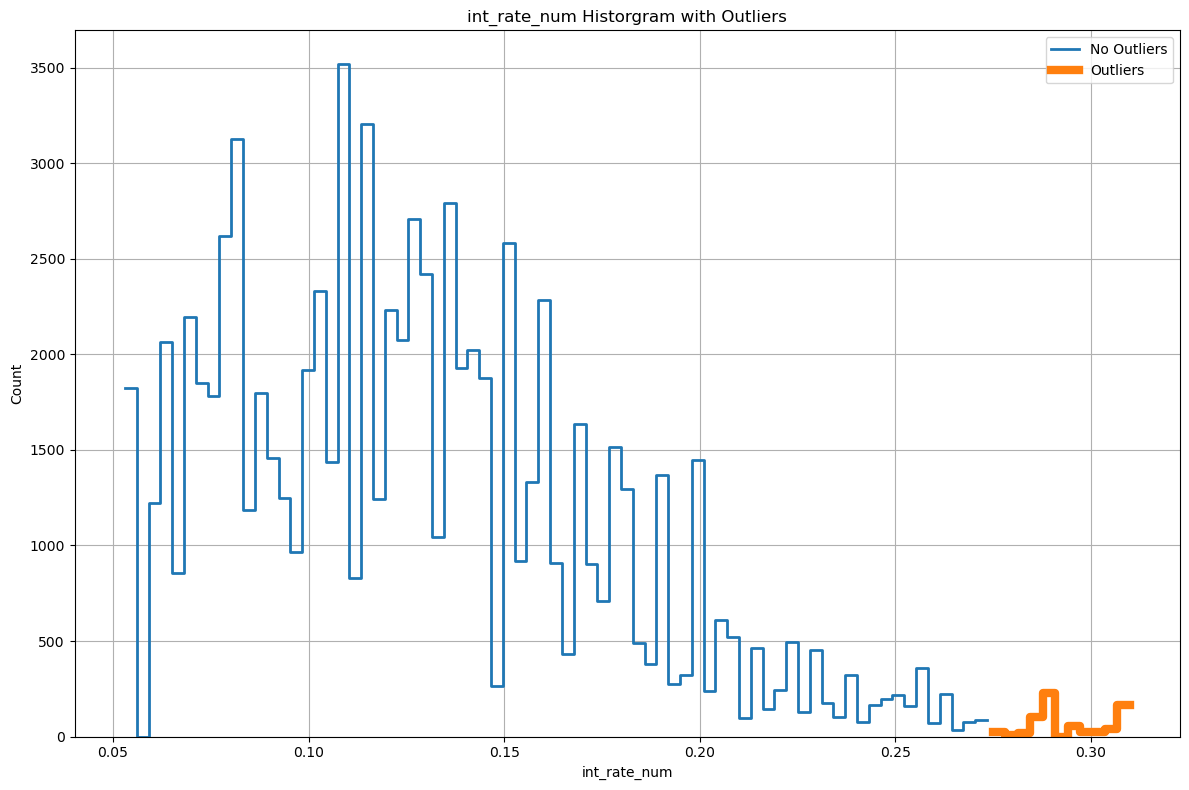

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='total_payment', ylabel='Count'>

<Axes: xlabel='total_payment', ylabel='Count'>

Text(0.5, 1.0, 'total_payment Historgram with Outliers')

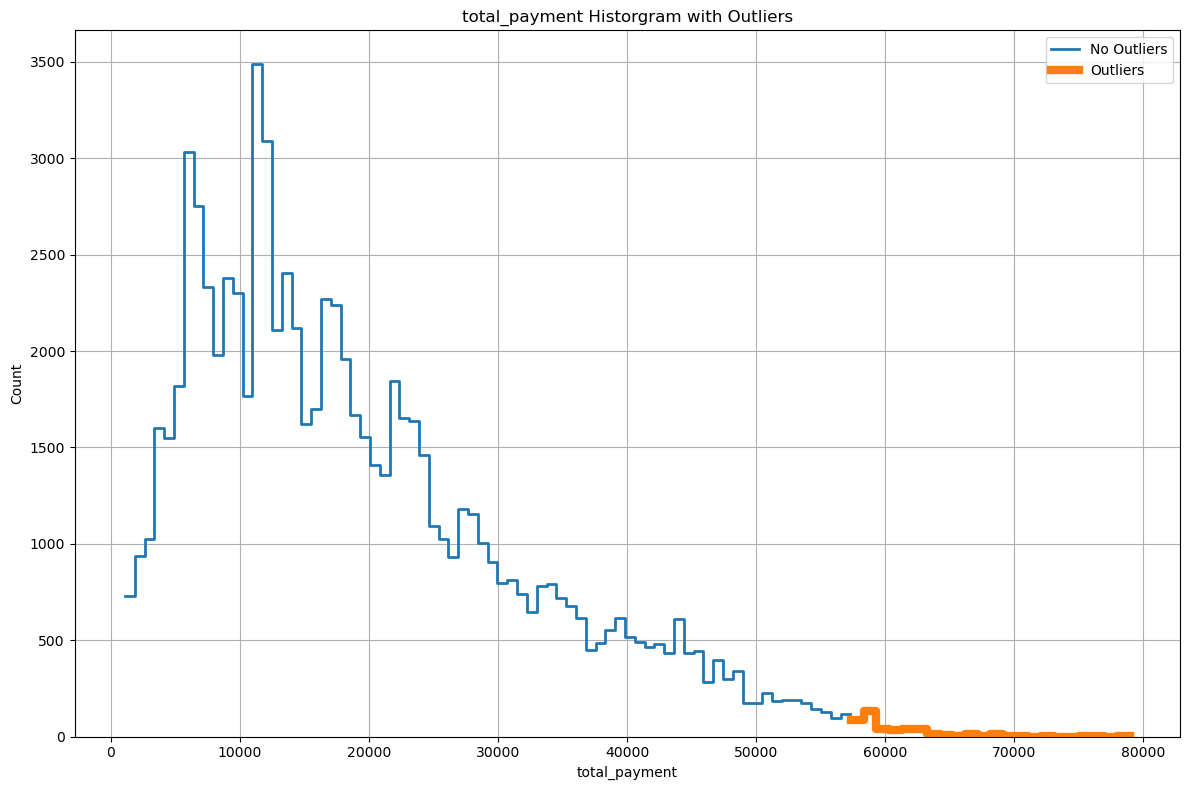

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='total_interest', ylabel='Count'>

<Axes: xlabel='total_interest', ylabel='Count'>

Text(0.5, 1.0, 'total_interest Historgram with Outliers')

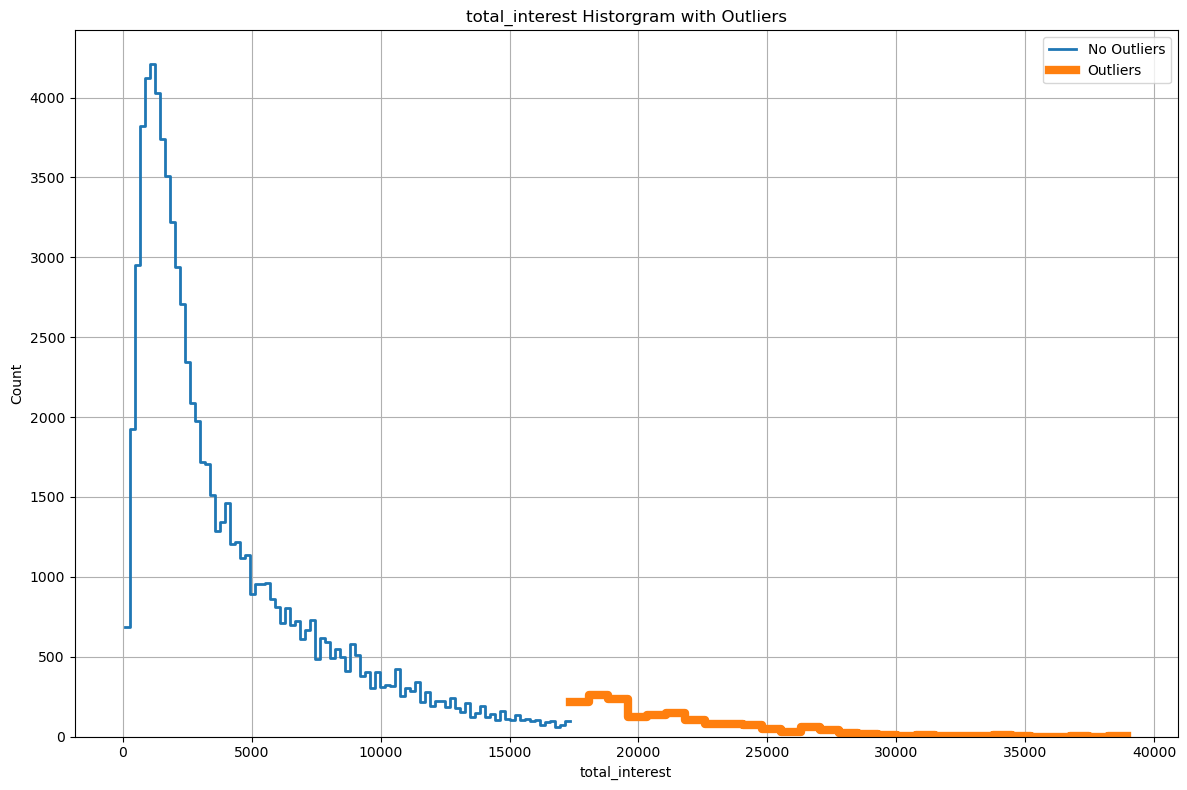

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='debt_to_income_ratio', ylabel='Count'>

<Axes: xlabel='debt_to_income_ratio', ylabel='Count'>

Text(0.5, 1.0, 'debt_to_income_ratio Historgram with Outliers')

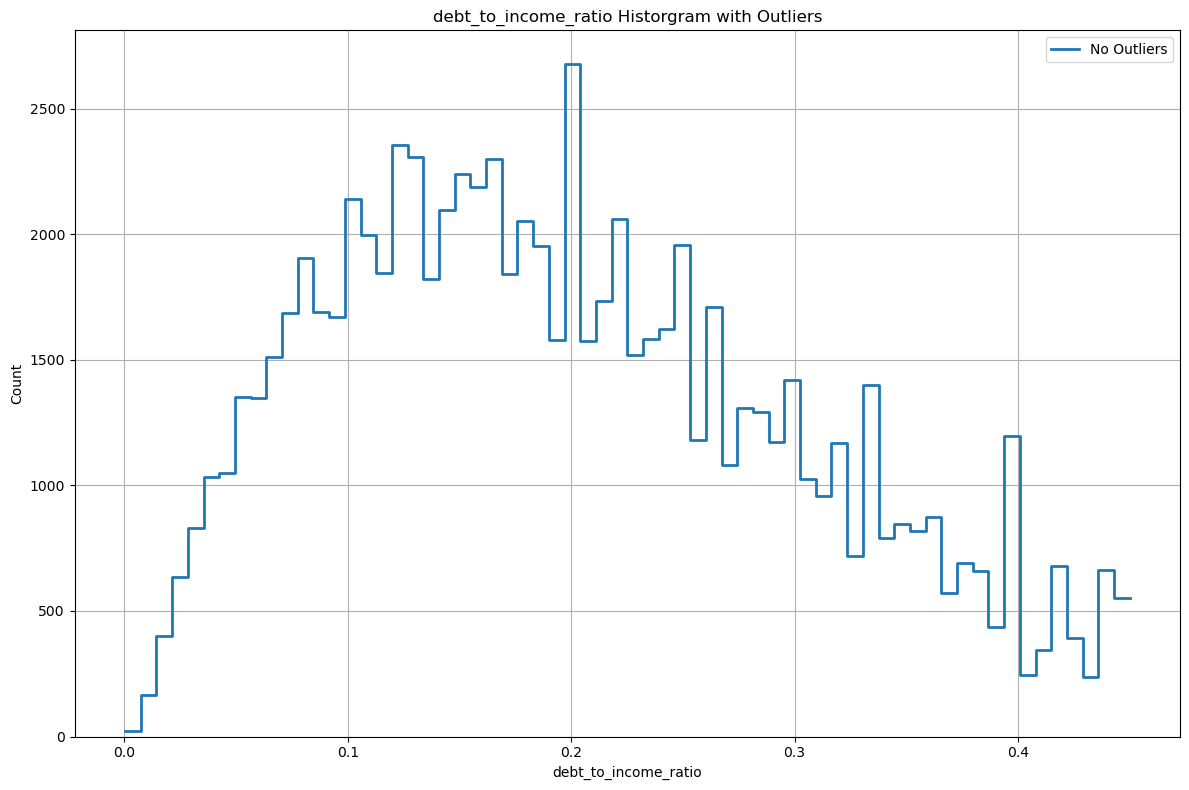

In [37]:
for new_col in new_num_features:
    plt.figure(figsize=(12, 8))
    sns.histplot( df_feat_sel_filtered[ (np.abs(stats.zscore(df_feat_sel_filtered[new_col])) < 3)][new_col], fill=False, element="step", lw=2, label='No Outliers', legend=True) 
    sns.histplot( df_feat_sel_filtered[ (np.abs(stats.zscore(df_feat_sel_filtered[new_col])) > 3)][new_col], fill=False, element="step", lw=6, label='Outliers', legend=True) 
    plt.grid(True)
    plt.title(f'{new_col} Historgram with Outliers')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Observation
- The most noticable distribution 'tail' of outliers are found within 'annual_income', 'total_bc_limit', and 'total_interest'
- We are going to investigate the Log-scale and see if these still produce significant noticable outliers

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='annual_inc', ylabel='Count'>

<Axes: xlabel='annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'annual_inc Historgram with Outliers')

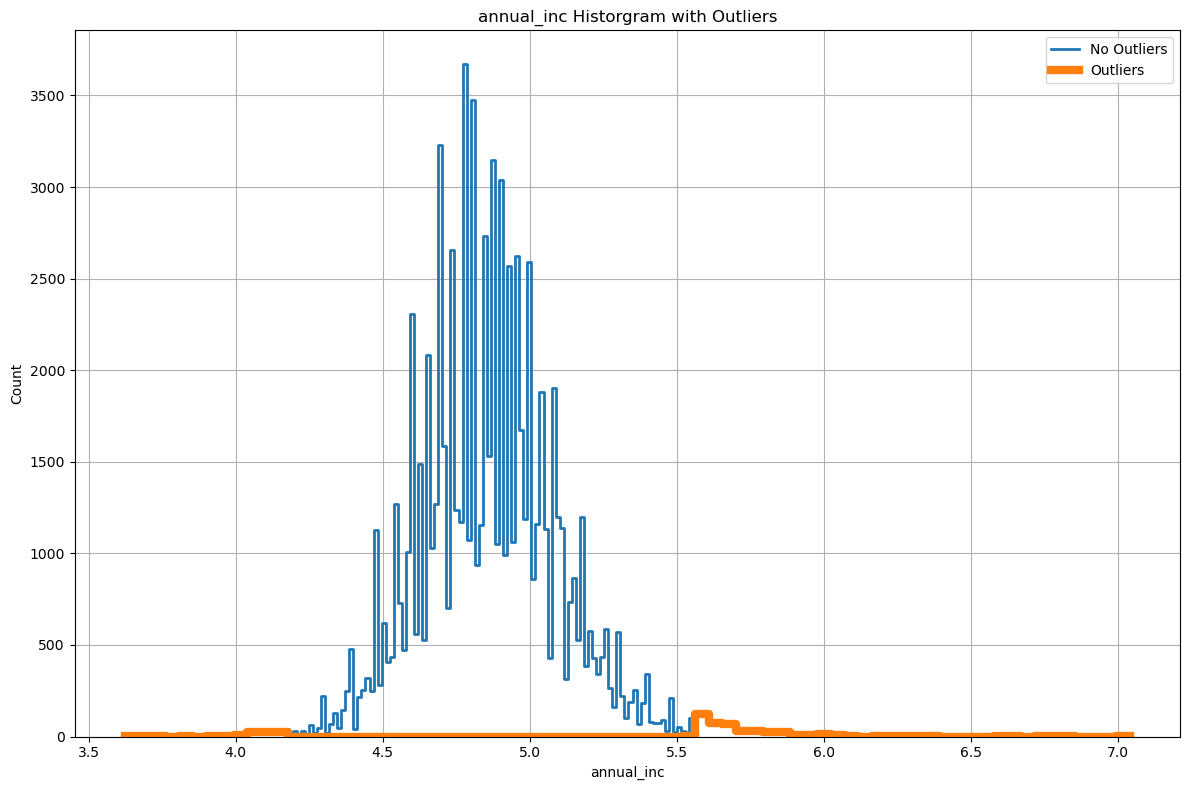

In [38]:
plt.figure(figsize=(12, 8))
sns.histplot( np.log10(df_feat_sel_filtered[ (np.abs(stats.zscore(np.log10(df_feat_sel_filtered['annual_inc']))) < 3)]['annual_inc']), fill=False, element="step", lw=2, label='No Outliers', legend=True) 
sns.histplot( np.log10(df_feat_sel_filtered[ (np.abs(stats.zscore(np.log10(df_feat_sel_filtered['annual_inc']))) > 3)]['annual_inc']), fill=False, element="step", lw=6, label='Outliers', legend=True) 
plt.grid(True)
plt.title(f'{'annual_inc'} Historgram with Outliers')
plt.legend()
plt.tight_layout()
plt.show()



In [39]:
df_annual_income_outliers = df_feat_sel_filtered[ (np.abs(stats.zscore(np.log10(df_feat_sel_filtered['annual_inc']))) > 3)]

df_annual_income_outliers

loan_amnt  installment  annual_inc    dti  fico_range_low  \
151      21000.0       761.84    420000.0  22.74           705.0   
204      40000.0       885.75    375000.0  14.03           730.0   
339      40000.0      1235.45   1000000.0   7.72           690.0   
390      40000.0      1204.42    400000.0   6.85           825.0   
404      40000.0      1235.45    490000.0   7.07           740.0   
...          ...          ...         ...    ...             ...   
99530    31575.0       983.05    375000.0  14.37           685.0   
99562    28000.0       899.15    800000.0   8.77           690.0   
99716    25000.0       775.94    556000.0  21.31           700.0   
99764     1050.0        37.44     14500.0  14.82           715.0   
99825    40000.0      1238.93    394150.0   3.53           745.0   

       fico_range_high  total_acc  total_bc_limit  int_rate_num        term  \
151              709.0       58.0        100200.0        0.1825  _36_months   
204              734.0       58.0         43200.0        0.1180  _60_months   
339              694.0       29.0         71100.0        0.0702  _36_months   
390              829.0       23.0         33700.0        0.0531  _36_months   
404              744.0       27.0         21000.0        0.0702  _36_months   
...                ...        ...             ...           ...         ...   
99530            689.0       34.0         47100.0        0.0756  _36_months   
99562            694.0       59.0        144500.0        0.0967  _36_months   
99716            704.0       40.0         71300.0        0.0735  _36_months   
99764            719.0       16.0         10000.0        0.1699  _36_months   
99825            749.0       27.0        166500.0        0.0721  _36_months   

      grade    emp_length home_ownership             purpose application_type  \
151       E  10plus_years       MORTGAGE      small_business       Individual   
204       B       5_years            OWN  debt_consolidation       Individual   
339       A  10plus_years       MORTGAGE         credit_card       Individual   
390       A        0_year       MORTGAGE    home_improvement       Individual   
404       A       3_years       MORTGAGE    home_improvement       Individual   
...     ...           ...            ...                 ...              ...   
99530     A        0_year       MORTGAGE    home_improvement       Individual   
99562     B       6_years            OWN         credit_card       Individual   
99716     A  10plus_years       MORTGAGE    home_improvement       Individual   
99764     D       3_years            OWN  debt_consolidation       Individual   
99825     A  10plus_years       MORTGAGE               other       Individual   

       loan_default  term_num  total_payment  total_interest  \
151           False      36.0       27426.24         6426.24   
204           False      60.0       53145.00        13145.00   
339           False      36.0       44476.20         4476.20   
390           False      36.0       43359.12         3359.12   
404           False      36.0       44476.20         4476.20   
...             ...       ...            ...             ...   
99530         False      36.0       35389.80         3814.80   
99562         False      36.0       32369.40         4369.40   
99716         False      36.0       27933.84         2933.84   
99764         False      36.0        1347.84          297.84   
99825         False      36.0       44601.48         4601.48   

       debt_to_income_ratio  
151                  0.0500  
204                  0.1067  
339                  0.0400  
390                  0.1000  
404                  0.0816  
...                     ...  
99530                0.0842  
99562                0.0350  
99716                0.0450  
99764                0.0724  
99825                0.1015  

[531 rows x 20 columns]

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='total_bc_limit', ylabel='Count'>

<Axes: xlabel='total_bc_limit', ylabel='Count'>

Text(0.5, 1.0, 'total_bc_limit Historgram with Outliers')

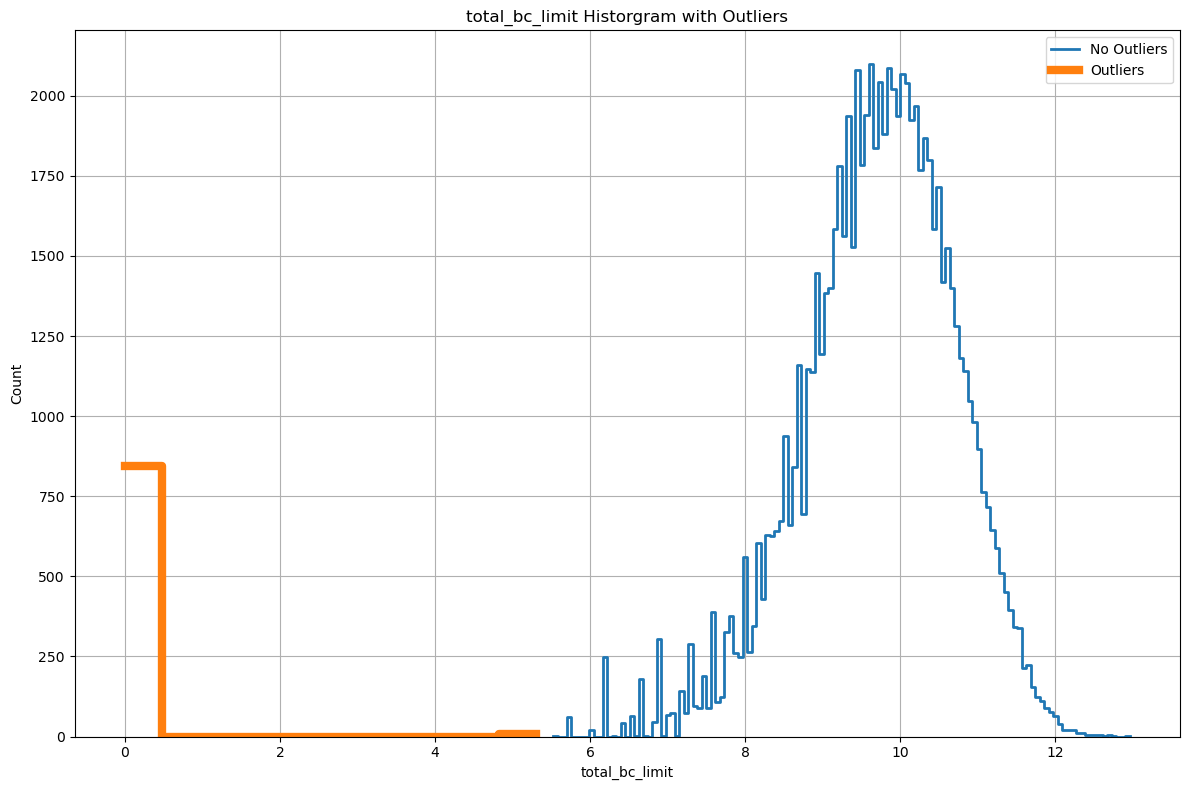

In [40]:
plt.figure(figsize=(12, 8))
sns.histplot( np.log1p(df_feat_sel_filtered[ (np.abs(stats.zscore(np.log1p(df_feat_sel_filtered['total_bc_limit']))) < 3)]['total_bc_limit']), fill=False, element="step", lw=2, label='No Outliers', legend=True) 
sns.histplot( np.log1p(df_feat_sel_filtered[ (np.abs(stats.zscore(np.log1p(df_feat_sel_filtered['total_bc_limit']))) > 3)]['total_bc_limit']), fill=False, element="step", lw=6, label='Outliers', legend=True) 
plt.grid(True)
plt.title(f'{'total_bc_limit'} Historgram with Outliers')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='total_interest', ylabel='Count'>

<Axes: xlabel='total_interest', ylabel='Count'>

Text(0.5, 1.0, 'total_interest Historgram with Outliers')

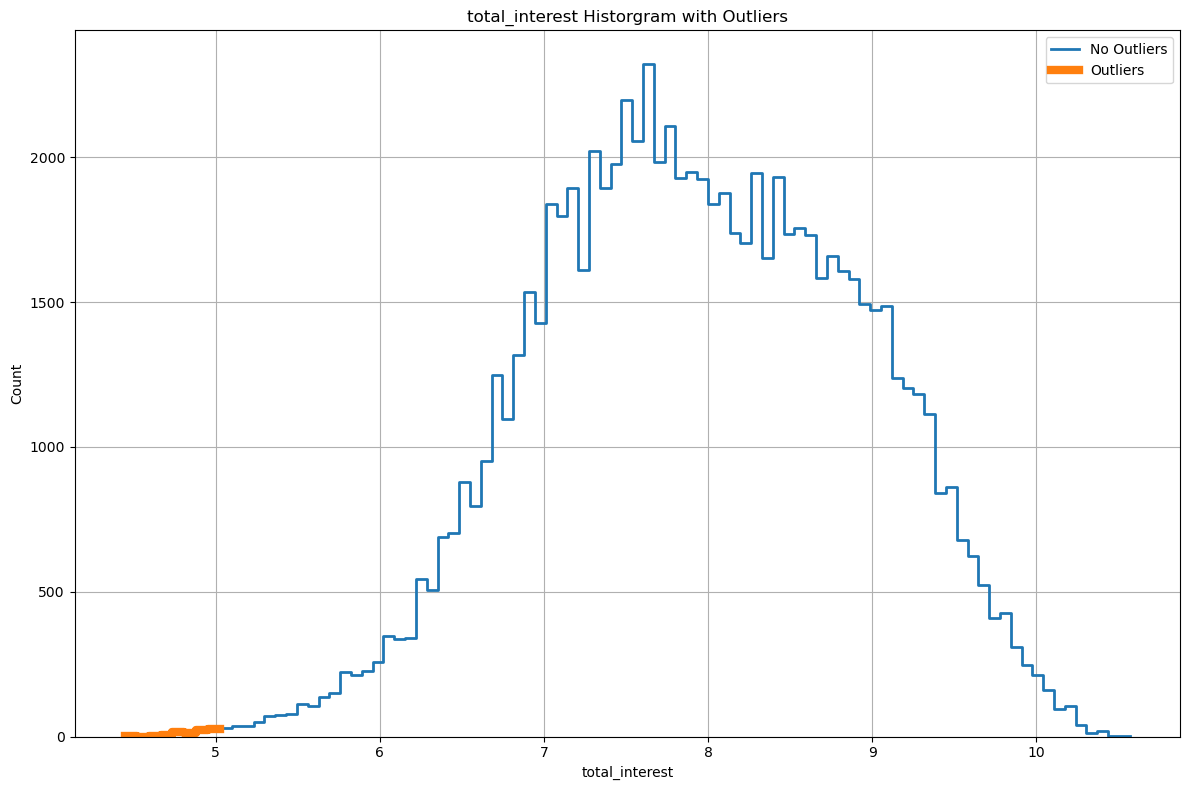

In [41]:
plt.figure(figsize=(12, 8))
sns.histplot( np.log1p(df_feat_sel_filtered[ (np.abs(stats.zscore(np.log1p(df_feat_sel_filtered['total_interest']))) < 3)]['total_interest']), fill=False, element="step", lw=2, label='No Outliers', legend=True) 
sns.histplot( np.log1p(df_feat_sel_filtered[ (np.abs(stats.zscore(np.log1p(df_feat_sel_filtered['total_interest']))) > 3)]['total_interest']), fill=False, element="step", lw=6, label='Outliers', legend=True) 
plt.grid(True)
plt.title(f'{'total_interest'} Historgram with Outliers')
plt.legend()
plt.tight_layout()
plt.show()

### Observation
- From the 3 distributions above i.e., ['annual_income', 'total_bc_limit', and 'total_interest'], only the 'annual_income' and 'total_bc_limit' showed noticable outliers via Log-scaling.
- We are going to remove records with the outliers found within log-scaled 'annual_income' and 'total_bc_limit'

In [42]:
df_annual_income_outliers = df_feat_sel_filtered[ (np.abs(stats.zscore(np.log10(df_feat_sel_filtered['annual_inc']))) > 3)]
df_total_bc_limit_outliers = df_feat_sel_filtered[ (np.abs(stats.zscore(np.log1p(df_feat_sel_filtered['total_bc_limit']))) > 3)]

# Removing annual_income outliers
df_feat_sel_filtered_outliers = df_feat_sel_filtered[~df_feat_sel_filtered.index.isin(df_annual_income_outliers.index)]

## Removing total_bc_limit outliers
df_feat_sel_filtered_outliers = df_feat_sel_filtered_outliers[~df_feat_sel_filtered_outliers.index.isin(df_total_bc_limit_outliers.index)]

df_feat_sel_filtered_outliers

loan_amnt  installment  annual_inc    dti  fico_range_low  \
1        24000.0       500.07     57000.0  25.33           680.0   
2         5000.0       162.49     55000.0   7.22           665.0   
4        14000.0       322.79     48000.0  24.30           735.0   
5         4000.0       131.89     46000.0  11.56           700.0   
6         7200.0       246.01     33000.0  10.58           680.0   
...          ...          ...         ...    ...             ...   
99993     2000.0        64.47     50000.0  26.55           705.0   
99995     3300.0       108.81     60000.0  17.98           670.0   
99996     6000.0       193.05    150000.0  13.13           715.0   
99997    10000.0       264.89     48000.0  27.79           660.0   
99998    10625.0       336.94     90000.0  27.58           765.0   

       fico_range_high  total_acc  total_bc_limit  int_rate_num        term  \
1                684.0       24.0         13000.0        0.0916  _60_months   
2                669.0        9.0         10000.0        0.1049  _36_months   
4                739.0       23.0         28800.0        0.1359  _60_months   
5                704.0        7.0          7700.0        0.1149  _36_months   
6                684.0       35.0          6500.0        0.1398  _36_months   
...                ...        ...             ...           ...         ...   
99993            709.0       15.0          4300.0        0.0993  _36_months   
99995            674.0       14.0         32800.0        0.1149  _36_months   
99996            719.0       34.0         35800.0        0.0980  _36_months   
99997            664.0       27.0          9400.0        0.1999  _60_months   
99998            769.0       49.0         53400.0        0.0881  _36_months   

      grade    emp_length home_ownership             purpose application_type  \
1         B       6_years           RENT         credit_card       Individual   
2         B  10plus_years       MORTGAGE         credit_card       Individual   
4         C  10plus_years       MORTGAGE  debt_consolidation       Individual   
5         B  10plus_years           RENT              moving       Individual   
6         C       6_years       MORTGAGE    home_improvement       Individual   
...     ...           ...            ...                 ...              ...   
99993     B  10plus_years            OWN      major_purchase       Individual   
99995     B        1_year       MORTGAGE               other       Individual   
99996     B       2_years           RENT      major_purchase       Individual   
99997     D  10plus_years           RENT  debt_consolidation       Individual   
99998     A  10plus_years       MORTGAGE  debt_consolidation       Individual   

       loan_default  term_num  total_payment  total_interest  \
1             False      60.0       30004.20         6004.20   
2             False      36.0        5849.64          849.64   
4             False      60.0       19367.40         5367.40   
5              True      36.0        4748.04          748.04   
6             False      36.0        8856.36         1656.36   
...             ...       ...            ...             ...   
99993         False      36.0        2320.92          320.92   
99995         False      36.0        3917.16          617.16   
99996         False      36.0        6949.80          949.80   
99997          True      60.0       15893.40         5893.40   
99998         False      36.0       12129.84         1504.84   

       debt_to_income_ratio  
1                    0.4211  
2                    0.0909  
4                    0.2917  
5                    0.0870  
6                    0.2182  
...                     ...  
99993                0.0400  
99995                0.0550  
99996                0.0400  
99997                0.2083  
99998                0.1181  

[81834 rows x 20 columns]

### Observation
- Now are data has reduced by ~19% from its initial state

---

- Next, we are going to see their skewness (symmetry)

Table of Summary Statistics for our Chopped_Filtered Dataframe


column          mean      median        mode           std  \
0             loan_amnt  15045.687917  12825.0000  10000.0000   9152.543626   
0           installment    444.072301    376.0800    301.1500    264.429732   
0            annual_inc  82178.974597  70000.0000  60000.0000  46649.189050   
0                   dti     17.687532     17.4300     15.6000      7.837378   
0        fico_range_low    699.371960    690.0000    670.0000     33.158085   
0       fico_range_high    703.372156    694.0000    674.0000     33.158947   
0             total_acc     24.166166     22.0000     19.0000     12.018831   
0        total_bc_limit  24841.943679  17500.0000   5000.0000  24004.948435   
0          int_rate_num      0.128680      0.1235      0.0819      0.048241   
0         total_payment  19396.078322  16646.7600  10841.4000  12582.202548   
0        total_interest   4350.390405   2732.0200    841.4000   4324.707267   
0  debt_to_income_ratio      0.200681      0.1875      0.2000      0.103824   

                                                                                 perc_1-_25_50_75_95  \
0                                                        [5000.0, 8000.0, 12825.0, 20000.0, 35000.0]   
0                                                         [162.12, 254.37, 376.08, 585.1675, 979.02]   
0                                                    [38000.0, 50000.0, 70000.0, 100000.0, 175000.0]   
0                                                                  [7.3, 11.78, 17.43, 23.55, 31.06]   
0                                                                [665.0, 675.0, 690.0, 715.0, 765.0]   
0                                                                [669.0, 679.0, 694.0, 719.0, 769.0]   
0                                                                     [10.0, 15.0, 22.0, 31.0, 47.0]   
0                                                        [4700.0, 9100.0, 17500.0, 32400.0, 71600.0]   
0                                              [0.0721, 0.0902, 0.1235, 0.1561, 0.21989999999999998]   
0                                         [5843.88, 9685.44, 16646.760000000002, 26528.04, 44766.72]   
0  [820.2799999999997, 1395.960000000001, 2732.0199999999995, 5874.600000000002, 13251.109999999977]   
0                                                           [0.0716, 0.1193, 0.1875, 0.2727, 0.3974]   

   skewness_value  skewness_value_log  \
0        0.823441           -0.653984   
0        1.040251           -0.579149   
0        1.869584            0.158458   
0        0.071472           -1.220591   
0        1.135187            1.014774   
0        1.135424            1.015593   
0        0.998135           -0.430218   
0        2.588364           -0.513514   
0        0.806154            0.688993   
0        0.934351           -0.563806   
0        2.019605           -0.080261   
0        0.406282            0.254575   

                                 skew_detail  \
0  Skewness > 0: Positive skew (right skew).   
0  Skewness > 0: Positive skew (right skew).   
0  Skewness > 0: Positive skew (right skew).   
0  Skewness > 0: Positive skew (right skew).   
0  Skewness > 0: Positive skew (right skew).   
0  Skewness > 0: Positive skew (right skew).   
0  Skewness > 0: Positive skew (right skew).   
0  Skewness > 0: Positive skew (right skew).   
0  Skewness > 0: Positive skew (right skew).   
0  Skewness > 0: Positive skew (right skew).   
0  Skewness > 0: Positive skew (right skew).   
0  Skewness > 0: Positive skew (right skew).   

                                 skew_log_detail  
0   Log Skewness < 0: Negative skew (left skew).  
0   Log Skewness < 0: Negative skew (left skew).  
0  Log Skewness > 0: Positive skew (right skew).  
0   Log Skewness < 0: Negative skew (left skew).  
0  Log Skewness > 0: Positive skew (right skew).  
0  Log Skewness > 0: Positive skew (right skew).  
0   Log Skewness < 0: Negative skew (left skew).  
0   Log Skewness < 0: Negative skew (left skew).  
0  Log Skewness > 

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='loan_amnt', ylabel='Count'>

Text(0.5, 1.0, 'loan_amnt')

<Axes: >

<Axes: xlabel='loan_amnt', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : loan_amnt')

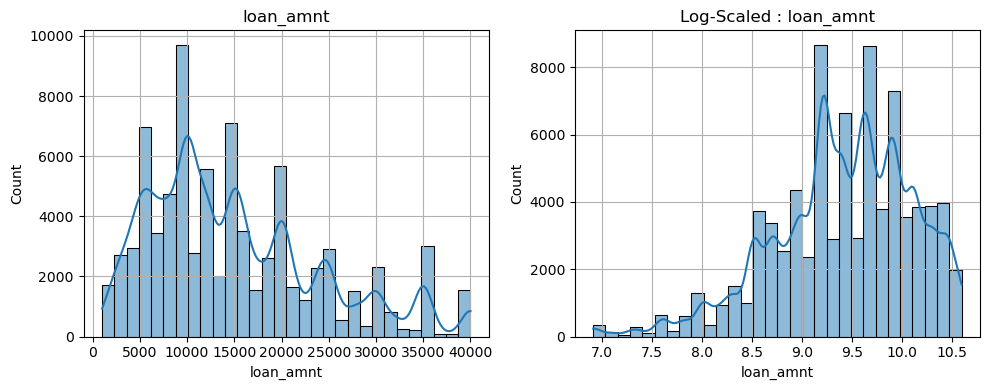

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='installment', ylabel='Count'>

Text(0.5, 1.0, 'installment')

<Axes: >

<Axes: xlabel='installment', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : installment')

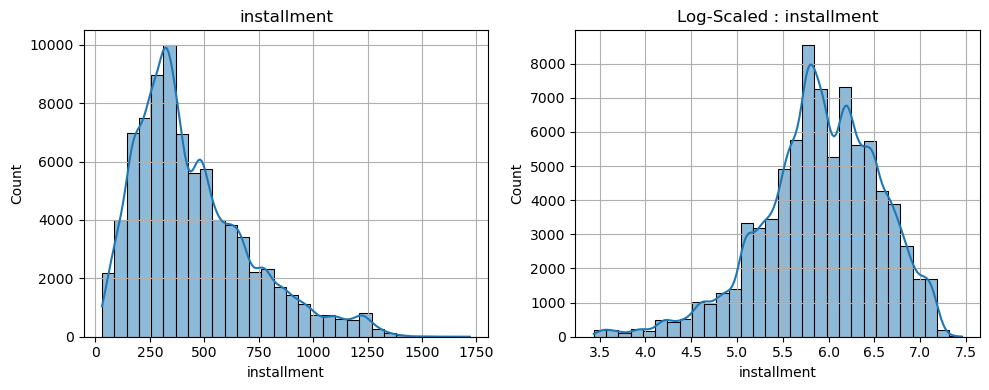

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'annual_inc')

<Axes: >

<Axes: xlabel='annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : annual_inc')

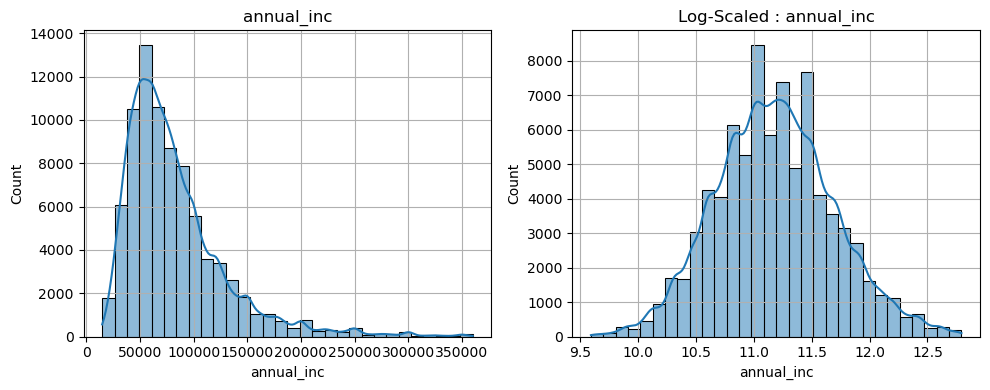

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='dti', ylabel='Count'>

Text(0.5, 1.0, 'dti')

<Axes: >

<Axes: xlabel='dti', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : dti')

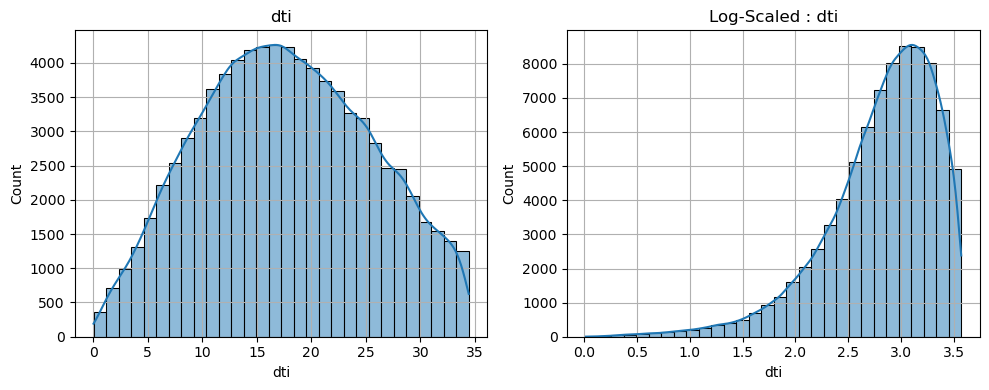

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='fico_range_low', ylabel='Count'>

Text(0.5, 1.0, 'fico_range_low')

<Axes: >

<Axes: xlabel='fico_range_low', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : fico_range_low')

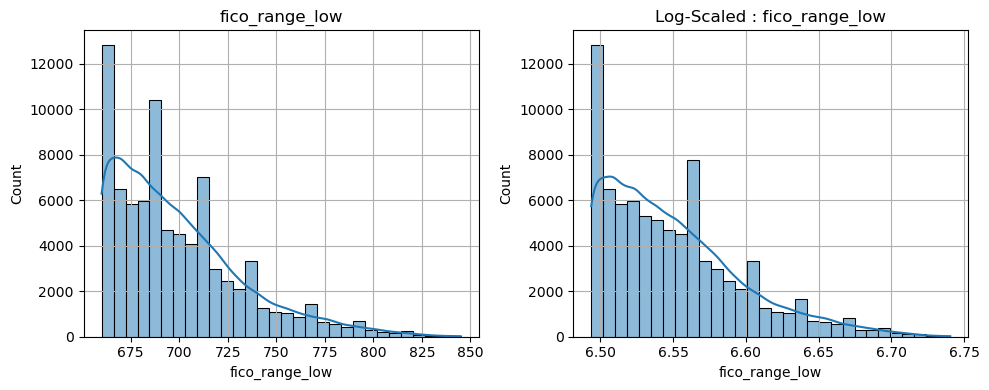

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='fico_range_high', ylabel='Count'>

Text(0.5, 1.0, 'fico_range_high')

<Axes: >

<Axes: xlabel='fico_range_high', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : fico_range_high')

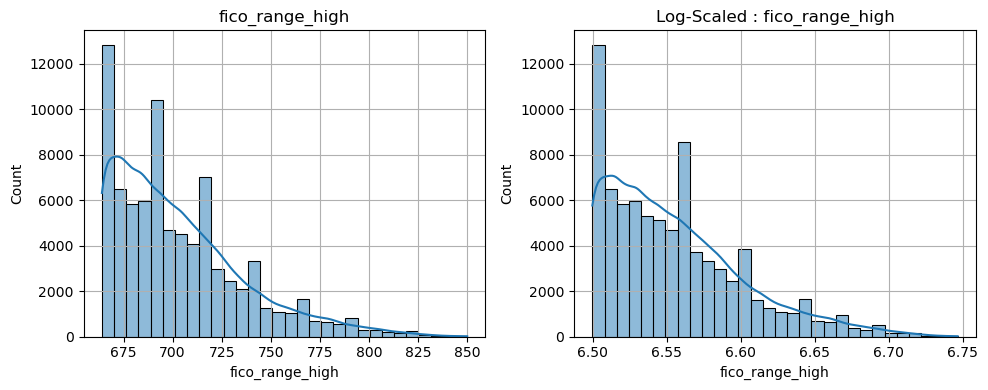

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='total_acc', ylabel='Count'>

Text(0.5, 1.0, 'total_acc')

<Axes: >

<Axes: xlabel='total_acc', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : total_acc')

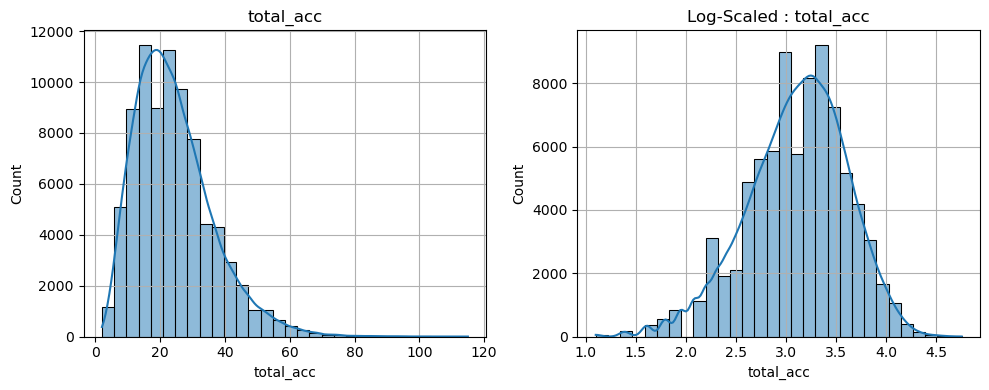

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='total_bc_limit', ylabel='Count'>

Text(0.5, 1.0, 'total_bc_limit')

<Axes: >

<Axes: xlabel='total_bc_limit', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : total_bc_limit')

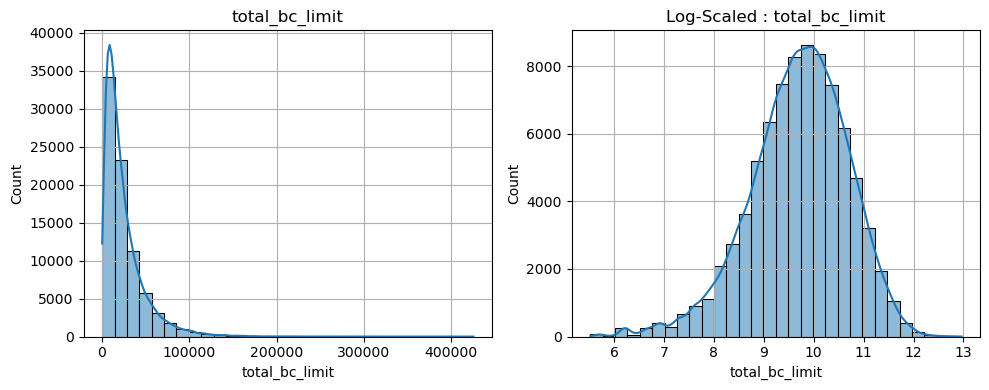

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='int_rate_num', ylabel='Count'>

Text(0.5, 1.0, 'int_rate_num')

<Axes: >

<Axes: xlabel='int_rate_num', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : int_rate_num')

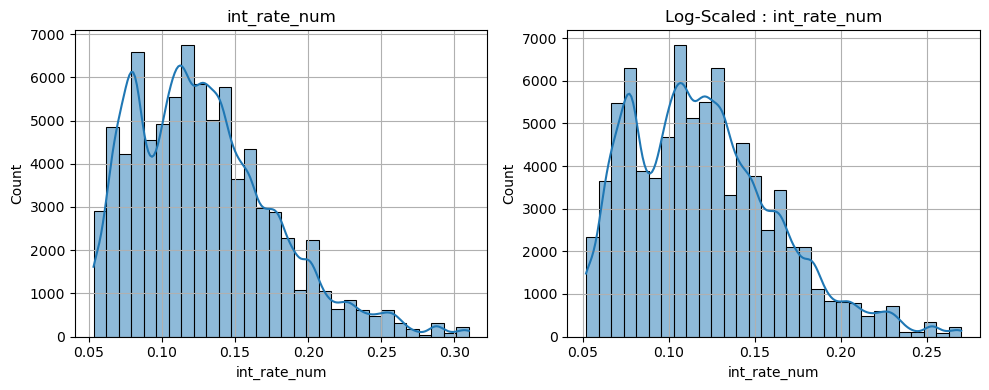

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='total_payment', ylabel='Count'>

Text(0.5, 1.0, 'total_payment')

<Axes: >

<Axes: xlabel='total_payment', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : total_payment')

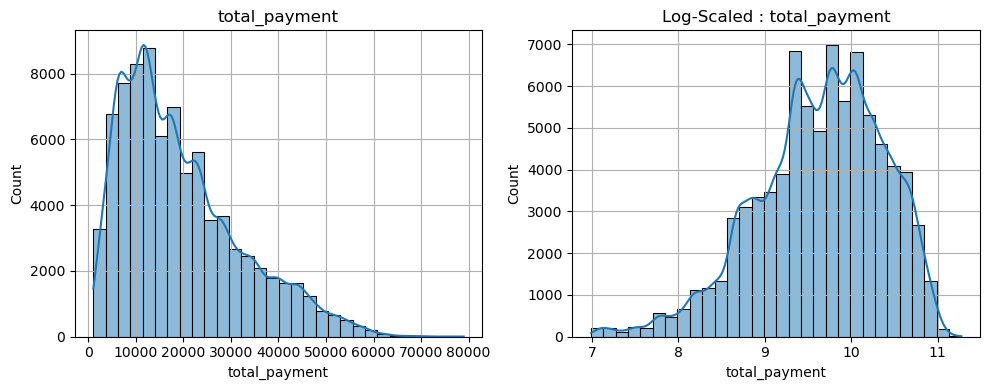

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='total_interest', ylabel='Count'>

Text(0.5, 1.0, 'total_interest')

<Axes: >

<Axes: xlabel='total_interest', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : total_interest')

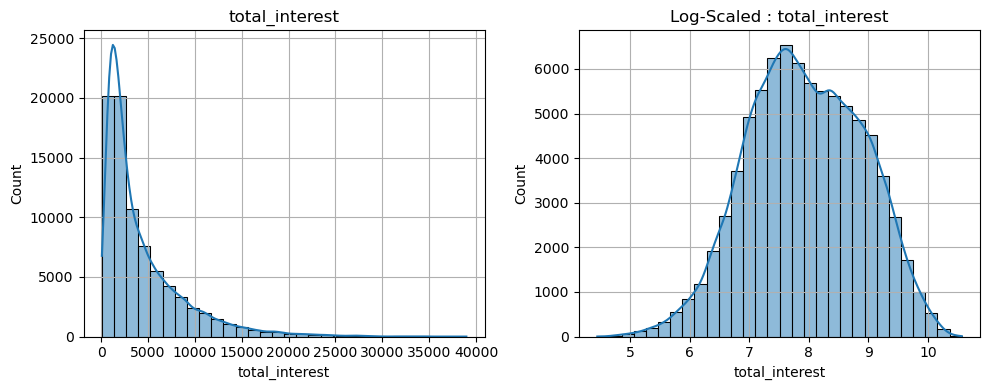

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='debt_to_income_ratio', ylabel='Count'>

Text(0.5, 1.0, 'debt_to_income_ratio')

<Axes: >

<Axes: xlabel='debt_to_income_ratio', ylabel='Count'>

Text(0.5, 1.0, 'Log-Scaled : debt_to_income_ratio')

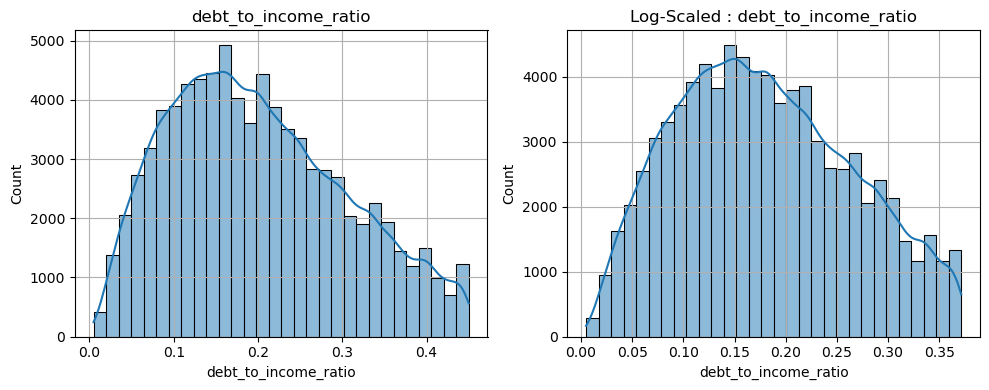

In [43]:


def summary_statistics(df, col):

    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    std = df[col].std()
    percentiles= df[col].quantile([0.1, 0.25, 0.5, 0.75, 0.95])
    skewness_value = skew(df[col])
    skewness_value_log = skew(np.log1p(df[col])) # using log1p = log(x+1) to handle/avoid log(0) = NaN values

    skew_detail = ''
    if skewness_value == 0:
        skew_detail = 'Skewness = 0: Data is perfectly symmetric.'

    elif skewness_value > 0:
        skew_detail = 'Skewness > 0: Positive skew (right skew).'

    elif skewness_value < 0:
        skew_detail ='Skewness < 0: Negative skew (left skew).'

    skew_log_detail =''
    if skewness_value_log == 0:

        skew_log_detail = 'Log Skewness = 0: Data is perfectly symmetric.'

    elif skewness_value_log > 0:
        skew_log_detail = 'Log Skewness > 0: Positive skew (right skew).'

    elif skewness_value_log < 0:
        skew_log_detail = 'Log Skewness < 0: Negative skew (left skew).'

    df_ss = pd.DataFrame({
        'column' : [col],
        'mean' : [mean],
        'median' : [median],
        'mode' : [mode],
        'std' : [std],
        'perc_1-_25_50_75_95' : [percentiles.values],
        'skewness_value' : [skewness_value],
        'skewness_value_log' : [skewness_value_log],
        'skew_detail' : [skew_detail],
        'skew_log_detail' : [skew_log_detail]
    })

    return df_ss


# combining the summary statistics results into a dataFrame - 
df_list = []
for new_num_col in new_num_features:
    df_list.append(summary_statistics(df_feat_sel_filtered_outliers, new_num_col))

print("Table of Summary Statistics for our Chopped_Filtered Dataframe")
display(pd.concat(df_list))


for new_num_col in new_num_features:
    # Plotting the distributions before standardization
    plt.figure(figsize=(10, 4))

    plt.subplot(1,2,1)
    sns.histplot(df_feat_sel_filtered_outliers[new_num_col], bins=30, kde=True)
    plt.title(f'{new_num_col}')
    plt.grid(True)

    plt.subplot(1,2,2)
    sns.histplot(np.log1p(df_feat_sel_filtered_outliers[new_num_col]), bins=30, kde=True)
    plt.title(f'Log-Scaled : {new_num_col}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# df_list_after = []
# for new_num_col in new_num_features:
#     df_list_after.append(summary_statistics(df_feat_sel_chopped, new_num_col))

# print("Table of Summary Statistics for our Chopped Dataframe")
# display(pd.concat(df_list_after))



### Observation
- We can see, some features have better skewness/symmetry when log-scaled.
- Hence, we will select the numerical features that will be log-scaled and not for our modelling later on.

In [44]:
# Features to log-scale
num_to_log_features = [
    'loan_amnt',
    'installment',
    'annual_inc',
    'fico_range_low',
    'fico_range_high',
    'total_acc',
    'total_bc_limit',
    'int_rate_num',
    'total_payment',
    'total_interest',
    'debt_to_income_ratio'
]

# Features NOT to log-scale
num_not_log_features = [
'dti'
]

for col_log in num_to_log_features:
    df_feat_sel_filtered_outliers[f'log_{col_log}'] = np.log1p(df_feat_sel_filtered_outliers[col_log])

# Features logged Scaled
num_log_features = [
    'log_loan_amnt',
    'log_installment',
    'log_annual_inc',
    'log_fico_range_low',
    'log_fico_range_high',
    'log_total_acc',
    'log_total_bc_limit',
    'log_int_rate_num',
    'log_total_payment',
    'log_total_interest',
    'log_debt_to_income_ratio'
]

df_feat_sel_filtered_outliers_log = df_feat_sel_filtered_outliers[num_log_features + num_not_log_features + cat_features + tartget_feature]

display(df_feat_sel_filtered_outliers_log)

# Stats
print("\n Stats info")
df_feat_sel_filtered_outliers_log.describe()

log_loan_amnt  log_installment  log_annual_inc  log_fico_range_low  \
1          10.085851         6.216746       10.950824            6.523562   
2           8.517393         5.096752       10.915107            6.501290   
4           9.546884         5.780095       10.778977            6.601230   
5           8.294300         4.889522       10.736418            6.552508   
6           8.881975         5.509429       10.404293            6.523562   
...              ...              ...             ...                 ...   
99993       7.601402         4.181592       10.819798            6.559615   
99995       8.101981         4.698752       11.002117            6.508769   
99996       8.699681         5.268116       11.918397            6.573680   
99997       9.210440         5.583083       10.778977            6.493754   
99998       9.271059         5.822868       11.407576            6.641182   

       log_fico_range_high  log_total_acc  log_total_bc_limit  \
1                 6.529419       3.218876            9.472782   
2                 6.507278       2.302585            9.210440   
4                 6.606650       3.178054           10.268165   
5                 6.558198       2.079442            8.949105   
6                 6.529419       3.583519            8.779711   
...                    ...            ...                 ...   
99993             6.565265       2.772589            8.366603   
99995             6.514713       2.708050           10.398214   
99996             6.579251       3.555348           10.485731   
99997             6.499787       3.332205            9.148571   
99998             6.646391       3.912023           10.885585   

       log_int_rate_num  log_total_payment  log_total_interest  \
1              0.087645          10.309126            8.700381   
2              0.099755           8.674306            6.745989   
4              0.127425           9.871398            8.588285   
5              0.108765           8.465698            6.618792   
6              0.130853           9.089004            7.412981   
...                 ...                ...                 ...   
99993          0.094674           7.750150            5.774303   
99995          0.108765           8.273377            6.426747   
99996          0.093490           8.846612            6.857304   
99997          0.182238           9.673722            8.681758   
99998          0.084433           9.403506            7.317106   

       log_debt_to_income_ratio    dti        term grade    emp_length  \
1                      0.351431  25.33  _60_months     B       6_years   
2                      0.087003   7.22  _36_months     B  10plus_years   
4                      0.255959  24.30  _60_months     C  10plus_years   
5                      0.083422  11.56  _36_months     B  10plus_years   
6                      0.197374  10.58  _36_months     C       6_years   
...                         ...    ...         ...   ...           ...   
99993                  0.039221  26.55  _36_months     B  10plus_years   
99995                  0.053541  17.98  _36_months     B        1_year   
99996                  0.039221  13.13  _36_months     B       2_years   
99997                  0.189214  27.79  _60_months     D  10plus_years   
99998                  0.111631  27.58  _36_months     A  10plus_years   

      home_ownership             purpose application_type  loan_default  
1               RENT         credit_card       Individual         False  
2           MORTGAGE         credit_card       Individual         False  
4           MORTGAGE  debt_consolidation       Individual         False  
5               RENT              moving       Individual          True  
6           MORTGAGE    home_improvement       Individual         False  
...              ...                 ...              ...           ...  
99993            OWN      major_purchase       Individual         False  
99995       MORTGAGE       


 Stats info


log_loan_amnt  log_installment  log_annual_inc  log_fico_range_low  \
count   81834.000000     81834.000000    81834.000000        81834.000000   
mean        9.408953         5.911424       11.182330            6.550526   
std         0.697017         0.647170        0.511636            0.046226   
min         6.908755         3.437851        9.592400            6.493754   
25%         8.987322         5.542713       10.819798            6.516193   
50%         9.459230         5.932457       11.156265            6.538140   
75%         9.903538         6.373606       11.512935            6.573680   
max        10.596660         7.450562       12.793862            6.740519   

       log_fico_range_high  log_total_acc  log_total_bc_limit  \
count         81834.000000   81834.000000        81834.000000   
mean              6.556234       3.108623            9.705031   
std               0.045970       0.500457            0.978125   
min               6.499787       1.098612            5.525453   
25%               6.522093       2.772589            9.116140   
50%               6.543912       3.135494            9.770013   
75%               6.579251       3.465736           10.385945   
max               6.746412       4.753590           12.960200   

       log_int_rate_num  log_total_payment  log_total_interest  \
count      81834.000000       81834.000000        81834.000000   
mean           0.120153           9.638414            7.939516   
std            0.042109           0.733798            0.966559   
min            0.051738           6.989630            4.446409   
25%            0.086361           9.178482            7.242054   
50%            0.116449           9.720031            7.913163   
75%            0.145052          10.185995            8.678563   
max            0.269951          11.276778           10.570455   

       log_debt_to_income_ratio           dti  
count              81834.000000  81834.000000  
mean                   0.179206     17.687532  
std                    0.085528      7.837378  
min                    0.004888      0.020000  
25%                    0.112703     11.780000  
50%                    0.171850     17.430000  
75%                    0.241141     23.550000  
max                    0.371564     34.440000

---

2\. Exploratory Data Analysis (EDA)
----------------------------------------

- Explore those with a large annual income are more likely to repay a loan back (theoretically), hence we should investigate below if that is the case.

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='log_annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'Annual_Income Historgram with Loan_Defaults')

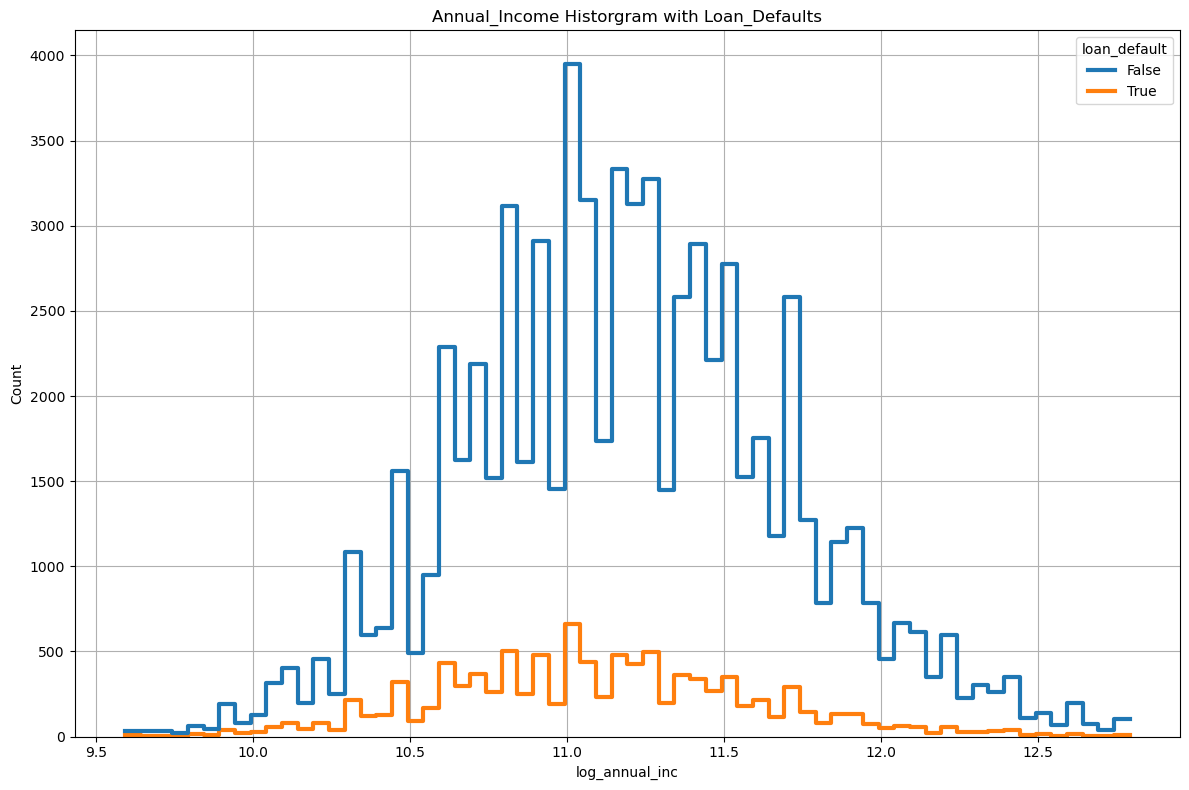

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='log_annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'Annual_Income > 90 percentile value Historgram with Loan_Defaults')

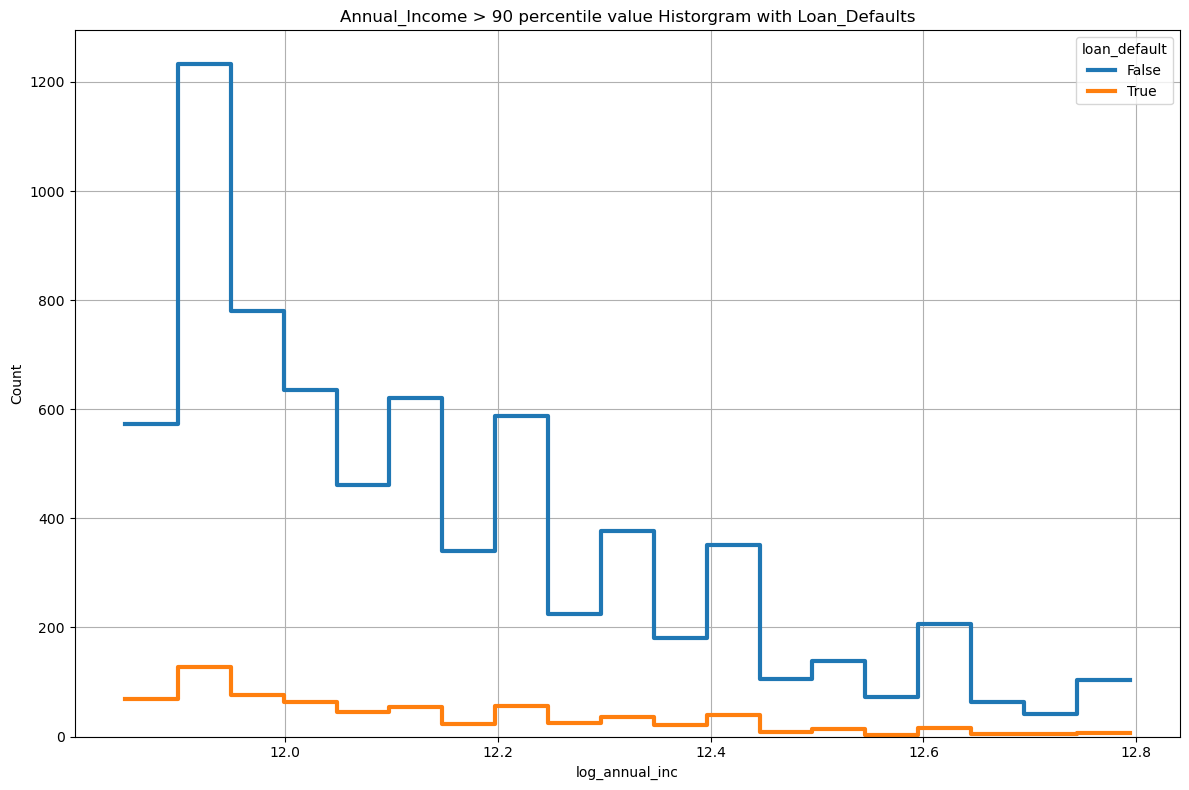

In [45]:

plt.figure(figsize=(12, 8))
sns.histplot( df_feat_sel_filtered_outliers_log, x='log_annual_inc' , hue='loan_default', binwidth=0.05, fill=False, element="step", lw=3)
plt.grid(True)
plt.title(f'{'Annual_Income'} Historgram with Loan_Defaults')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot( df_feat_sel_filtered_outliers_log[df_feat_sel_filtered_outliers_log['log_annual_inc'] > df_feat_sel_filtered_outliers_log['log_annual_inc'].quantile(0.90)], x='log_annual_inc' , hue='loan_default', binwidth=0.05, fill=False, element="step", lw=3)
plt.grid(True)
plt.title(f'{'Annual_Income'} > 90 percentile value Historgram with Loan_Defaults')
plt.tight_layout()
plt.show()


### Observation
- We see there are some cases when those with a high annual_income can still end up with a loan_default. However, There is only a small number of these cases, which may be influenced by other factors, which we will explore below with other categoriries.

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'Annual_Income Historgram with term')

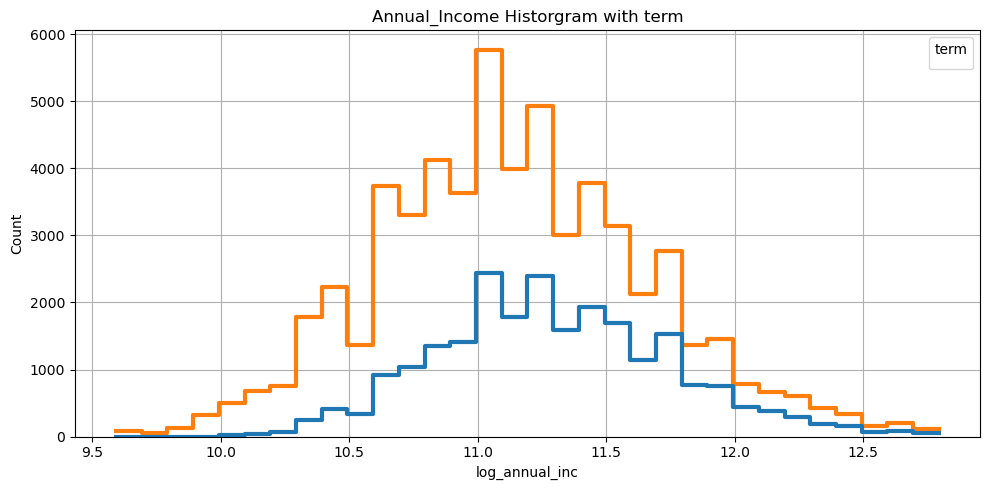

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'Annual_Income Historgram with grade')

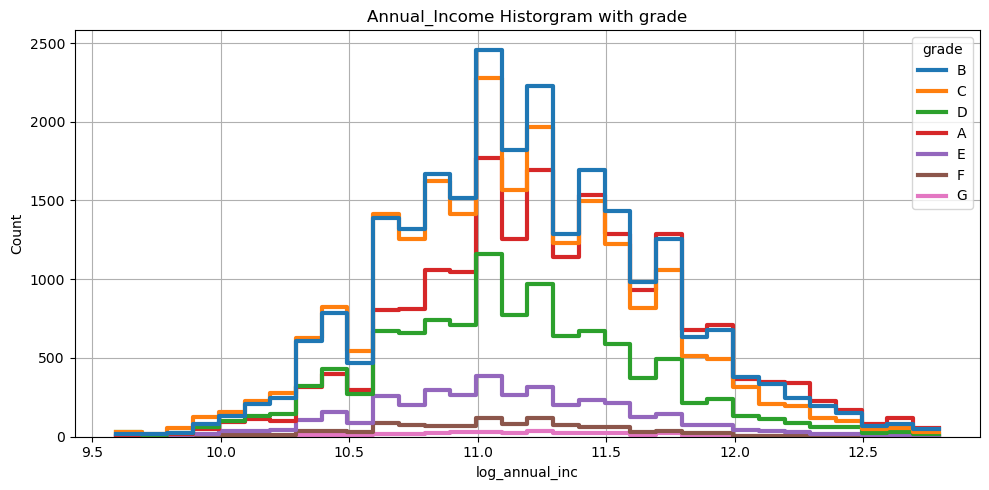

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'Annual_Income Historgram with emp_length')

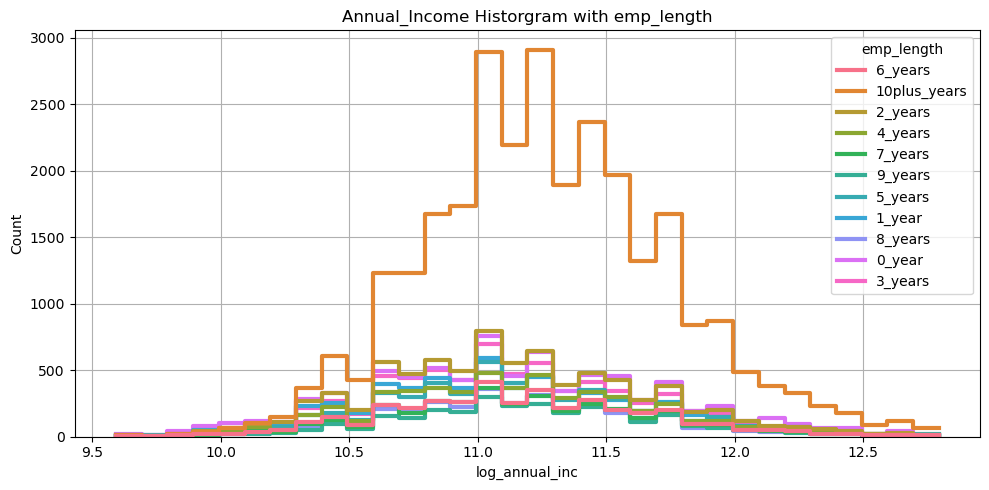

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'Annual_Income Historgram with home_ownership')

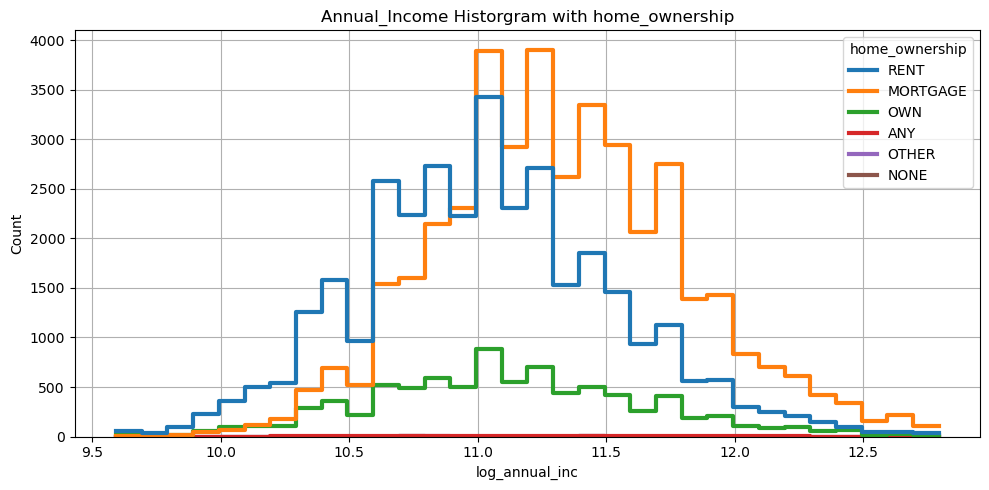

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'Annual_Income Historgram with purpose')

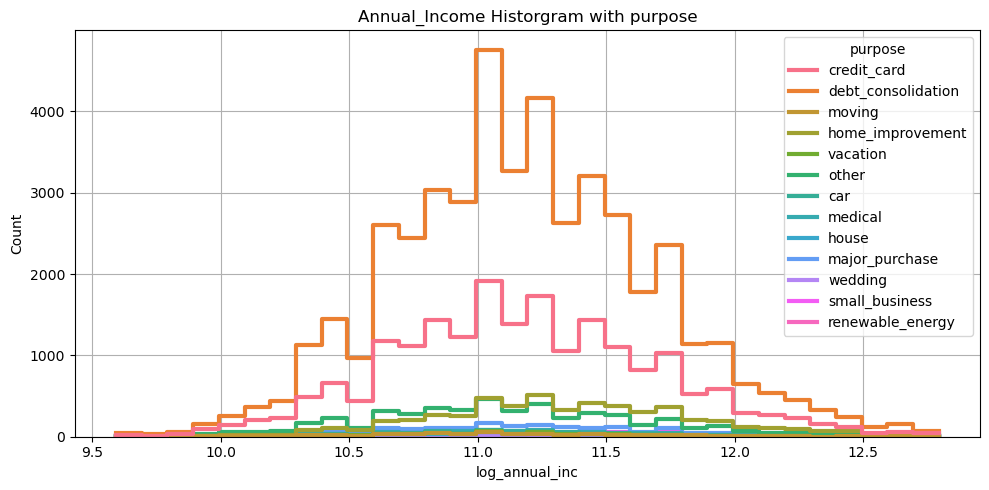

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'Annual_Income Historgram with application_type')

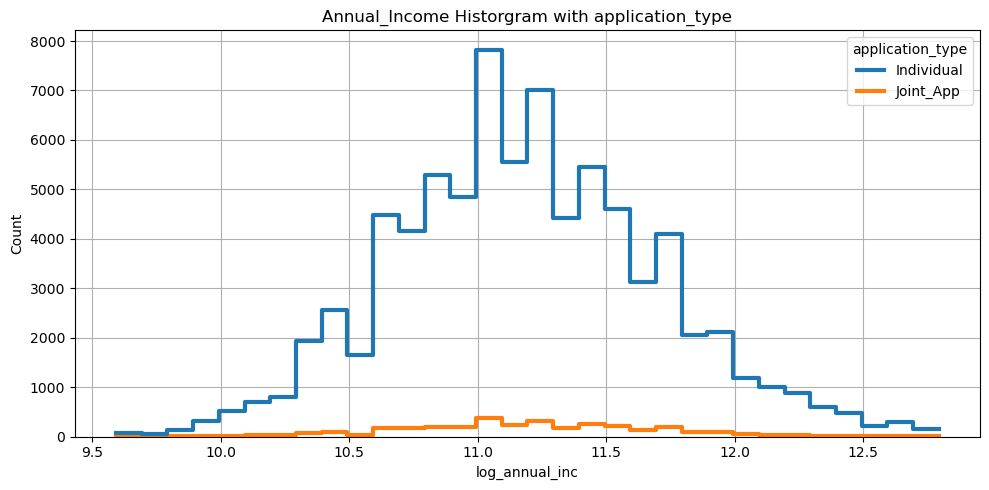

In [46]:
count = 0
for cat_col in cat_features:
    plt.figure(figsize=(10, 5))
    sns.histplot( df_feat_sel_filtered_outliers_log, x='log_annual_inc' , hue=cat_col, binwidth=0.1, fill=False, element="step", lw=3)
    plt.grid(True)
    plt.title(f'Annual_Income Historgram with {cat_col}')
    plt.tight_layout()
    plt.show()

### Observation
- We see there are larger/broader distributions of average annual_incomes for those with 
    - application_type = individuals
    - purpose = debt_consolidation
    - homeownership = [MORTGAGE, RENT]
    - emp_length = 10+ years
    - grade = [A,B,C]
    - term = 36 months

- We also see the annual_income tends to keep a normal distribution across all categories

- Explore the distribution/statistical values across all th numerical values with respect to the target variable 'loan_default'

In [47]:
df_group_loan_default_list = []

for col in new_num_features:

    df_group = df_feat_sel_filtered_outliers.groupby(by='loan_default')[col].describe([.1, .25, .5, .75, .95])
    df_group['Feature'] = col

    # Move 'Feature' as first column
    col = df_group.pop("Feature")
    df_group.insert(0, col.name, col)

    df_group_loan_default_list.append(df_group)

pd.concat(df_group_loan_default_list)



Feature    count          mean           std  \
loan_default                                                              
False                    loan_amnt  71547.0  14946.983451   9193.771161   
True                     loan_amnt  10287.0  15732.186254   8830.460027   
False                  installment  71547.0    440.564857    264.738209   
True                   installment  10287.0    468.466884    260.986094   
False                   annual_inc  71547.0  83240.239813  47191.317415   
True                    annual_inc  10287.0  74797.780625  41954.463969   
False                          dti  71547.0     17.508304      7.808048   
True                           dti  10287.0     18.934075      7.927472   
False               fico_range_low  71547.0    700.906886     33.723405   
True                fico_range_low  10287.0    688.696413     26.574599   
False              fico_range_high  71547.0    704.907096     33.724304   
True               fico_range_high  10287.0    692.696510     26.575172   
False                    total_acc  71547.0     24.154933     12.011381   
True                     total_acc  10287.0     24.244289     12.070814   
False               total_bc_limit  71547.0  25586.411827  24514.080361   
True                total_bc_limit  10287.0  19664.101487  19333.980779   
False                 int_rate_num  71547.0      0.124884      0.046713   
True                  int_rate_num  10287.0      0.155078      0.050388   
False                total_payment  71547.0  19065.627238  12437.632663   
True                 total_payment  10287.0  21694.395007  13320.823257   
False               total_interest  71547.0   4118.643787   4103.899182   
True                total_interest  10287.0   5962.208753   5355.217549   
False         debt_to_income_ratio  71547.0      0.196588      0.102847   
True          debt_to_income_ratio  10287.0      0.229146      0.106107   

                     min          10%         25%         50%           75%  \
loan_default                                                                  
False          1000.0000   5000.00000   8000.0000  12500.0000   20000.00000   
True           1000.0000   5400.00000   9600.0000  14400.0000   20000.00000   
False            30.1200    159.38000    250.5900    372.7100     581.82000   
True             32.6300    185.80000    279.1600    400.6800     608.22000   
False         14652.0000  38480.00000  50000.0000  72000.0000  100000.00000   
True          15000.0000  35000.00000  46500.0000  65000.0000   90000.00000   
False             0.0200      7.20000     11.6100     17.2200      23.30000   
True              0.2600      8.02000     12.9900     19.0300      25.11500   
False           660.0000    665.00000    675.0000    695.0000     720.00000   
True            660.0000    660.00000    670.0000    680.0000     700.00000   
False           664.0000    669.00000    679.0000    699.0000     724.00000   
True            664.0000    664.00000    674.0000    684.0000     704.00000   
False             2.0000     10.00000     15.0000     22.0000      31.00000   
True              2.0000     11.00000     15.0000     22.0000      31.00000   
False           250.0000   4800.00000   9500.0000  18100.0000   33500.00000   
True            300.0000   3800.00000   7400.0000  14000.0000   25200.00000   
False             0.0531      0.07020      0.0881      0.1198       0.15100   
True              0.0531      0.09440      0.1199      0.1498       0.18490   
False          1084.3200   5749.41600   9496.0800  16287.0000   26019.36000   
True           1174.6800   6690.45600  11521.8000  18969.8400   29472.78000   
False            84.3200    787.80000   1337.6800   2580.8000    5517.00000   
True            128.4000   1119.30400   1955.7800   4213.4800    8344.80000   
False             0.0049      0.06980      0.1164      0.1833       0.26670   
True              0.0069      0.08996      0.1448      0.2222       0.31175   

                     

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_loan_amnt', ylabel='Count'>

Text(0.5, 1.0, 'log_loan_amnt Historgram with loan_default')

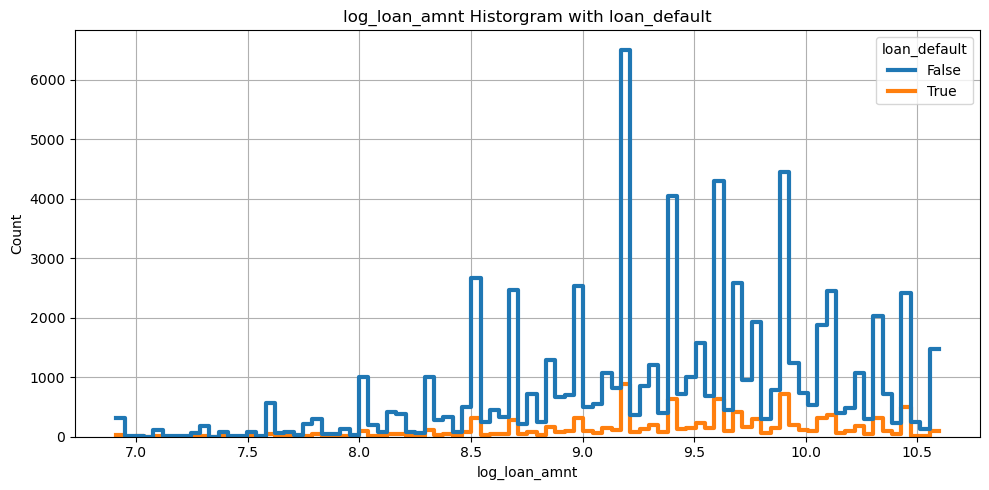

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_installment', ylabel='Count'>

Text(0.5, 1.0, 'log_installment Historgram with loan_default')

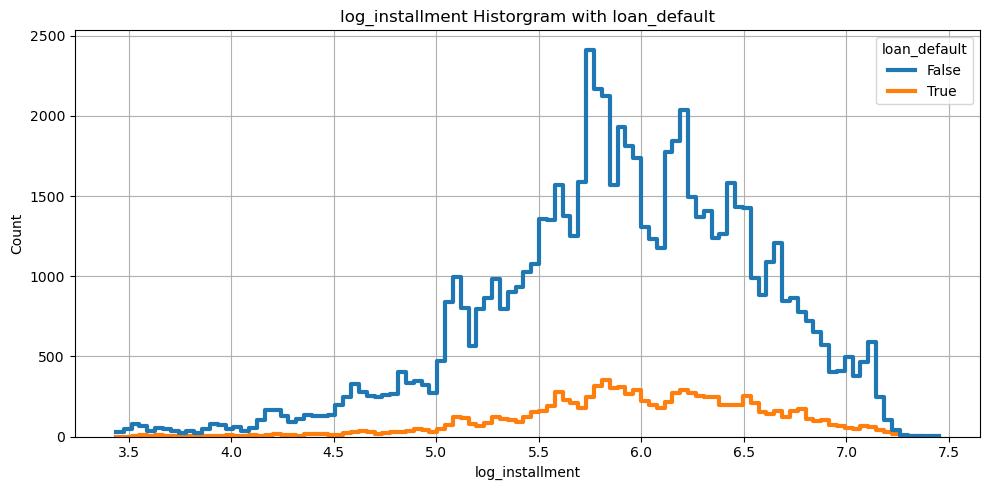

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'log_annual_inc Historgram with loan_default')

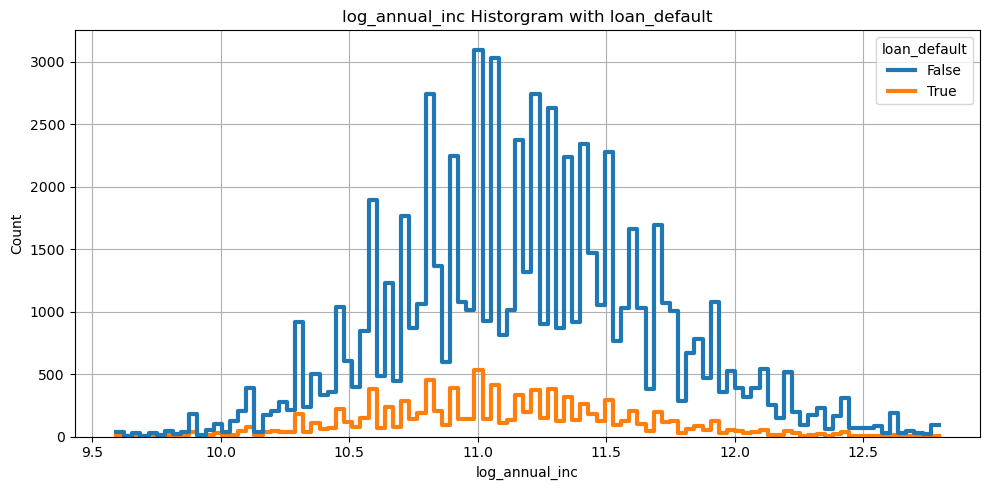

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_fico_range_low', ylabel='Count'>

Text(0.5, 1.0, 'log_fico_range_low Historgram with loan_default')

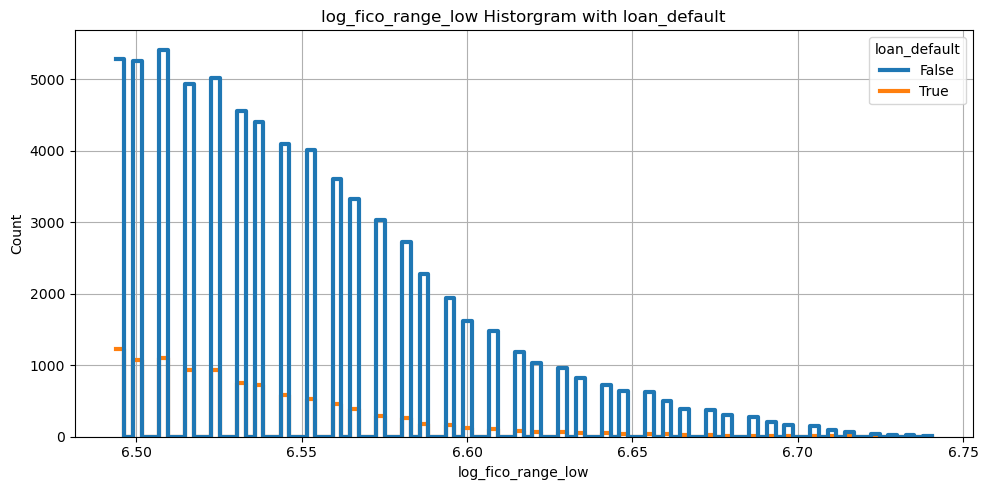

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_fico_range_high', ylabel='Count'>

Text(0.5, 1.0, 'log_fico_range_high Historgram with loan_default')

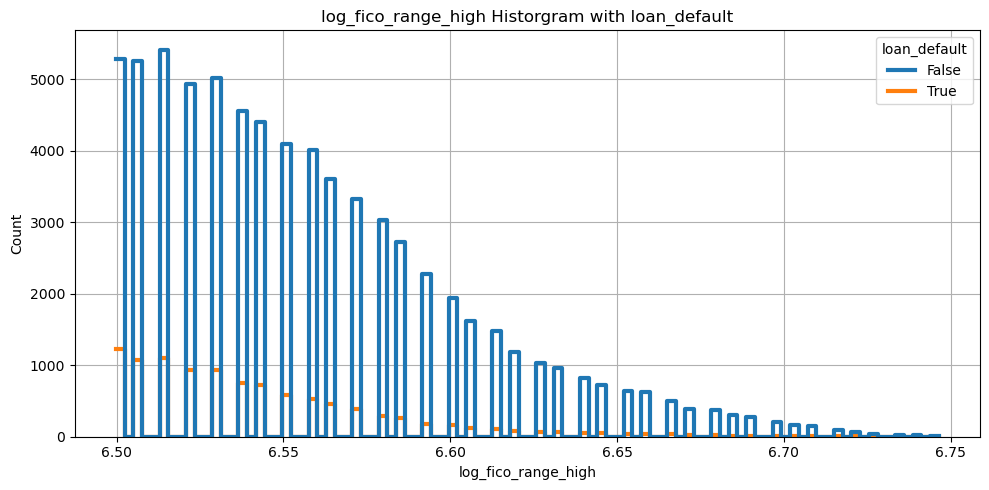

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_total_acc', ylabel='Count'>

Text(0.5, 1.0, 'log_total_acc Historgram with loan_default')

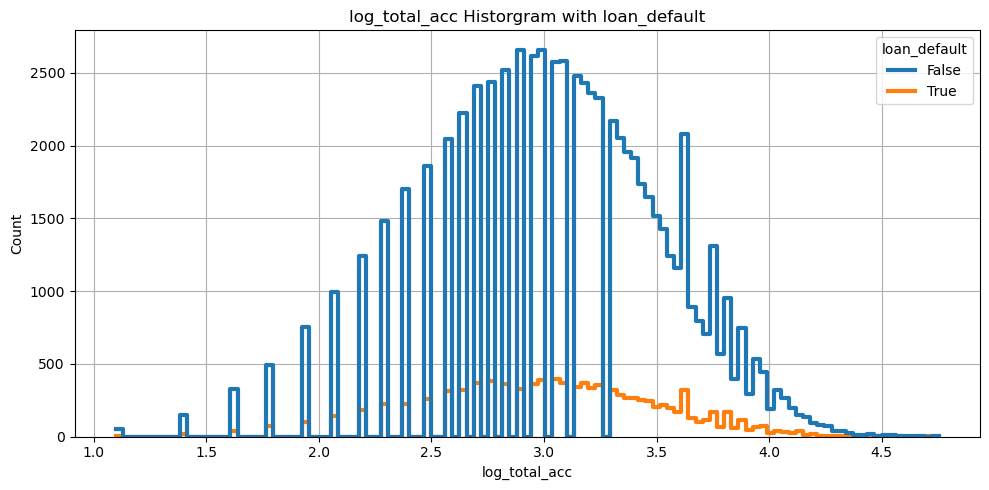

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_total_bc_limit', ylabel='Count'>

Text(0.5, 1.0, 'log_total_bc_limit Historgram with loan_default')

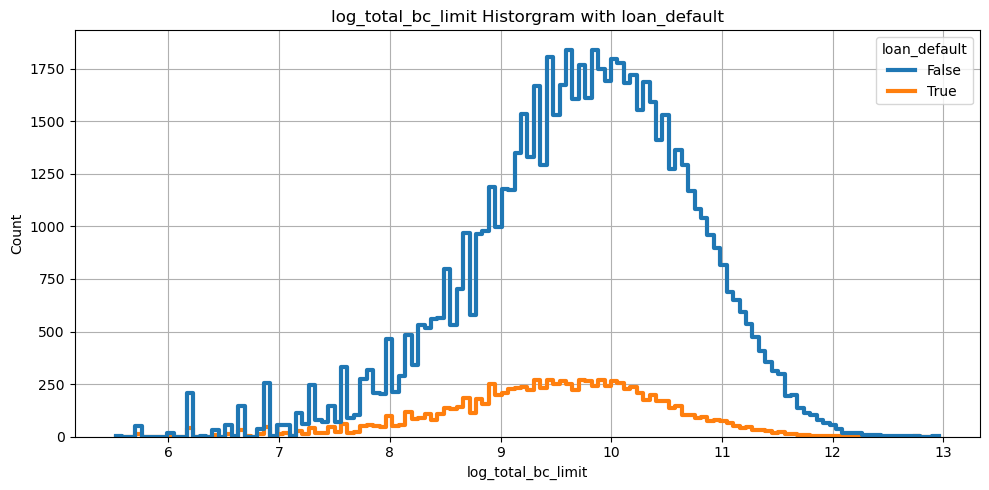

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_int_rate_num', ylabel='Count'>

Text(0.5, 1.0, 'log_int_rate_num Historgram with loan_default')

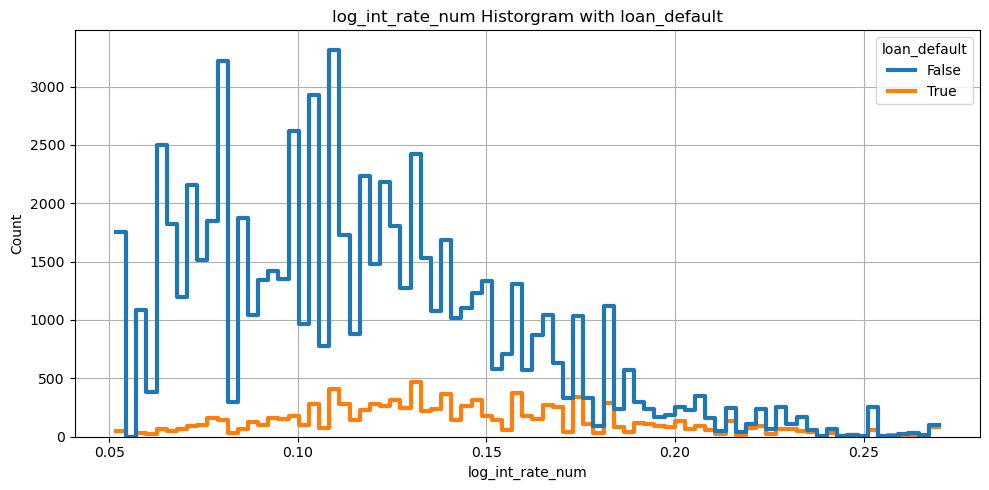

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_total_payment', ylabel='Count'>

Text(0.5, 1.0, 'log_total_payment Historgram with loan_default')

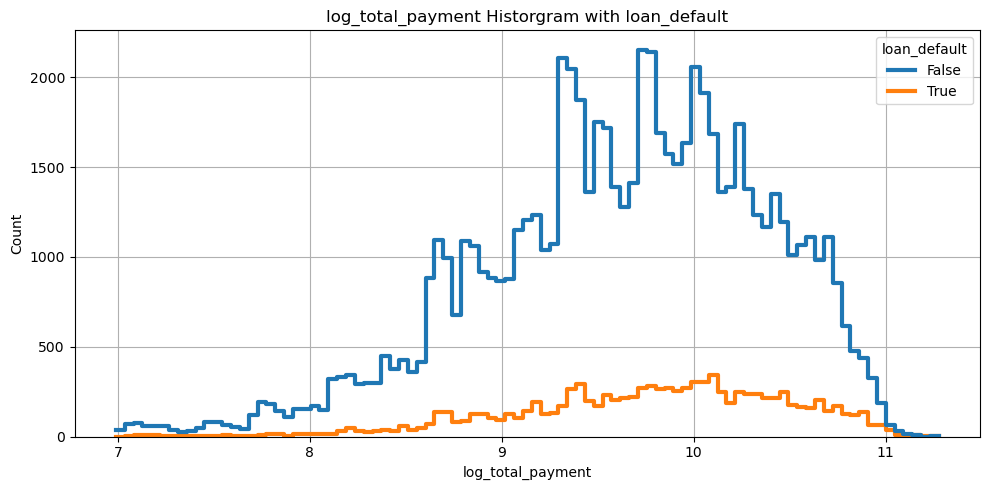

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_total_interest', ylabel='Count'>

Text(0.5, 1.0, 'log_total_interest Historgram with loan_default')

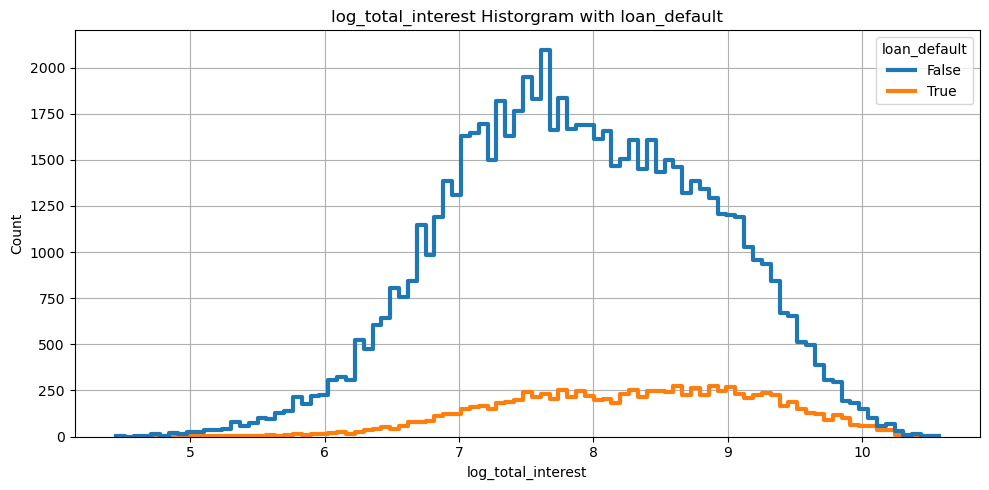

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='log_debt_to_income_ratio', ylabel='Count'>

Text(0.5, 1.0, 'log_debt_to_income_ratio Historgram with loan_default')

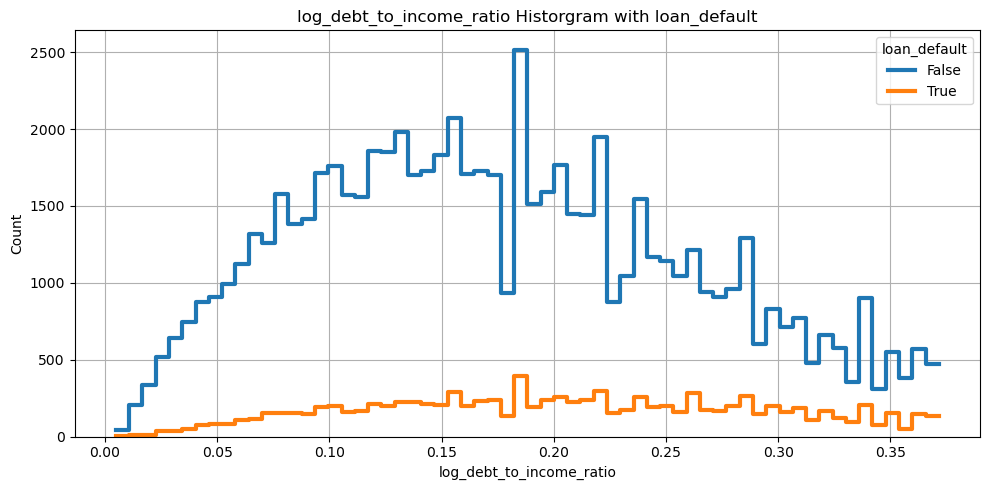

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='dti', ylabel='Count'>

Text(0.5, 1.0, 'dti Historgram with loan_default')

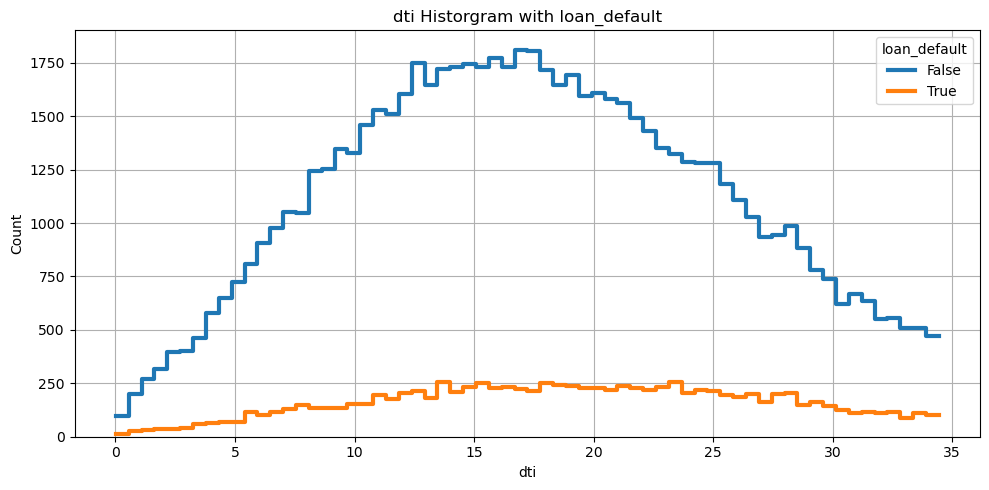

In [48]:
for num_col in num_log_features + num_not_log_features:

    plt.figure(figsize=(10, 5))
    sns.histplot( df_feat_sel_filtered_outliers_log, x=num_col , hue='loan_default', fill=False, element="step", lw=3)
    plt.grid(True)
    plt.title(f'{num_col} Historgram with loan_default')
    plt.tight_layout()
    plt.show()

### Observation
- We can see the numerical features when split via loan_default, they retain the same distribution shape (even with loan_default = False are the majority), where their min & max values being very similar, and peak-ing around their mean.

- Explore categorical relationships related to the target of loan_defaults

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='loan_default', ylabel='count'>

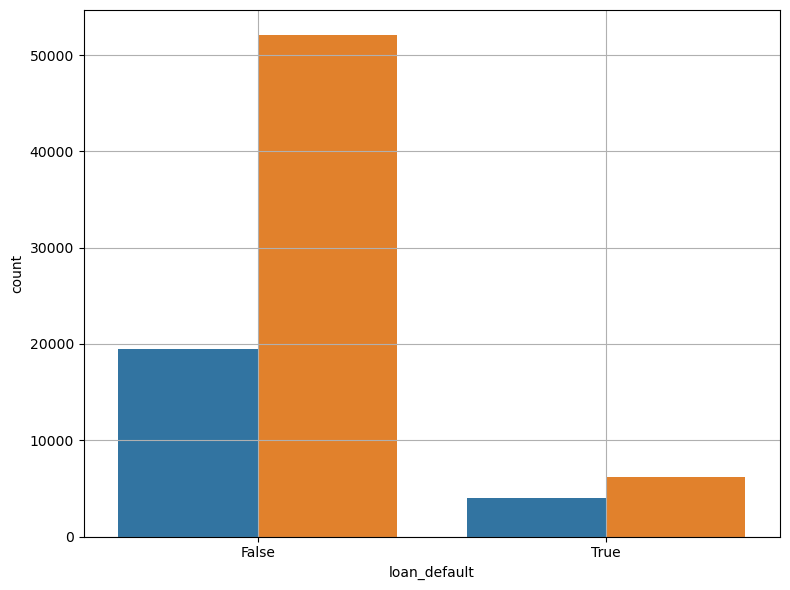

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='loan_default', ylabel='count'>

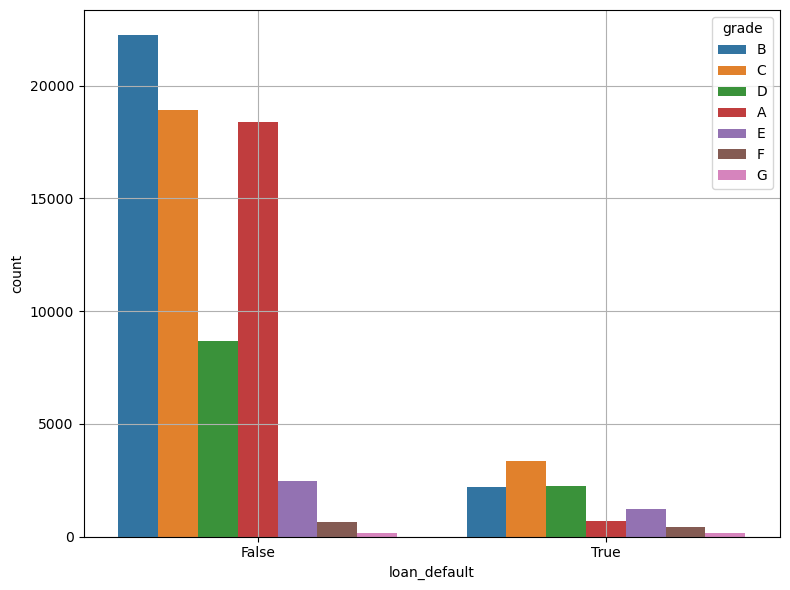

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='loan_default', ylabel='count'>

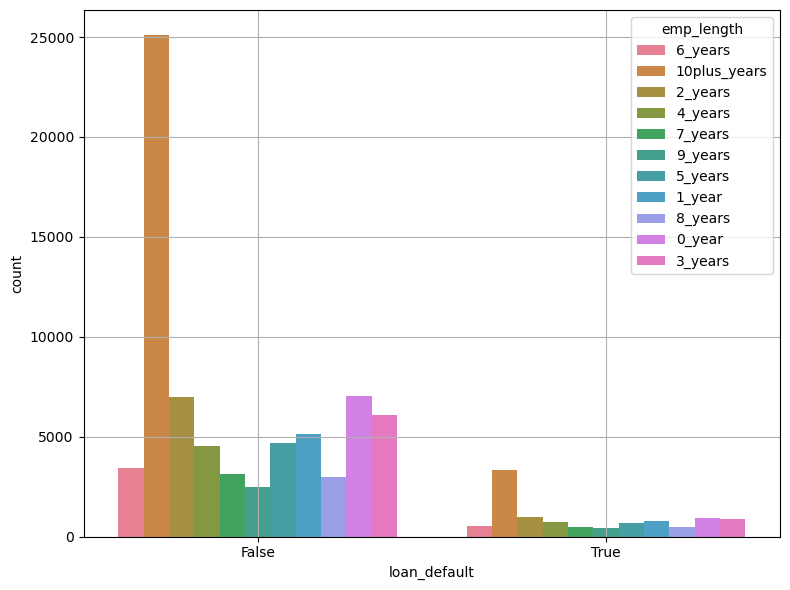

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='loan_default', ylabel='count'>

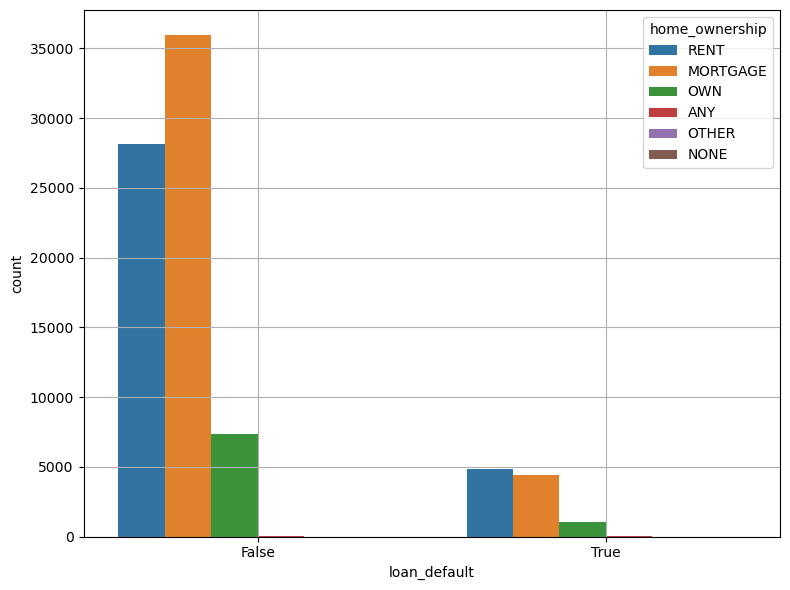

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='loan_default', ylabel='count'>

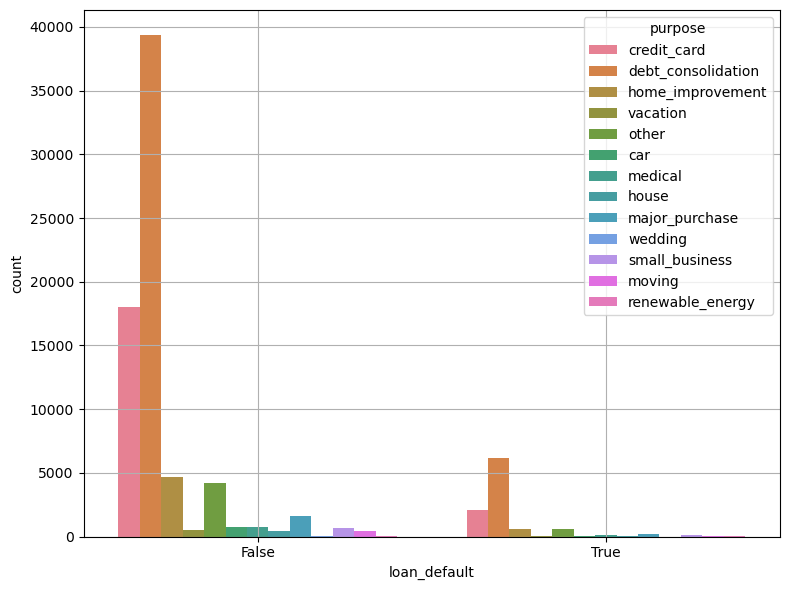

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='loan_default', ylabel='count'>

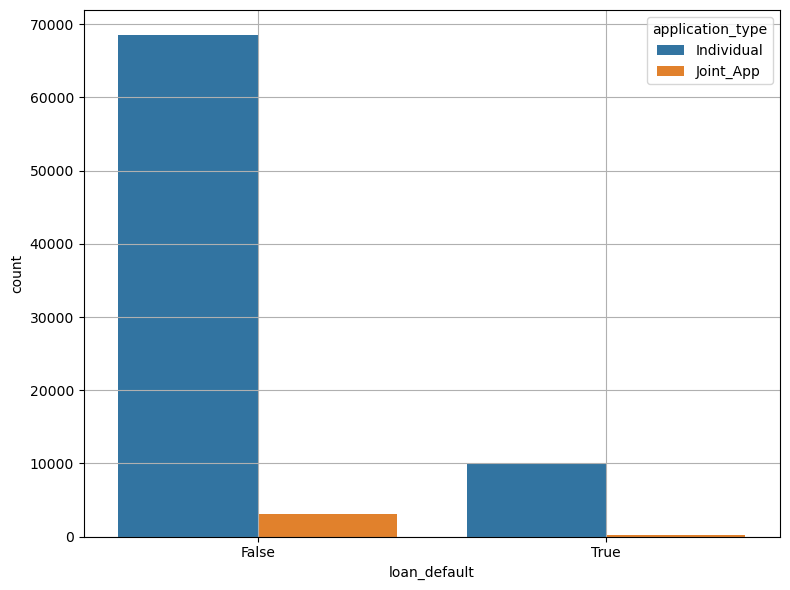

In [49]:

for cat_col in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_feat_sel_filtered_outliers_log , x='loan_default' , hue=cat_col)

    #plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Observation
- We can see the categorical relationships with loan_default. If we split these, and observe the most popular groups;
    - **loan_default = False** (i.e., loan being payed back)
        - term = 36 months
        - grade = B
        - emp_length = 10+ years
        - home_ownership = Mortgage
        - purpose = debt_consolidation
        - application_type = Individual

    - **loan_default = True** (i.e., loan NOT being payed back or Charged Off!)
        - term = 36 months
        - grade = C
        - emp_length = 10+ years
        - home_ownership = Rent
        - purpose = debt_consolidation
        - application_type = Individual

- The differences that stick out is Grade and Home_ownership, hence those with Grade C & Renting are the most popular for a loan_default = True
- Between the split of loan_defaults, we see a lot of applicants have the categorical profile;
    - term = 36 months
    - emp_length = 10+ years
    - purpose = debt_consolidation
    - application_type = Individual

- Explore Correlations with heatmaps, to see which numerical fields have stong relationships between.

Correlation Matrix


log_loan_amnt  log_installment  log_annual_inc  \
log_loan_amnt                  1.000000         0.972323        0.484086   
log_installment                0.972323         1.000000        0.468976   
log_annual_inc                 0.484086         0.468976        1.000000   
log_fico_range_low             0.078555         0.028050        0.108534   
log_fico_range_high            0.078542         0.028041        0.108528   
log_total_acc                  0.216197         0.197614        0.329643   
log_total_bc_limit             0.385575         0.353685        0.409482   
log_int_rate_num               0.052375         0.087808       -0.109543   
log_total_payment              0.988390         0.951302        0.459602   
log_total_interest             0.841061         0.783812        0.334371   
log_debt_to_income_ratio       0.646952         0.627106       -0.293335   
dti                            0.047455         0.053971       -0.163235   

                          log_fico_range_low  log_fico_range_high  \
log_loan_amnt                       0.078555             0.078542   
log_installment                     0.028050             0.028041   
log_annual_inc                      0.108534             0.108528   
log_fico_range_low                  1.000000             1.000000   
log_fico_range_high                 1.000000             1.000000   
log_total_acc                       0.026688             0.026688   
log_total_bc_limit                  0.365613             0.365600   
log_int_rate_num                   -0.424597            -0.424588   
log_total_payment                   0.030423             0.030412   
log_total_interest                 -0.128606            -0.128615   
log_debt_to_income_ratio           -0.000926            -0.000936   
dti                                -0.042669            -0.042687   

                          log_total_acc  log_total_bc_limit  log_int_rate_num  \
log_loan_amnt                  0.216197            0.385575          0.052375   
log_installment                0.197614            0.353685          0.087808   
log_annual_inc                 0.329643            0.409482         -0.109543   
log_fico_range_low             0.026688            0.365613         -0.424597   
log_fico_range_high            0.026688            0.365600         -0.424588   
log_total_acc                  1.000000            0.305450         -0.042700   
log_total_bc_limit             0.305450            1.000000         -0.261961   
log_int_rate_num              -0.042700           -0.261961          1.000000   
log_total_payment              0.210006            0.346649          0.186146   
log_total_interest             0.164491            0.188177          0.530410   
log_debt_to_income_ratio      -0.027105            0.090085          0.184008   
dti                            0.282276            0.095945          0.166118   

                          log_total_payment  log_total_interest  \
log_loan_amnt                      0.988390            0.841061   
log_installment                    0.951302            0.783812   
log_annual_inc                     0.459602            0.334371   
log_fico_range_low                 0.030423           -0.128606   
log_fico_range_high                0.030412           -0.128615   
log_total_acc                      0.210006            0.164491   
log_total_bc_limit                 0.346649            0.188177   
log_int_rate_num                   0.186146            0.530410   
log_total_payment                  1.000000            0.911057   
log_total_interest                 0.911057            1.000000   
log_debt_to_income_ratio           0.661769            0.627888   
dti                                0.068043            0.121147   

                          log_debt_to_income_ratio       dti  
log_loan_amnt                             0.646952  0.047455  
log_installment                           0.627106  0.053971  
log_annual_inc          

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap with log_scaled fields')

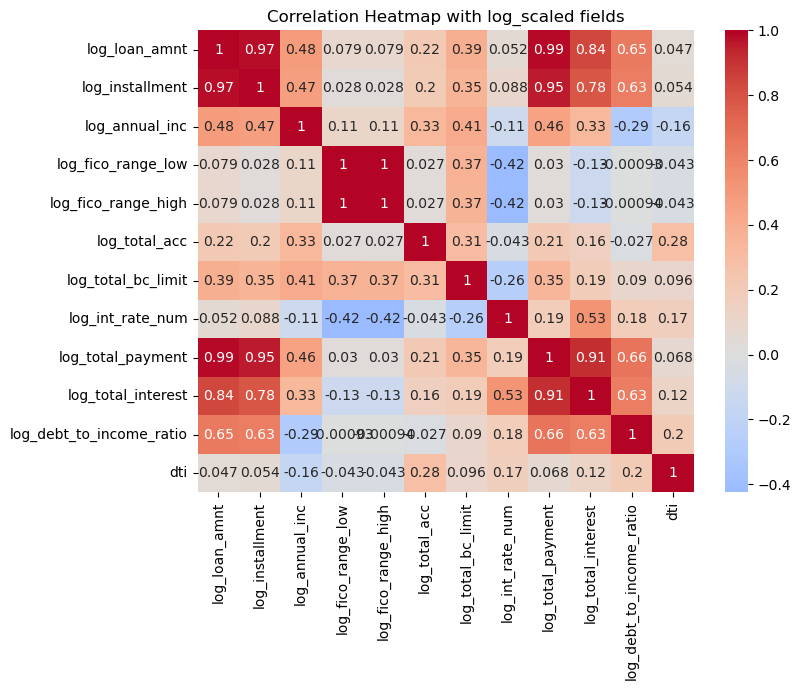


 Correlations matrix > 0.5 


log_loan_amnt  log_installment  log_annual_inc  \
log_loan_amnt                       NaN         0.972323             NaN   
log_installment                0.972323              NaN             NaN   
log_annual_inc                      NaN              NaN             NaN   
log_fico_range_low                  NaN              NaN             NaN   
log_fico_range_high                 NaN              NaN             NaN   
log_total_acc                       NaN              NaN             NaN   
log_total_bc_limit                  NaN              NaN             NaN   
log_int_rate_num                    NaN              NaN             NaN   
log_total_payment              0.988390         0.951302             NaN   
log_total_interest             0.841061         0.783812             NaN   
log_debt_to_income_ratio       0.646952         0.627106             NaN   
dti                                 NaN              NaN             NaN   

                          log_fico_range_low  log_fico_range_high  \
log_loan_amnt                            NaN                  NaN   
log_installment                          NaN                  NaN   
log_annual_inc                           NaN                  NaN   
log_fico_range_low                       NaN                  NaN   
log_fico_range_high                      NaN                  NaN   
log_total_acc                            NaN                  NaN   
log_total_bc_limit                       NaN                  NaN   
log_int_rate_num                         NaN                  NaN   
log_total_payment                        NaN                  NaN   
log_total_interest                       NaN                  NaN   
log_debt_to_income_ratio                 NaN                  NaN   
dti                                      NaN                  NaN   

                          log_total_acc  log_total_bc_limit  log_int_rate_num  \
log_loan_amnt                       NaN                 NaN               NaN   
log_installment                     NaN                 NaN               NaN   
log_annual_inc                      NaN                 NaN               NaN   
log_fico_range_low                  NaN                 NaN               NaN   
log_fico_range_high                 NaN                 NaN               NaN   
log_total_acc                       NaN                 NaN               NaN   
log_total_bc_limit                  NaN                 NaN               NaN   
log_int_rate_num                    NaN                 NaN               NaN   
log_total_payment                   NaN                 NaN               NaN   
log_total_interest                  NaN                 NaN           0.53041   
log_debt_to_income_ratio            NaN                 NaN               NaN   
dti                                 NaN                 NaN               NaN   

                          log_total_payment  log_total_interest  \
log_loan_amnt                      0.988390            0.841061   
log_installment                    0.951302            0.783812   
log_annual_inc                          NaN                 NaN   
log_fico_range_low                      NaN                 NaN   
log_fico_range_high                     NaN                 NaN   
log_total_acc                           NaN                 NaN   
log_total_bc_limit                      NaN                 NaN   
log_int_rate_num                        NaN            0.530410   
log_total_payment                       NaN            0.911057   
log_total_interest                 0.911057                 NaN   
log_debt_to_income_ratio           0.661769            0.627888   
dti                                     NaN                 NaN   

                          log_debt_to_income_ratio  dti  
log_loan_amnt                             0.646952  NaN  
log_installment                           0.627106  NaN  
log_annual_inc                         

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlations matrix > 0.5 \n')

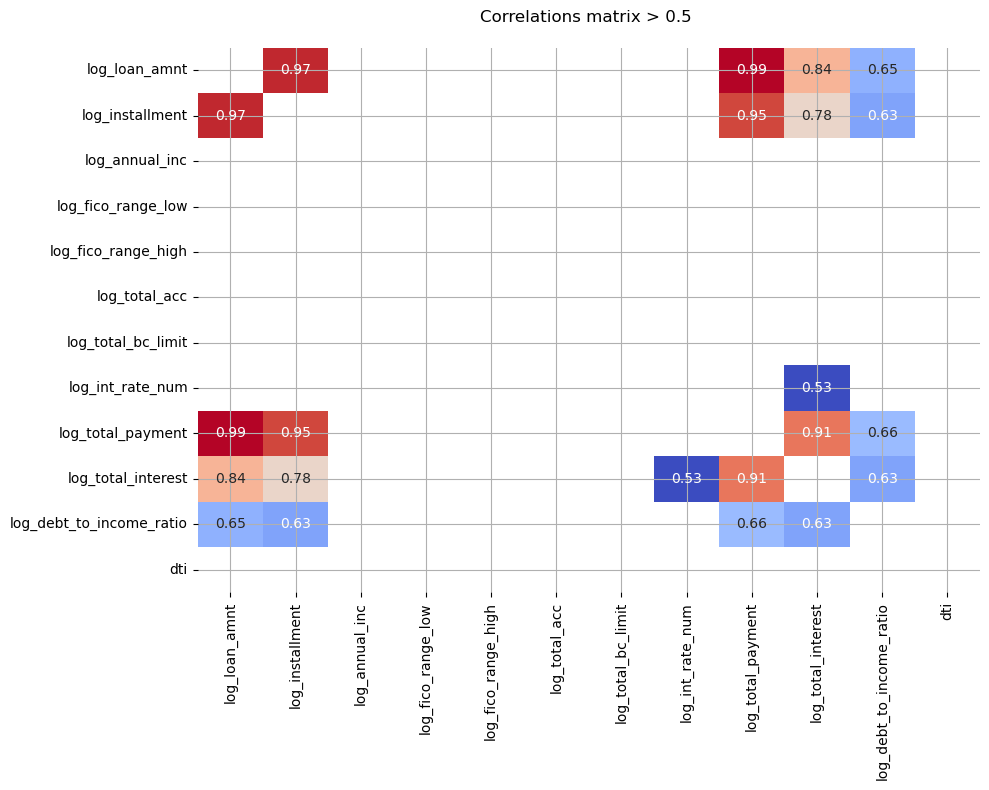

In [50]:
# Setting up our correlation matrix
df_corr = df_feat_sel_filtered_outliers_log[num_log_features + num_not_log_features].corr()

print("Correlation Matrix")
display(df_corr)

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap with log_scaled fields')
plt.show()


print("\n Correlations matrix > 0.5 ")
display(df_corr[ (df_corr.abs() >= .5) & (df_corr.abs() < .999) ])#.replace(1.000000 , np.nan))
plt.figure(figsize = [10,8])
sns.heatmap(df_corr[ (df_corr.abs() >= .5) & (df_corr.abs() < .999) ] , cmap="coolwarm", annot = True, cbar=False)
plt.title('Correlations matrix > 0.5 \n')
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()
plt.tight_layout()
plt.grid(True)
plt.show()

### Observation
- As expected, we have strong correlations between fields that were created with other fields in **1b. Feature Creation / Engineering**
- We also see a very strong correlation between'loan_amnt' and 'installments'.

---

3\. Build Predictive Model for Loan Applications Approvals
----------------------------------------

- A model to predict if a loan application will lead to a loan default or not.

--- 

## 3a\. Data Preparation for ML models

- Standarizing numerical values
    - We select StandardScaler over MinMaxScaler, due to our dataset containing values at different scales; also our data contains a small amount of outliers where StandardScaler is ideal as it is less prone to outliers compared to MinMaxScaler

- OneHotEncoding Categorical Variables

- Handle Class imbalance of variables that are underrepresented, such as the categorical variables

Table of Summary Statistics for our StandardScaler Dataframe


column          mean    median      mode       std  \
0             log_loan_amnt  1.224265e-15  0.072132 -0.284805  1.000006   
0           log_installment -6.775136e-16  0.032501 -0.309813  1.000006   
0            log_annual_inc  1.909159e-15 -0.050944 -0.352231  1.000006   
0        log_fico_range_low  2.487777e-15 -0.267956 -0.903331  1.000006   
0       log_fico_range_high  6.741274e-16 -0.268042 -0.903224  1.000006   
0             log_total_acc  7.878060e-16  0.053694 -0.225577  1.000006   
0        log_total_bc_limit -8.524707e-16  0.066436 -1.214205  1.000006   
0          log_int_rate_num -5.593416e-16 -0.087977 -0.983987  1.000006   
0         log_total_payment  1.132793e-15  0.111226 -0.473150  1.000006   
0        log_total_interest -9.208906e-16 -0.027265 -1.244898  1.000006   
0  log_debt_to_income_ratio -3.577286e-16 -0.086006  0.036425  1.000006   
0                       dti  3.075424e-16 -0.032860 -0.266358  1.000006   

                                                                                         perc_1-_25_50_75_95  \
0    [-1.2791158194185668, -0.6049115694688906, 0.07213220782385092, 0.7095785259699356, 1.5124257300679165]   
0    [-1.2623317383969967, -0.5697309973200917, 0.03250112896880826, 0.7141632025068579, 1.5083454414220037]   
0   [-1.2449586624268802, -0.7085769484645118, -0.05094425010797369, 0.6461779649954856, 1.7399534158116092]   
0     [-1.06513401081394, -0.7427293446957999, -0.26795638952522816, 0.5008861732618906, 1.9611538057042817]   
0      [-1.064960676121688, -0.742681505862327, -0.2680420341660345, 0.5007109694047698, 1.9612221756244055]   
0     [-1.4201673865367814, -0.6714595576961122, 0.05369372336492941, 0.7135785885477997, 1.523773966168833]   
0    [-1.2774518559957262, -0.6020647767975749, 0.06643631014160785, 0.6961461520319364, 1.5068037719700342]   
0   [-1.2000796117477097, -0.8024959131995943, -0.08797650726501766, 0.5912965038663691, 1.8669550788795461]   
0    [-1.3152099264169441, -0.6267861504479392, 0.11122623264123341, 0.7462336254109309, 1.4593052846001515]   
0  [-1.2711678654847318, -0.7215969757867402, -0.027265182768474235, 0.7646216791728364, 1.6061153563970119]   
0    [-1.2867533326425342, -0.777555491258806, -0.08600624751305777, 0.7241429143947228, 1.8170344672785093]   
0    [-1.325391646222196, -0.7537684020733635, -0.03285962318030448, 0.7480185585587259, 1.7062530593528624]   

   skewness_value  skewness_value_log  \
0       -0.653984                 NaN   
0       -0.579149                 NaN   
0        0.158458                 NaN   
0        1.014774                 NaN   
0        1.015593                 NaN   
0       -0.430218                 NaN   
0       -0.513514                 NaN   
0        0.688993                 NaN   
0       -0.563806                 NaN   
0       -0.080261                 NaN   
0        0.254575                 NaN   
0        0.071472                 NaN   

                                 skew_detail skew_log_detail  
0   Skewness < 0: Negative skew (left skew).                  
0   Skewness < 0: Negative skew (left skew).                  
0  Skewness > 0: Positive skew (right skew).                  
0  Skewness > 0: Positive skew (right skew).                  
0  Skewness > 0: Positive skew (right skew).                  
0   Skewness < 0: Negative skew (left skew).                  
0   Skewness < 0: Negative skew (left skew).                  
0  Skewness > 0: Positive skew (right skew).                  
0   Skewness < 0: Negative skew (left skew).                  
0   Skewness < 0: Negative skew (left skew).                  
0  Skewness > 0: Positive skew (right skew).                  
0  Skewness > 0: Positive skew (right skew).

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='log_loan_amnt', ylabel='Count'>

Text(0.5, 1.0, 'log_loan_amnt')

<Axes: >

<Axes: xlabel='log_loan_amnt', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : log_loan_amnt')

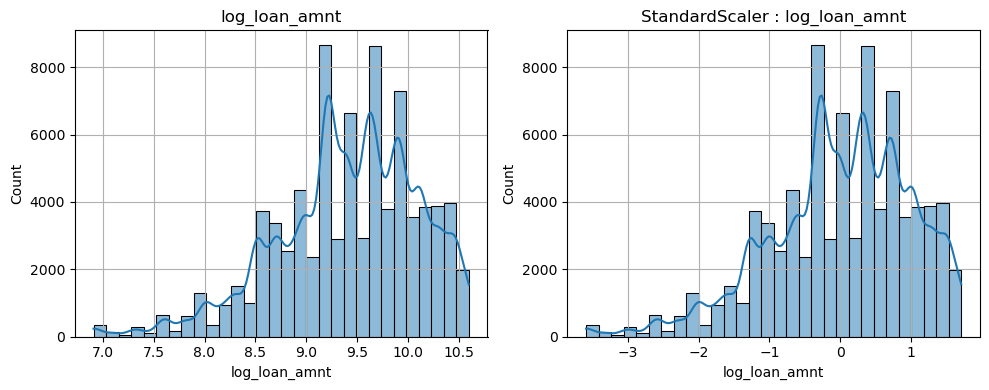

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='log_installment', ylabel='Count'>

Text(0.5, 1.0, 'log_installment')

<Axes: >

<Axes: xlabel='log_installment', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : log_installment')

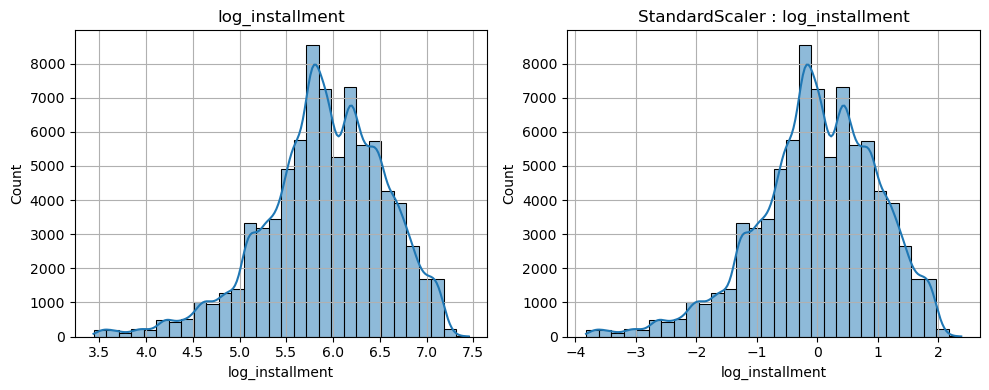

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='log_annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'log_annual_inc')

<Axes: >

<Axes: xlabel='log_annual_inc', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : log_annual_inc')

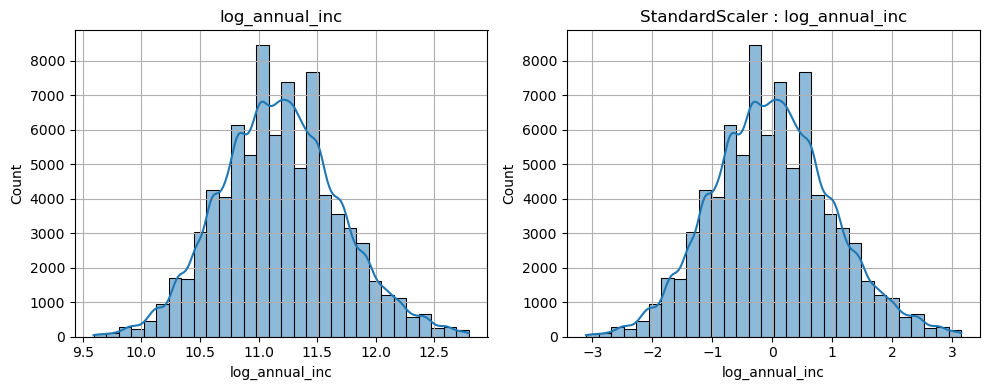

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='log_fico_range_low', ylabel='Count'>

Text(0.5, 1.0, 'log_fico_range_low')

<Axes: >

<Axes: xlabel='log_fico_range_low', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : log_fico_range_low')

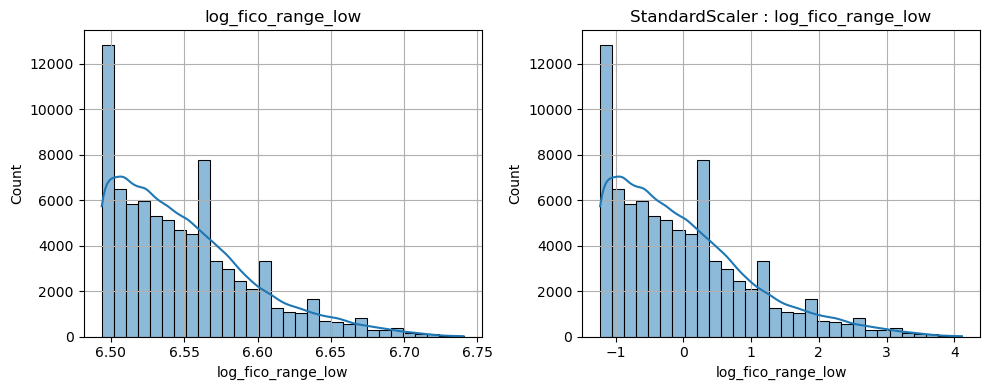

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='log_fico_range_high', ylabel='Count'>

Text(0.5, 1.0, 'log_fico_range_high')

<Axes: >

<Axes: xlabel='log_fico_range_high', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : log_fico_range_high')

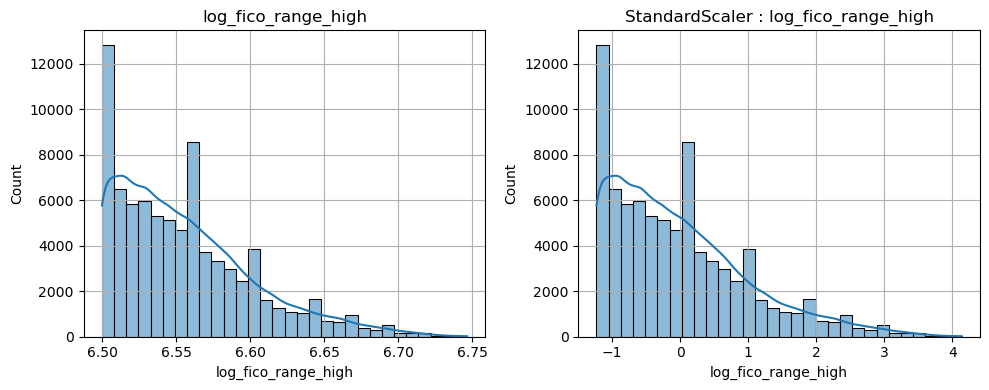

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='log_total_acc', ylabel='Count'>

Text(0.5, 1.0, 'log_total_acc')

<Axes: >

<Axes: xlabel='log_total_acc', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : log_total_acc')

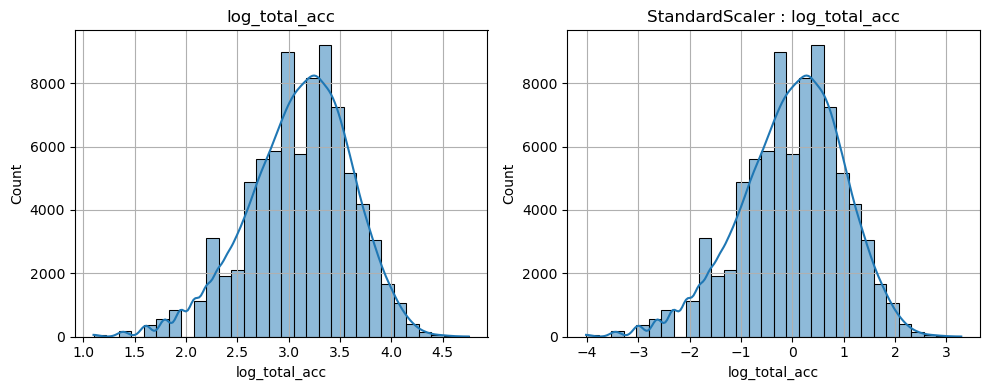

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='log_total_bc_limit', ylabel='Count'>

Text(0.5, 1.0, 'log_total_bc_limit')

<Axes: >

<Axes: xlabel='log_total_bc_limit', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : log_total_bc_limit')

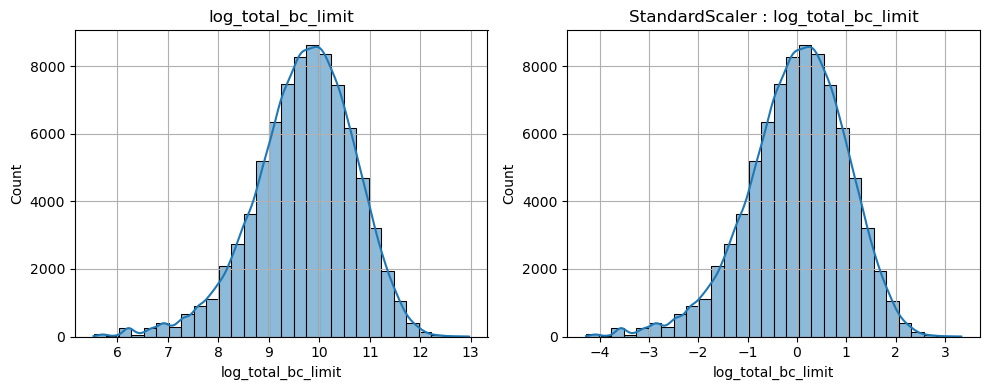

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='log_int_rate_num', ylabel='Count'>

Text(0.5, 1.0, 'log_int_rate_num')

<Axes: >

<Axes: xlabel='log_int_rate_num', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : log_int_rate_num')

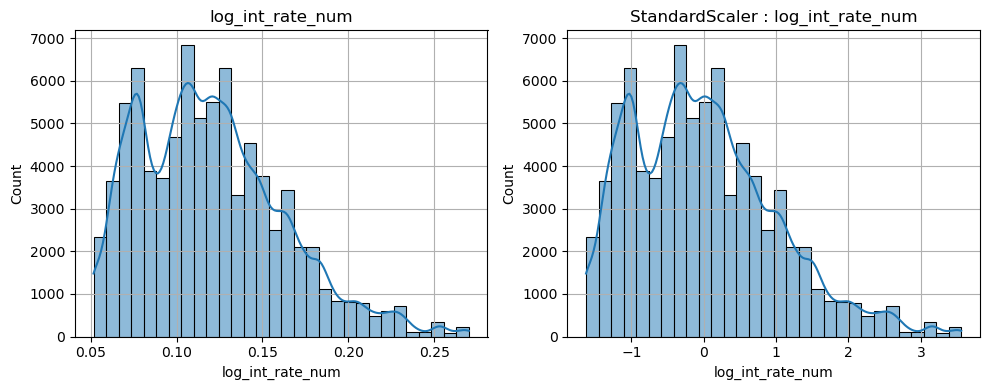

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='log_total_payment', ylabel='Count'>

Text(0.5, 1.0, 'log_total_payment')

<Axes: >

<Axes: xlabel='log_total_payment', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : log_total_payment')

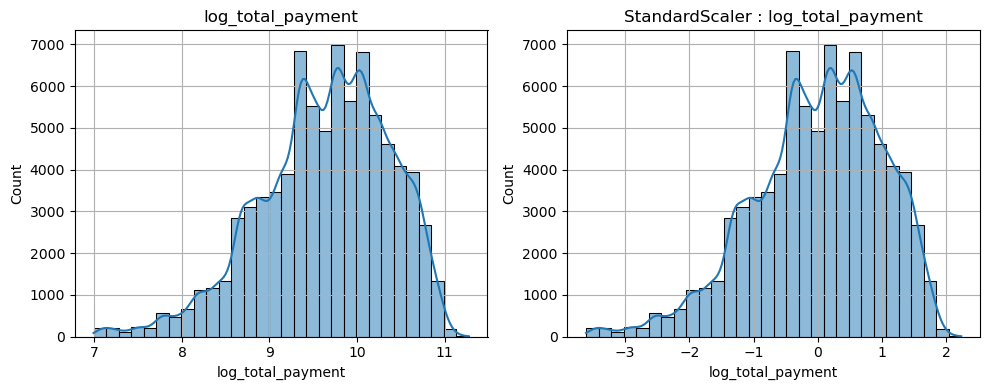

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='log_total_interest', ylabel='Count'>

Text(0.5, 1.0, 'log_total_interest')

<Axes: >

<Axes: xlabel='log_total_interest', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : log_total_interest')

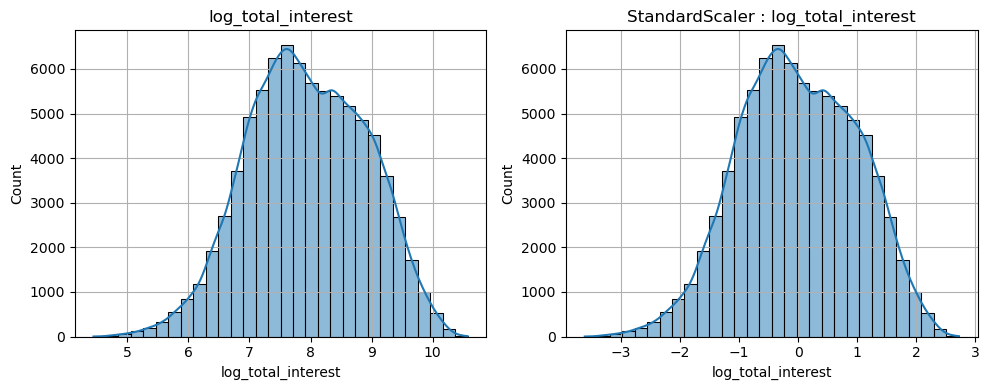

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='log_debt_to_income_ratio', ylabel='Count'>

Text(0.5, 1.0, 'log_debt_to_income_ratio')

<Axes: >

<Axes: xlabel='log_debt_to_income_ratio', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : log_debt_to_income_ratio')

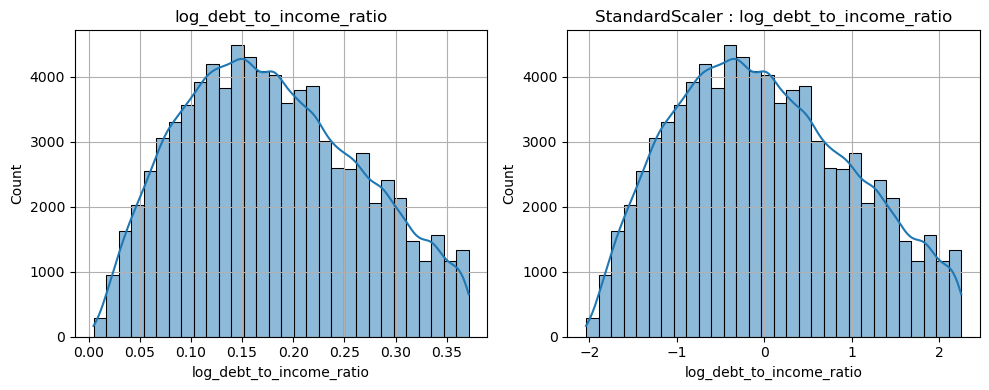

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: xlabel='dti', ylabel='Count'>

Text(0.5, 1.0, 'dti')

<Axes: >

<Axes: xlabel='dti', ylabel='Count'>

Text(0.5, 1.0, 'StandardScaler : dti')

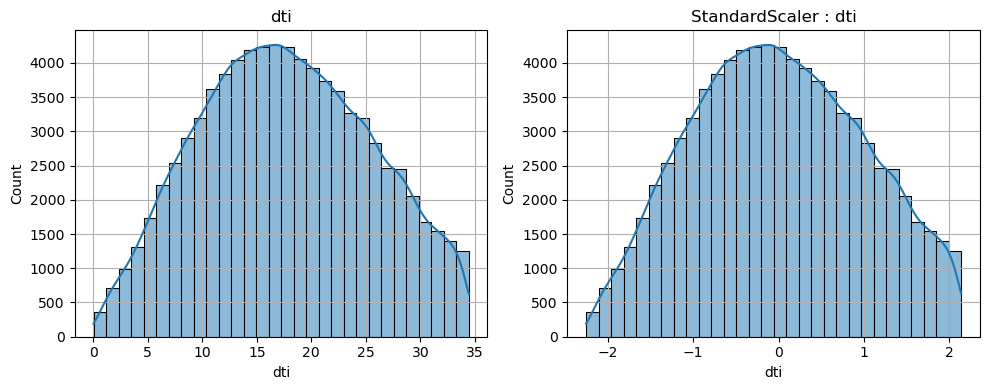

In [51]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()

# List of numerical features which includes those log-scaled and not-log-scaled
num_ml_feat = num_log_features + num_not_log_features

# DataFrame of numerical features
X_num = df_feat_sel_filtered_outliers_log[num_ml_feat]

# StandardScaling our numerical features
X_num_std = scaler.fit_transform(X_num)

# Creating a dataframe of our StandardScaler dataset
X_num_std = pd.DataFrame(X_num_std, columns=num_ml_feat)

# combining the summary statistics results into a dataFrame - 
df_list_std = []
for new_num_col in num_ml_feat:
    df_list_std.append(summary_statistics(X_num_std, new_num_col))

print("Table of Summary Statistics for our StandardScaler Dataframe")
display(pd.concat(df_list_std))

for new_num_col in num_ml_feat:
    # Plotting the distributions before standardization
    plt.figure(figsize=(10, 4))

    plt.subplot(1,2,1)
    sns.histplot(df_feat_sel_filtered_outliers_log[new_num_col], bins=30, kde=True)
    plt.title(f'{new_num_col}')
    plt.grid(True)

    plt.subplot(1,2,2)
    sns.histplot(X_num_std[new_num_col], bins=30, kde=True)
    plt.title(f'StandardScaler : {new_num_col}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


### Observation
- After StandardScaling our numerical features, we can see it has preserved its distribution shape.

---

- Next, include the categorical variables and target variable all into one dataframe
- Also, handle class imbalances via SMOTE

In [52]:
X_cat = df_feat_sel_filtered_outliers_log[cat_features]

# Encoding categorical data
# One-hot encoding
X_cat_ohe = pd.get_dummies(X_cat).astype(int).reset_index(drop=True)

# Create Daframe of our inpu variables with mixture of numerical and categorical variables
X = pd.concat([X_num_std, X_cat_ohe] , axis=1)

# target variable
y = df_feat_sel_filtered_outliers_log['loan_default'].reset_index(drop=True)

# Dataframe for our Machine Learning Modelling
df_for_ml = pd.concat([X, y] , axis=1)

# Handling Class imbalances
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_imbl , y_imbl = smote.fit_resample(X, y)

print("Sample of featured Engineered / transformed dataset ready for our ML  \n")

# Dataframe for our Machine Learning Modelling with handled class imbalances
df_for_ml_imbl = pd.concat([X_imbl,y_imbl] , axis=1)
display(df_for_ml_imbl)


Sample of featured Engineered / transformed dataset ready for our ML  



log_loan_amnt  log_installment  log_annual_inc  log_fico_range_low  \
0            0.971142         0.471784       -0.452484           -0.583311   
1           -1.279116        -1.258831       -0.522294           -1.065134   
2            0.197890        -0.202929       -0.788363            1.096873   
3           -1.599187        -1.579043       -0.871545            0.042867   
4           -0.756052        -0.621162       -1.520693           -0.583311   
...               ...              ...             ...                 ...   
143089      -0.820152        -0.869301       -0.865940            0.832158   
143090       0.971142         1.106717        1.206841           -0.720605   
143091       0.580834         0.128038        0.350652            0.453595   
143092       0.346808         0.265479       -0.427657           -0.549815   
143093      -1.928799        -1.831846       -1.514083            1.193219   

        log_fico_range_high  log_total_acc  log_total_bc_limit  \
0                 -0.583315       0.220306           -0.237445   
1                 -1.064961      -1.610615           -0.505654   
2                  1.096733       0.138736            0.575732   
3                  0.042727      -2.056498           -0.772835   
4                 -0.583315       0.948931           -0.946019   
...                     ...            ...                 ...   
143089             0.832004       0.808041           -0.513077   
143090            -0.720554       0.935368            1.100174   
143091             0.453422       0.731967            0.229940   
143092            -0.549828      -0.598776           -1.406107   
143093             1.193096      -0.973176           -0.251142   

        log_int_rate_num  log_total_payment  log_total_interest  \
0              -0.772019           0.914034            0.787194   
1              -0.484424          -1.313868           -1.234827   
2               0.172692           0.317507            0.671219   
3              -0.270458          -1.598155           -1.366426   
4               0.254089          -0.748725           -0.544755   
...                  ...                ...                 ...   
143089         -1.477826          -0.968521           -1.524847   
143090         -0.973752           0.778789            0.125088   
143091         -0.314342           0.610149            0.724971   
143092          2.054680           0.731692            1.383083   
143093          0.678949          -1.823021           -1.239109   

        log_debt_to_income_ratio       dti  term__36_months  term__60_months  \
0                       2.013670  0.975137                0                1   
1                      -1.078047 -1.335599                1                0   
2                       0.897403  0.843714                0                1   
3                      -1.119922 -0.781839                1                0   
4                       0.212424 -0.906882                1                0   
...                          ...       ...              ...              ...   
143089                 -0.466042 -0.968229                1                0   
143090                 -0.151305  0.298473                1                0   
143091                  0.162861 -1.220383                0                1   
143092                  0.691951  0.243305                0                1   
143093                 -1.011509  0.447278                1                0   

        grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0             0        1        0        0        0        0        0   
1             0        1        0        0        0        0        0   
2             0        0        1        0        0        0        0   
3             0        1        0        0        0        0        0   
4             0        0        1        0        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
1

### Data Splitting preparation for our model
To ensure that a model generalizes well given unseen data

In [53]:
# Import scikit-learn train_test_split
from sklearn.model_selection import train_test_split, cross_val_score

# To Evaluate our models
from model_evaluations import model_evaluation_report_classification

# Split the data into training and testing sets by 80/20
X_train, X_test, y_train, y_test = train_test_split(X_imbl, y_imbl, test_size=0.2, random_state=42)

for dframe in [X_train, X_test, y_train, y_test]:
    print(f"Shape: {dframe.shape}")

Shape: (114475, 53)
Shape: (28619, 53)
Shape: (114475,)
Shape: (28619,)


## 3b\. Base Machine Learning Classification Model
For our Classification model to predict loan_defaults, our Base Model, will be the simplistic LogisticRegression 

LogisticRegression()


 5-Fold CV Scores Base = [0.63901604 0.86128097 0.86149062 0.86662707 0.86732127]

 Average - 5-Fold CV Scores Base = 0.819147191175557

 Median - 5-Fold CV Scores Base = 0.8614906181208288

  ... Evaluation metrics for Legacy LogisticRegression Base Model ... 
Accuracy: 0.8218665921241134
Precision: 0.8974491110538521
Recall (Sensitivity): 0.7280011147495297
F1-Score: 0.8038929066010155
ROC-AUC: 0.9032475148038996
Confusion Matrix:
[[13072  1194]
 [ 3904 10449]]


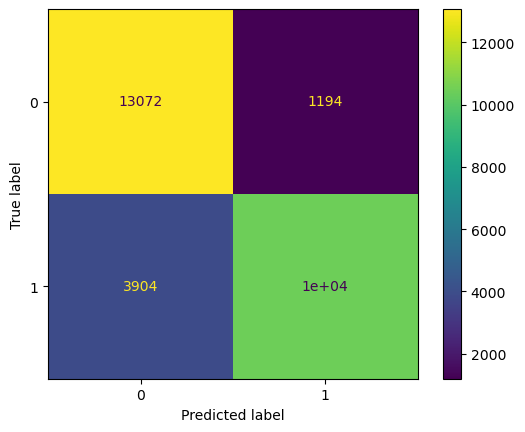


  ... Confusion Matrix for reference  ... 


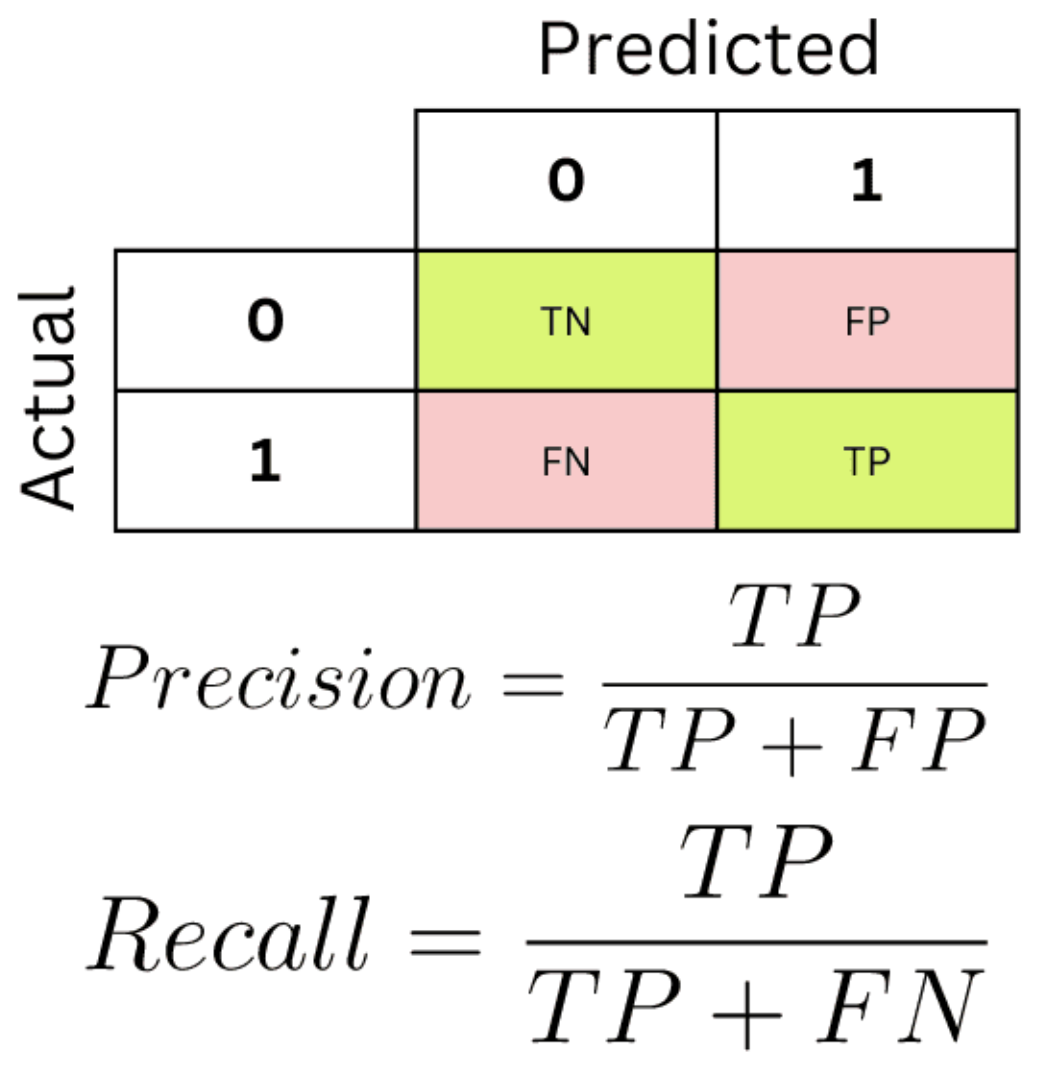

In [54]:
# importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Legacy model
model_log_reg = LogisticRegression()

# Fit/Train Legacy model
model_log_reg.fit(X_train, y_train)

# Predictions & Probabilities 
# (will be used in section 6. Model Evaluations & Comparisons)
y_pred = model_log_reg.predict(X_test)
y_prob = model_log_reg.predict_proba(X_test)[:,1]

# Performing 5-Fold Cross-Validation
cv_score_base = cross_val_score(model_log_reg, X_imbl, y_imbl, cv=5, scoring='accuracy')

print(f"\n 5-Fold CV Scores Base = {cv_score_base}")
print(f"\n Average - 5-Fold CV Scores Base = {cv_score_base.mean()}")
print(f"\n Median - 5-Fold CV Scores Base = {np.median(cv_score_base)}")


print("\n  ... Evaluation metrics for Legacy LogisticRegression Base Model ... ")
model_evaluation_report_classification(X_test, y_test, y_pred, y_prob)

from IPython.display import Image
print("\n  ... Confusion Matrix for reference  ... ")
Image(filename=f"{path_python_material}/images/confusion_matrix_v2.png", width=500,)

### Observation

- **TN** = predicted[0], Actual[0] = loan_default False when it is actually False
- **TP** = predicted[1], Actual[1] = loan_default True when it is actually True
- **FP** = predicted[1], Actual[0] = loan default True when it is actually False
- **FN** = predicted[0], Actual[1] = loan default False when it is actually True

    - After 5-Fold cross validation, we achieve a ~82% accuracy for our Base model
    - Precision: ~90%
    - Recall (Sensitivity): ~ 73%
    - F1-Score: ~80%
    - ROC-AUC: ~90% 

- Hence, the Base model will distinguish between the Positive & Negative Classes i.e., loan_defaults [True, False] 90% of the time.

## 3c\. Challenger Machine Learning Classification Model
| Algorithm                                        | Type                               | Best For                                               | Advantages                                                     | Disadvantages                                           |  
| ------------------------------------------------ | ---------------------------------- | ------------------------------------------------------ | -------------------------------------------------------------- | ------------------------------------------------------- | 
| Gradient Boosting (XGBoost)                      | Both                               | Accuracy, complex datasets                             | High accuracy, handles mixed data types                        | Requires careful tuning, can overfit                    |                  

- For this case, I will be selecting **XGBoost**, because it has the advantages of handling mix datatypes, since our data has categorical features. Also, it is known for being accurate for complex datasets.

- I will then perform Recursive Feature Elimination (RFE), which is a a feature selection method in machine learning that iteratively removes features based on their importance, aiming to identify the most relevant features for a model. 
- The goal of RFE is to find the optimal subset of features that maximizes model performance or reduces overfitting. 
    - **Advantages:**
        - Reduces Overfitting: By focusing on the most important features, RFE can help prevent overfitting. 
        - Improves Model Performance: By selecting the most relevant features, RFE can lead to better model performance. 
        - Simplifies Models: By reducing the number of features, RFE can make models easier to interpret and understand.  
        
- In our case, we are going to remove 10 features fromt he total number of exsting features preprocessed within our dataset/

In [55]:
# Importing XGBoost
from xgboost import XGBClassifier

# Model
model_xgb = XGBClassifier()

# Apply Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

rfe_xgb = RFE(estimator=model_xgb,
          
          # To select the number of existing features minus 10 features 
          n_features_to_select= (len(X_imbl.columns) - 10),

          # step=1 means remove one feature at a time
          step=1, 

          verbose = 3
          
          )

# Fit RFE to the training data
rfe_xgb.fit(X_train, y_train)

Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.


RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, feature_weights=None,
                            gamma=None, grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=None,
                            num_parallel_tree=None, ...),
    n_features_to_select=43, verbose=3)

### Observation
- We can see RFE iterated from 53 to a selected 43 features

In [56]:
## Feature Selecting using Recursive Feature Elimination (RFE) for New model_2
selected_features = X_train.columns[rfe_xgb.support_] # rfe.support_ represents the mask of selected features (i.e. boolean indicator) 

print("Selected Features by RFE:")
print(f"Number of Selected Features {len(selected_features.values)} ")
print(f"\n {selected_features.values}")

Selected Features by RFE:
Number of Selected Features 43 

 ['log_loan_amnt' 'log_fico_range_low' 'log_total_acc' 'log_int_rate_num'
 'log_debt_to_income_ratio' 'term__36_months' 'term__60_months' 'grade_A'
 'grade_B' 'grade_C' 'grade_D' 'grade_E' 'grade_F' 'emp_length_0_year'
 'emp_length_10plus_years' 'emp_length_1_year' 'emp_length_2_years'
 'emp_length_3_years' 'emp_length_4_years' 'emp_length_5_years'
 'emp_length_6_years' 'emp_length_7_years' 'emp_length_8_years'
 'emp_length_9_years' 'home_ownership_ANY' 'home_ownership_MORTGAGE'
 'home_ownership_OWN' 'home_ownership_RENT' 'purpose_car'
 'purpose_credit_card' 'purpose_debt_consolidation'
 'purpose_home_improvement' 'purpose_house' 'purpose_major_purchase'
 'purpose_medical' 'purpose_moving' 'purpose_other'
 'purpose_renewable_energy' 'purpose_small_business' 'purpose_vacation'
 'purpose_wedding' 'application_type_Individual'
 'application_type_Joint_App']


### Perform Cross validation on our XGB model with selected features


 5-Fold CV Scores XGB = [0.63894615 0.965163   0.95768545 0.96292673 0.96268083]

 Average - 5-Fold CV Scores XGB = 0.8974804338434625

 Median - 5-Fold CV Scores XGB = 0.9626808302466979

  ... Evaluation metrics for XGB Selected Feature Model ... 
Accuracy: 0.896677032740487
Precision: 0.9600355239786856
Recall (Sensitivity): 0.8284679161150978
F1-Score: 0.889412468678709
ROC-AUC: 0.9495283666335875
Confusion Matrix:
[[13771   495]
 [ 2462 11891]]


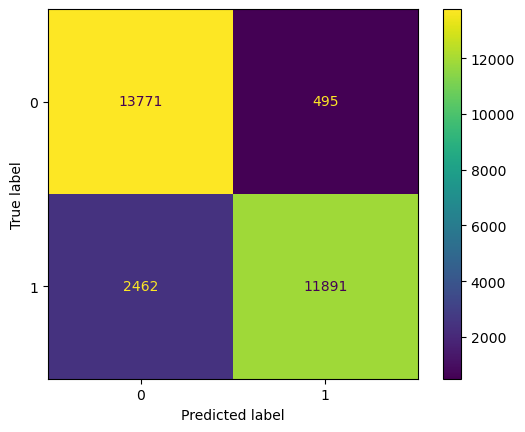


  ... Confusion Matrix for reference  ... 


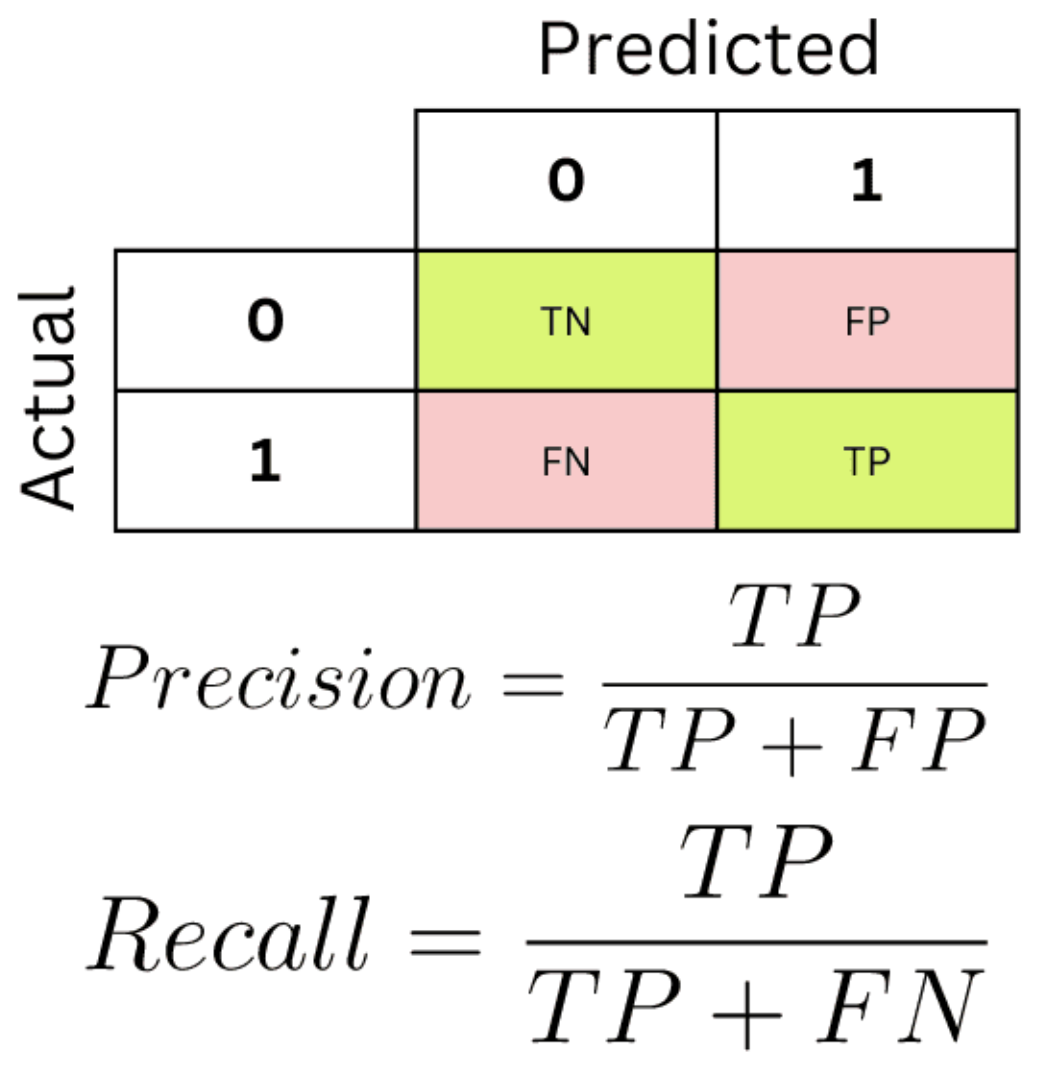

In [57]:
# Predictions & Probabilities 
# (will be used in section 6. Model Evaluations & Comparisons)
y_pred_xgb = rfe_xgb.predict(X_test)
y_prob_xgb = rfe_xgb.predict_proba(X_test)[:,1]

# Performing 5-Fold Cross-Validation with our selected features
cv_score_xgb = cross_val_score(rfe_xgb, X_imbl[selected_features], y_imbl, cv=5, scoring='accuracy')

print(f"\n 5-Fold CV Scores XGB = {cv_score_xgb}")
print(f"\n Average - 5-Fold CV Scores XGB = {cv_score_xgb.mean()}")
print(f"\n Median - 5-Fold CV Scores XGB = {np.median(cv_score_xgb)}")

print("\n  ... Evaluation metrics for XGB Selected Feature Model ... ")
model_evaluation_report_classification(X_test, y_test, y_pred_xgb, y_prob_xgb)

from IPython.display import Image
print("\n  ... Confusion Matrix for reference  ... ")
Image(filename=f"{path_python_material}/images/confusion_matrix_v2.png", width=500,)

### Observation

- **TN** = predicted[0], Actual[0] = loan_default False when it is actually False
- **TP** = predicted[1], Actual[1] = loan_default True when it is actually True
- **FP** = predicted[1], Actual[0] = loan default True when it is actually False
- **FN** = predicted[0], Actual[1] = loan default False when it is actually True

    - After 5-Fold cross validation, we achieve a ~96% accuracy for our XGB_feature_selected (XGB_RFE) model
    - Accuracy: ~ 90%
    - Precision: ~ 97% 
    - Recall (Sensitivity): ~ 83%
    - F1-Score: ~89%
    - ROC-AUC: ~95%

- Hence, the XGB_RFE model will distinguish between the Positive & Negative Classes i.e., loan_defaults [True, False] 95% of the time.
- This seems ideal, however XGB model is highly accurate and is prone to overfitting, hence we will investigate and improve the model

### Hyperparameter fitting & Check Overfitting
Here, we are going to use GridSearchCV to find the best parameters for our model, and to ensure our model is not overfitting

 - **ROC-AUC**: Area under the Receiver Operating Characteristic curve, a measure of how well the model can distinguish between classes.

 - Hence, we want to model to perform well enough to distinguish between the loan defaults [True, False]

In [59]:
import pprint

# Import GridSearch and metrics to evaluate our model_2
from sklearn.model_selection import GridSearchCV
# Parameters for XGBoost to iterate on
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 10, 50],
    "learning_rate": [0.01, 0.1, 0.3],
    "enable_categorical" : [True, False],
    "random_state" : [42]
}

# Grid_search model to perform 5-Folds CV to find the best parameters based on ROC_AUC score 
grid_search = GridSearchCV(
    model_xgb,
    param_grid=params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=3
    )

# Fitting the grid_search
grid_search.fit(X_train[selected_features], y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'enable_categorical': [True, False],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 10, 50],
                         'n_estimators': [50, 100, 200], 'random_state': [42]},
             scoring='roc_auc', verbose=3)

In [60]:
# Get the best parameters
best_params = grid_search.best_params_
pprint.pp(f'\n Best parameters: {best_params}')

('\n'
 " Best parameters: {'enable_categorical': True, 'learning_rate': 0.1, "
 "'max_depth': 50, 'n_estimators': 100, 'random_state': 42}")


### Check Overfitting
#### Finetune parameters at point before it begins to overfit.
- We will be analysing on the 'max_depth' parameter, 

- Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

- our GridSearchCV gave a max_depth = 50, but we will iterate from 2 -> 80, intervals of 2, until we visually see at which depth the model begins to overfit based on it Train and Test dataset

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=26,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=32,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=38,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=44,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=56,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=62,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=68,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=74,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'XGB Depth')

Text(0, 0.5, 'ROC AUC Score')

Text(0.5, 1.0, 'XGB Depth vs. ROC AUC Score')

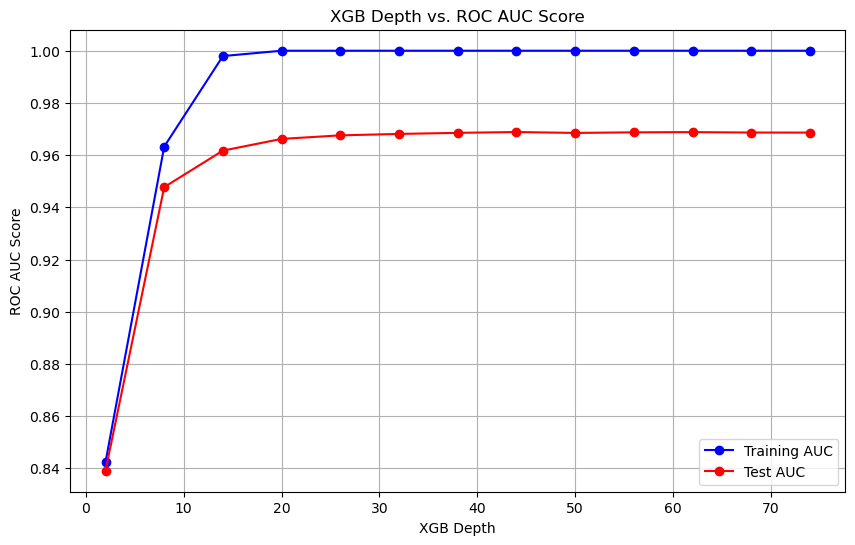

In [61]:
# check overfitting
from sklearn.metrics import roc_auc_score

# List to store AUC values
train_auc = []
test_auc = []

# Range of depths to evaluate
depth_range = np.arange(2, 80, 6)

# Loop over each depth
for depth in depth_range:
    # Initialize Decision Tree with the current max depth
    xgb = XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=depth,
    learning_rate=best_params['learning_rate'],
    enable_categorical = best_params['enable_categorical'],
    random_state=best_params['random_state']
    )

    
    # Fit the model on training data
    xgb.fit(X_train[selected_features], y_train, verbose=False)
    
    # Predict probabilities for the ROC AUC calculation
    y_train_pred_prob_2 = xgb.predict_proba(X_train[selected_features])[:, 1]
    y_test_pred_prob_2 = xgb.predict_proba(X_test[selected_features])[:, 1]
    
    # Calculate ROC AUC for both training and test sets
    train_auc.append(roc_auc_score(y_train, y_train_pred_prob_2))
    test_auc.append(roc_auc_score(y_test, y_test_pred_prob_2))

# Plotting the ROC AUC scores for training and validation sets
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_auc, label='Training AUC', marker='o', color='blue')
plt.plot(depth_range, test_auc, label='Test AUC', marker='o', color='red')

# Adding labels and title
plt.xlabel('XGB Depth')
plt.ylabel('ROC AUC Score')
plt.title('XGB Depth vs. ROC AUC Score')
plt.legend()
plt.grid(True)
plt.show()

### Observation
- We can see model begins to overfit on the training dataset at max_depth > 10, hence we will set this parameter at to a modest 10


 5-Fold CV Scores Best_XGB = [0.64020406 0.955554   0.95398162 0.95974702 0.95848767]

 Average - 5-Fold CV Scores Best_XGB = 0.8935948739485315

 Median - 5-Fold CV Scores Best_XGB = 0.9555540025856948


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


  ... Evaluation metrics for Best_XGB Selected Feature Model ... 
Accuracy: 0.896677032740487
Precision: 0.9600355239786856
Recall (Sensitivity): 0.8284679161150978
F1-Score: 0.889412468678709
ROC-AUC: 0.9495283666335875
Confusion Matrix:
[[13771   495]
 [ 2462 11891]]


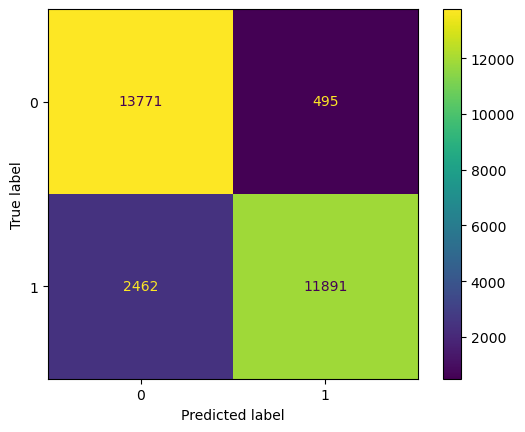


  ... Confusion Matrix for reference  ... 


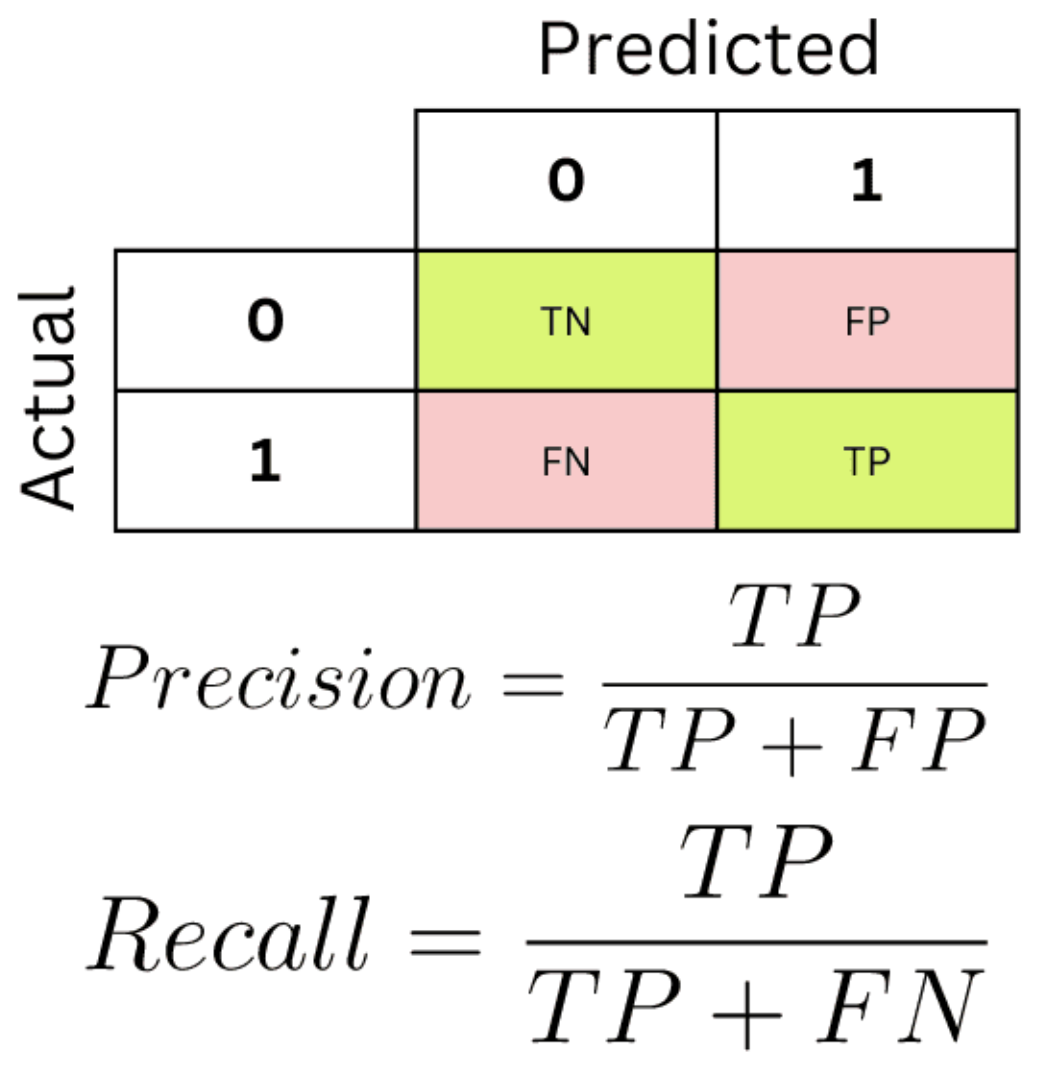

In [62]:
# Specifying our New model, with selected features and does NOT overfit. 
# New 'best' Model_2 with best parameters
best_model_xgb = XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth = 10,
    learning_rate=best_params['learning_rate'],
    enable_categorical = best_params['enable_categorical'],
    random_state=best_params['random_state']
)

# Performing 5-Fold Cross-Validation
cv_score_best_xgb = cross_val_score(best_model_xgb, X_imbl[selected_features], y_imbl, cv=5, scoring='accuracy')

print(f"\n 5-Fold CV Scores Best_XGB = {cv_score_best_xgb}")
print(f"\n Average - 5-Fold CV Scores Best_XGB = {cv_score_best_xgb.mean()}")
print(f"\n Median - 5-Fold CV Scores Best_XGB = {np.median(cv_score_best_xgb)}")

# Fit the 'best' model_2 on the training data
best_model_xgb.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred_best_xgb = best_model_xgb.predict(X_test[selected_features])
y_prob_best_xgb = best_model_xgb.predict_proba(X_test[selected_features])[:,1]

print("\n  ... Evaluation metrics for Best_XGB Selected Feature Model ... ")
model_evaluation_report_classification(X_test, y_test, y_pred_xgb, y_prob_xgb)

from IPython.display import Image
print("\n  ... Confusion Matrix for reference  ... ")
Image(filename=f"{path_python_material}/images/confusion_matrix_v2.png", width=500,)

### Observation

- **TN** = predicted[0], Actual[0] = loan_default False when it is actually False
- **TP** = predicted[1], Actual[1] = loan_default True when it is actually True
- **FP** = predicted[1], Actual[0] = loan default True when it is actually False
- **FN** = predicted[0], Actual[1] = loan default False when it is actually True

    - After 5-Fold cross validation, we achieve a ~95% accuracy for our XGB_feature_selected (XGB_RFE) model
    - Accuracy: ~90%
    - Precision: ~96%
    - Recall (Sensitivity): ~83%
    - F1-Score: ~89%
    - ROC-AUC: ~95%

- Hence, the Best_XGB RFE model will distinguish between the Positive & Negative Classes i.e., loan_defaults [True, False] 95% of the time. This also includes with the inspection of finetuning parameter to avoid overfitting.


---

4\. Model Evaluations & Comparisons
----------------------------------------

<Figure size 640x480 with 0 Axes>

(-0.01, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

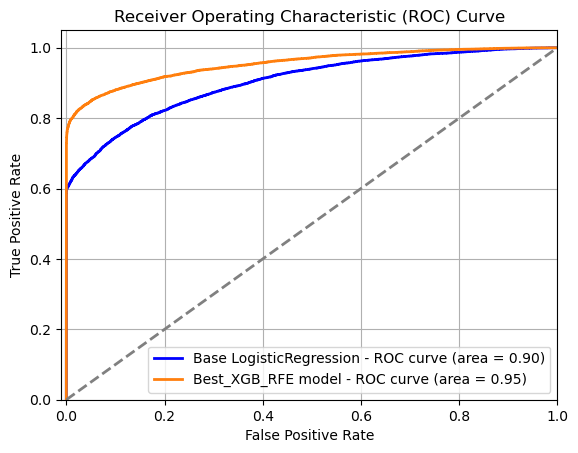

LogisticRegression model - ROC AUC Score: 0.90
Best_XGB_RFE model - ROC AUC Score: 0.95


In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Compute ROC curve and ROC AUC

# - Base LogisticRegression
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# - Best_XGB_RFE model
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_prob_best_xgb)
roc_auc_2 = auc(fpr_2, tpr_2)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Base LogisticRegression - ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_2, tpr_2, color='#ff7f0e', lw=2, label=f'Best_XGB_RFE model - ROC curve (area = {roc_auc_2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random prediction)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Additional stats
print(f'LogisticRegression model - ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')

# Additional stats
print(f'Best_XGB_RFE model - ROC AUC Score: {roc_auc_score(y_test, y_prob_best_xgb):.2f}')

### Observation
- We see the Best_XGB_RFE model is the champion model with a 4% better in distinguishing between loan_deaults [True, False]. It also uses less features than the Base LogisticRegression model, and has been finetuned to not overfit when comparing on its performance on the train & test data.

- However, The Base LogisticRegression model does perform pretty well, and includes all the features we set up relevant to predicting loan_defaults.

- Hence, we will save both models to use for Deployment within our front-end Application.

---

5\. Save Models for Deployment
----------------------------------------

We will save two versions of our models, a .pkl and .joblib file

In [67]:
import pickle
import joblib
from datetime import datetime

st = datetime.now().strftime('%Y%m%d') ## String on DateTime in format YYYYMMDD_HHMM

# Dictionary of trained models
model_dict = {

    'base_logistic_regression' : model_log_reg,

    'best_xgb_rfe' : best_model_xgb
}

for model_name, model in model_dict.items():

    os.makedirs(os.path.join(f'{path_python_material}/capstone_project' , f'{st}_models') , exist_ok=True)

    path_to_save_model = os.path.join(f'{path_python_material}/capstone_project/{st}_models' , f'{model_name}')


    # Save using pickle
    with open(path_to_save_model+'.pkl', 'wb') as file:
        pickle.dump(model, file)

    # Save using joblib
    joblib.dump(model, path_to_save_model +'.joblib')



['../capstone_project/20250403_models\\base_logistic_regression.joblib']

['../capstone_project/20250403_models\\best_xgb_rfe.joblib']

In [88]:
# Check to ensure we can load our saved models

base_log_reg_model_file = os.path.join(f'{path_python_material}/capstone_project/{st}_models' , f'best_xgb_rfe')

# Load using pickle
with open(base_log_reg_model_file + '.pkl', 'rb') as model_file:
    loaded_model_pkl = pickle.load(model_file)

# Load using joblib
loaded_model_joblib = joblib.load(base_log_reg_model_file + '.joblib')

In [ ]:
loaded_model_pkl.feature_importances_


pd.DataFrame(
    loaded_model_pkl.feature_importances_[0], 
             columns=loaded_model_pkl.feature_names_in_[0]
             )

array([0.00281585, 0.0221485 , 0.00370593, 0.01404072, 0.00272908,
       0.00294654, 0.00430989, 0.0578675 , 0.0275396 , 0.02799909,
       0.0150192 , 0.01134419, 0.0094265 , 0.03749641, 0.01743156,
       0.05828765, 0.04497844, 0.04133253, 0.05607895, 0.03979965,
       0.04534963, 0.02846291, 0.02876837, 0.02721573, 0.01647276,
       0.00614945, 0.01061042, 0.02285195, 0.03950976, 0.00680502,
       0.00601362, 0.02149395, 0.02420251, 0.02693407, 0.02507985,
       0.02176427, 0.02036768, 0.        , 0.02520967, 0.02312691,
       0.00806752, 0.01654187, 0.05170429], dtype=float32)

ValueError: DataFrame constructor not properly called!

In [ ]:
features_for_log_reg_model = pd.DataFrame({
    'log_loan_amnt': 0 , 
    'log_installment': 0 , 
    'log_annual_inc': 0 ,
       'log_fico_range_low': 0 ,
       'log_fico_range_high': 0 , 
       'log_total_acc': 0 ,
       'log_total_bc_limit': 0 , 
       'log_int_rate_num': 0 , 
       'log_total_payment': 0 ,
       'log_total_interest': 0 , 
       'log_debt_to_income_ratio': 0 ,

        'dti': 0 ,

       'term_ 36 months': 0 , 
       'term_ 60 months': 0 , 
       'grade_A': 0 , 
       'grade_B': 0 , 
       'grade_C': 0 ,
       'grade_D': 0 , 
       'grade_E': 0 , 
       'grade_F': 0 , 
       'grade_G': 0 , 
       'emp_length_0 year': 0 ,
       'emp_length_1 year': 0 ,
        'emp_length_10plus years': 0 , 
        'emp_length_2 years': 0 ,
       'emp_length_3 years': 0 , 
       'emp_length_4 years': 0 , 
       'emp_length_5 years' : 0 ,
       'emp_length_6 years' : 0 , 
       'emp_length_7 years' : 0 , 
       'emp_length_8 years' : 0 ,
       'emp_length_9 years' : 0 ,
       'home_ownership_ANY' : 0 ,
       'home_ownership_MORTGAGE' : 0 ,
       'home_ownership_NONE' : 0 ,
       'home_ownership_OTHER' : 0 ,
       'home_ownership_OWN' : 0 ,
       'home_ownership_RENT' : 0 , 
       'purpose_car' : 0 ,
       'purpose_credit_card' : 0 ,
       'purpose_debt_consolidation' : 0 , 
       'purpose_home_improvement' : 0 ,
       'purpose_house' : 0 ,
       'purpose_major_purchase' : 0 ,
       'purpose_medical' : 0 ,
       'purpose_moving' : 0 ,
       'purpose_other' : 0 , 
       'purpose_renewable_energy' : 0 ,
       'purpose_small_business' : 0 , 
       'purpose_vacation' : 0 ,
       'purpose_wedding' : 0 ,
       'application_type_Individual' : 0 , 
       'application_type_Joint App' : 0

}, 

index=[0]

)


display(features_for_log_reg_model)

predict_loan_default = loaded_model_joblib.predict(features_for_log_reg_model)

predict_loan_default_prob_0 = loaded_model_joblib.predict_proba(features_for_log_reg_model)[:,0][0]
predict_loan_default_prob_1 = loaded_model_joblib.predict_proba(features_for_log_reg_model)[:,1][0]

print(f' Loan_Default = {predict_loan_default[0]}')
print(f'With probability of False = {predict_loan_default_prob_0}')
print(f'With probability of True = {predict_loan_default_prob_1}')

log_loan_amnt  log_installment  log_annual_inc  log_fico_range_low  \
0              0                0               0                   0   

   log_fico_range_high  log_total_acc  log_total_bc_limit  log_int_rate_num  \
0                    0              0                   0                 0   

   log_total_payment  log_total_interest  log_debt_to_income_ratio  dti  \
0                  0                   0                         0    0   

   term_ 36 months  term_ 60 months  grade_A  grade_B  grade_C  grade_D  \
0                0                0        0        0        0        0   

   grade_E  grade_F  grade_G  emp_length_0 year  emp_length_1 year  \
0        0        0        0                  0                  0   

   emp_length_10plus years  emp_length_2 years  emp_length_3 years  \
0                        0                   0                   0   

   emp_length_4 years  emp_length_5 years  emp_length_6 years  \
0                   0                   0                   0   

   emp_length_7 years  emp_length_8 years  emp_length_9 years  \
0                   0                   0                   0   

   home_ownership_ANY  home_ownership_MORTGAGE  home_ownership_NONE  \
0                   0                        0                    0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  purpose_car  \
0                     0                   0                    0            0   

   purpose_credit_card  purpose_debt_consolidation  purpose_home_improvement  \
0                    0                           0                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0              0                       0                0               0   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0              0                         0                       0   

   purpose_vacation  purpose_wedding  application_type_Individual  \
0                 0                0                            0   

   application_type_Joint App  
0                           0

 Loan_Default = True
With probability of False = 1.2878587085651816e-14
With probability of True = 0.9999999999999871


In [ ]:
predict_loan_default = loaded_model_pkl.predict(features_for_log_reg_model)

predict_loan_default_prob_0 = loaded_model_pkl.predict_proba(features_for_log_reg_model)[:,0][0]
predict_loan_default_prob_1 = loaded_model_pkl.predict_proba(features_for_log_reg_model)[:,1][0]

print(f' Loan_Default = {predict_loan_default[0]}')
print(f'With probability of False = {predict_loan_default_prob_0}')
print(f'With probability of True = {predict_loan_default_prob_1}')

 Loan_Default = True
With probability of False = 1.2878587085651816e-14
With probability of True = 0.9999999999999871


---

**Insights & Conclusions**
----------------------------------------

## Insights
We will be using shapash to interpret what our model is telling us

In [ ]:
from shapash import SmartExplainer

response_dict = {0: 'Loan Default = False', 1:' Loan Default = True'}

# Calling SmarExplainer to perform on `model_2`
xpl_xgb = SmartExplainer(model=best_model_xgb , label_dict=response_dict)

# Compiling SmartExplainer on the testing data
xpl_xgb.compile(x=X_test[selected_features], 
            y_target=y_test.astype(int) # Optional: allows to display True Values vs Predicted Values
           )

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x000001AC77F8B8C0>


In [ ]:
# Structure of our Feature Importance and Contribution DataFrame
xpl_xgb.to_pandas()

to_pandas params: {'features_to_hide': None, 'threshold': None, 'positive': None, 'max_contrib': None}


pred            feature_1   value_1 contribution_1  \
117665   Loan Default = True              grade_A       1.0      -0.651761   
121287   Loan Default = True   emp_length_4 years       1.0       -1.30547   
112732   Loan Default = True   log_fico_range_low -1.138207        2.23761   
55876   Loan Default = False   emp_length_7 years       1.0         2.3773   
29321   Loan Default = False   emp_length_3 years       1.0       1.326521   
...                      ...                  ...       ...            ...   
114346   Loan Default = True  purpose_credit_card       1.0      -1.010137   
127247   Loan Default = True  purpose_credit_card       1.0      -0.733346   
75581   Loan Default = False    emp_length_1 year       1.0        1.59774   
16694   Loan Default = False   emp_length_3 years       1.0       1.482485   
123842   Loan Default = True  home_ownership_RENT       0.0       1.116321   

                      feature_2   value_2 contribution_2  \
117665  emp_length_10plus years       0.0       0.644058   
121287         log_int_rate_num  0.213887       0.932901   
112732  emp_length_10plus years       0.0       0.534718   
55876       purpose_credit_card       1.0        0.65804   
29321        log_fico_range_low  0.651429       0.494735   
...                         ...       ...            ...   
114346  emp_length_10plus years       0.0       0.658561   
127247  emp_length_10plus years       0.0       0.690837   
75581   home_ownership_MORTGAGE       1.0       0.517797   
16694           purpose_medical       1.0       1.048833   
123842  emp_length_10plus years       1.0      -0.837669   

                       feature_3   value_3 contribution_3  \
117665          log_int_rate_num -1.055074      -0.567715   
121287        log_fico_range_low -0.901826      -0.393741   
112732   home_ownership_MORTGAGE       1.0      -0.465202   
55876         log_fico_range_low  0.042867       0.580502   
29321                    grade_C       1.0       0.462466   
...                          ...       ...            ...   
114346        log_fico_range_low  -0.90109      -0.500106   
127247                   grade_B       0.0       0.555195   
75581         log_fico_range_low  0.800932        0.48505   
16694   log_debt_to_income_ratio -1.863761       0.702609   
123842  purpose_home_improvement       1.0      -0.767514   

                         feature_4   value_4 contribution_4  \
117665          log_fico_range_low -0.583311      -0.485982   
121287  purpose_debt_consolidation       1.0      -0.293419   
112732          emp_length_3 years       0.0       0.343451   
55876     log_debt_to_income_ratio -1.720214       0.568543   
29321   purpose_debt_consolidation       1.0       0.351121   
...                            ...       ...            ...   
114346                     grade_C       0.0       0.418716   
127247                     grade_C       0.0       0.535391   
75581                      grade_B       1.0       0.419663   
16694           log_fico_range_low -0.425059       0.662191   
123842     home_ownership_MORTGAGE       0.0       0.519714   

                         feature_5   value_5 contribution_5  \
117665  purpose_debt_consolidation       1.0      -0.363261   
121287     emp_length_10plus years       0.0       0.277706   
112732          emp_length_2 years       0.0       0.323268   
55876      home_ownership_MORTGAGE       1.0       0.442365   
29321     log_debt_to_income_ratio  1.101981      -0.259803   
...                            ...       ...            ...   
114346    log_debt_to_income_ratio  -1.13699      -0.404718   
127247     home_ownership_MORTGAGE       1.0       -0.53313   
75581          home_ownership_RENT       0.0      -0.366353   
16694      home_ownership_MORTGAGE       1.0       0.581379   
123842          log_fico_range_low  1.879198      -0.406156   

                         feature_6   value_6 contribution_6  \
117665          emp_length_3 years       0.0       0.349

In [ ]:
# Plotting Our Feature Importance of our model
xpl_xgb.plot.features_importance(label=response_dict[0], max_features=20)

xpl_xgb.plot.contribution_plot('log_fico_range_low' , label=response_dict[0])

### Observation
We see the most important feature that stands out is the fico_range_low, this follows to employment_length of 10year+, the interest_rate, and home_owerships = MORTAGE, with a purpose of debt_consolidation. 

This shows us the main influence of our model in making predictions for loan_defaults is strongly related to features related to employment length, the interest_rate, home_ownership, the purpose of the loan and their grade.

If we select on the 'strongest feature contributor' fic_range_low, we can see its contribution relative to its value and a colour scale of its predicted probability of being a Loan_defult=False. It is clear a large fic_range_low, has a larger contribution to a model, leading to predictting a stronger probability of a loan_default=False. 

In [ ]:
# Confusion Matrix and Scatter plots of Confusion Matrix

xpl_xgb.plot.confusion_matrix_plot(auto_open=False)
xpl_xgb.plot.scatter_plot_prediction(label=response_dict[0])

### Observation
- We see our model does a good job ~95% of the time distinguishing between loan_default [True, False], at a accuracy of ~90%.
- The plots above show we have a large number (the wide yellow contours) of corrected predictions.
- However, there is an issue of a distribution of False Negatives (e.g., predicting a loan_default to be false when it is actually true). This has implications of lending out loans applicants who may appear to have a good profile to pay back a loan, but will end up in a loan default. These are cases where Business End User will can to take meticulous measures to make a decision on granted loans.

## Conclusion

The Lending Club specialize in lending loans, and needed assitance to help them in making decisions to approve or reject loan applicantions based on applicant's profile, minimising the risk of financial losses (i.e., losing money via loans not being payed back).

We have ingested in the LendingClub data, utilising the dataset to predict a class of loan approvals. Since the data has no record of loans that were rejected, we utilised the loan_status field, determining the classes of which loans have resulted in a default or not, hence 'Classifying' loan_defaults = [True,False]. The Key Project Indicators are being able to determine/distinguish if a applicant, based on their profile, if granted a loan, will it lead to a loan default or not. Hence, from a business point of view, determining if applicant applied for a loan, you can reject their application, minimising the risk of a loan default and reduce financial losses and vice-versa. 

From ingesting the LendingClub data, we begin the journey of preparing a dataset for a AI/ML model. We selected fields which would be most relevant in predicting loan_defaults. This also included removing records with missing values, and correcting values to ensure there is a format consistency across the dataset. We also generated new features, which can provide more value to the data itself. Thorough inspection was done to the dataset in removing outliers, ensuring the distribution of data had good skewness/symmetry, and with extensive EDA, we saw the relationships between numerical & categorical features giving additional insights.

Since some of the data have large values, which can be difficult to determine the symmetry of their distribution, we transformed their values via a log-scale, which results in better linear relationships across other features.

With an inspected, cleaned and transformed dataset, our data was in a prepared for our ML model building to predict the target loan_default = [True,False]. We transformed the datset via a StandardScaler (because it is less prone to outliers and ideal for datasets with different scales), and split the data into training dataset (to train our model on) and 'unseen' test dataset to evaluate the model performance.

We produce a Base model using a LogisticRegression algorithm, which resulted in ~90% ROC_AUC, with entails the model can distinguish between applicant resulting into a loan_default or not ~90% of the time. 

We also produced a Challenger model using XGBoostClassifer, and was chosen for being highly accurate and good in dealing with categorical data, which we have a lot of in our dataset. Despite it being highly accurate, it is prone to overfiitng, hence we hyperparametr-finetuned the model, to ensure no overfiitng was being performed. We also applied Recursive Feature Elimination to get the most out of the model, with less features. The xgb_model resulted in ~95% ROC_AUC, hence being able to distinguish between applicant resulting into a loan_default or not ~95% of the time. This became our preferred model.



### *Impact & ROI*
The main overall company's goal is to generate revenue, for this case to generate revenue via lending out loans. Successfull loans that generate revenue are those where the applicant has a good profile, is able to pay back the loan, hence the loan not defaulting (i.e., being charged off). This also takes into consideration in rejecting loans from applicants with profiles that indicate 'high-risk' of their loans leading to a default if they were granted a loan. Overall, the aim is to grant loans to applicant with a very low-risk of leading loan and not defaulting (financial gain) and rejecting applicants with high-risk of loan defaulting (minimise financial loss). 

For a Business End User who deals with applicants who request a loan (or end-point where loan applications are made), comes with great difficulties in being able to determine if the loan will be defaulted or not based on the applicants profile, with the additional time consumption. The benefits of AI/ML models, is that it is trained and modelled based on historical data, and finding patterns showing strong probabilities of loans defaulting or not. Investiing in AI/ML, will benefit a company in financial gains (e.g., quickily determine if a application granted a loan will lead to a default or no, also minimise risk in loan defaults), coupled to this will be reducing the latency in determining if a applicant granted a loan will lead to a loan default or not; as thse AI/ML models can easily integrate within business workflows. Overall, the ROI in AI/ML will be reflected in more loans granted to low risk applicants, less financial losses for rejecting loans to high-risk applicants who are likely to loan default, with all at a time-saving pace, in addition to the model improving over time as more applicant data comes in, resulting in better predictions to support decisions and increase revenue.

In [ ]:
log_loan_amnt	    =st.number_input('log_loan_amnt')
log_installment	    =st.number_input('log_installment')
log_annual_inc	    =st.number_input('log_annual_inc')
log_fico_range_low	=st.number_input('log_fico_range_low')
log_fico_range_high	=st.number_input('log_fico_range_high')
log_total_acc	    =st.number_input('log_total_acc')
log_total_bc_limit	=st.number_input('log_total_bc_limit')
log_int_rate_num	=st.number_input('log_int_rate_num')
log_total_payment	=st.number_input('log_total_payment')
log_total_interest	=st.number_input('log_total_interest')
log_debt_to_income_ratio	=st.number_input('log_debt_to_income_ratio')
dti	=st.number_input('dti')
term_36_months	=st.number_input('term_ 36 months')
term_60_months	=st.number_input('term_ 60 months')
grade_A	=st.number_input('grade_A')
grade_B	=st.number_input('grade_B')
grade_C	=st.number_input('grade_C')
grade_D	=st.number_input('grade_D')
grade_E	=st.number_input('grade_E')
grade_F	=st.number_input('grade_F')
grade_G	=st.number_input('grade_G')
emp_length_0_year	=st.number_input('emp_length_0 year')
emp_length_1_year	=st.number_input('emp_length_1 year')
emp_length_10plus_years	=st.number_input('emp_length_10plus years')
emp_length_2_years	=st.number_input('emp_length_2 years')
emp_length_3_years	=st.number_input('emp_length_3 years')
emp_length_4_years	=st.number_input('emp_length_4 years')
emp_length_5_years 	=st.number_input('emp_length_5 years' )
emp_length_6_years 	=st.number_input('emp_length_6 years' )
emp_length_7_years 	=st.number_input('emp_length_7 years' )
emp_length_8_years 	=st.number_input('emp_length_8 years' )
emp_length_9_years 	=st.number_input('emp_length_9 years' )
home_ownership_ANY 	        =st.number_input('home_ownership_ANY' )
home_ownership_MORTGAGE 	=st.number_input('home_ownership_MORTGAGE' )
home_ownership_NONE 	=st.number_input('home_ownership_NONE' )
home_ownership_OTHER 	=st.number_input('home_ownership_OTHER' )
home_ownership_OWN 	    =st.number_input('home_ownership_OWN' )
home_ownership_RENT 	=st.number_input('home_ownership_RENT' )
purpose_car 	=st.number_input('purpose_car' )
purpose_credit_card 	=st.number_input('purpose_credit_card' )
purpose_debt_consolidation 	=st.number_input('purpose_debt_consolidation' )
purpose_home_improvement 	=st.number_input('purpose_home_improvement' )
purpose_house 	=st.number_input('purpose_house' )
purpose_major_purchase 	=st.number_input('purpose_major_purchase' )
purpose_medical 	=st.number_input('purpose_medical' )
purpose_moving 	=st.number_input('purpose_moving' )
purpose_other 	=st.number_input('purpose_other' )
purpose_renewable_energy 	=st.number_input('purpose_renewable_energy' )
purpose_small_business 	=st.number_input('purpose_small_business' )
purpose_vacation 	=st.number_input('purpose_vacation' )
purpose_wedding 	=st.number_input('purpose_wedding' )
application_type_Individual 	=st.number_input('application_type_Individual' )
application_type_Joint_App 	=st.number_input('application_type_Joint App' )

